In [276]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.feature_selection import RFECV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from functools import partial
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import datetime
from sklearn.model_selection import RandomizedSearchCV
import math
import pprint
import json
import scipy.stats
from sklearn.model_selection import train_test_split
import os
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
RANDOM_STATE = 42

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data = pd.read_csv('data/train.csv')

In [5]:
test = pd.read_csv('data/test.csv')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [7]:
len(data)

3000

In [8]:
len(test)

4398

In [9]:
data.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt1371111,en,The Three Musketeers,Semi-biographical film based on the experience...,NaN,/buV764knMBJxJeqDVHoqt3rrbSE.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/15,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Anna Karenina,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '52fe4526c3a36847f80bf1cb', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [10]:
data.head(5)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


### Utility functions

functions use to decode and plot column with multiple values, such as genres, cast, crew, ...
and other functions

In [11]:
def encode(obj, col, x):  
    return obj in x[col]


In [12]:
def encode_array(df, col, select, filt=None, min_entries=None, list_entries=None, prefix=''):
    df[prefix + col + '_list'] = df[col].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    df[prefix + col + '_list'] = [[(prefix + str(select(obj))) for obj in objs if (filt == None or filt(obj))] for objs in df[prefix + col + '_list']]
    obj_list = [item for sublist in list(df[prefix + col + '_list']) for item in sublist]
    obj_list = list(dict.fromkeys(map(lambda x: (x, obj_list.count(x)), obj_list)))
    
    if min_entries and not list_entries:
        obj_list = list(filter(lambda x: x[1] > min_entries, obj_list))
    
    if list_entries != None:
        obj_dict = {x[0]: x[1] for x in obj_list}
        obj_list = [(entry, obj_dict[entry] if entry in obj_dict else 0) for entry in list_entries]
    
    for obj in obj_list:
        df[obj[0]] = df.apply(partial(encode, obj[0], prefix + col + '_list'), axis=1)
    df['num_' + prefix + col] = df[prefix + col + '_list'].apply(lambda x: len(x))
    
    return obj_list
    

In [13]:
def scatterplot_columns(data, cols, y, title, rotate_xticks=False):
    plt.figure(figsize=(20,12))
    plt.title(title,fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    rows = pd.DataFrame()
    for col in cols:
        with_col = data[data[col]].copy()
        with_col['col'] = col
        rows = rows.append(with_col)

    if rotate_xticks:
        plt.xticks(fontsize=12,rotation=90)
    sns.swarmplot(x='col', y=y, data=rows)    
    plt.show()
    


In [14]:
def barplot_columns(data, cols, y, title, rotate_xticks=False):
    plt.figure(figsize=(20,12))
    plt.title(title,fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    rows = pd.DataFrame()
    for col in cols:
        with_col = data[data[col]].copy()
        with_col['col'] = col
        rows = rows.append(with_col)

    if rotate_xticks:
        plt.xticks(fontsize=12,rotation=90)
    sns.barplot(x='col', y=y, data=rows)    
    plt.show()

In [15]:
def plot_multivalue_column(data, col, select, Y=None, filt=None, min_entries=None, list_entries=None, scatterplot=True, barplot=True, countplot=True, num_countplot=True, prefix=''):
    res = encode_array(data, col, select, filt, min_entries, list_entries, prefix=prefix)
    entries = [entry[0] for entry in res]
    
    if countplot:
        plt.figure(figsize=(20,12))
        sns.barplot(x=[entry[0] for entry in res], y=[entry[1] for entry in res])
        plt.title("Movies by {}".format(col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()
        
    if scatterplot and Y != None:
        scatterplot_columns(data, entries, Y, '{} by {}'.format(Y, col), True)

    if barplot and Y != None:
        barplot_columns(data, entries, Y, '{} by {}'.format(Y, col), True)

        plt.figure(figsize=(20,12))
        sns.barplot(x='num_{}'.format(col), y=Y, data=data)
        plt.title("{} by num {}".format(Y, col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()
    
    if num_countplot:            
        plt.figure(figsize=(20,12))
        sns.countplot(x=('num_{}{}').format(prefix, 
                                             col), data=data)
        plt.title("{} by num".format(col),fontsize=20)
        loc, labels = plt.xticks()
        plt.xticks(fontsize=12,rotation=90)
        plt.show()

    
    return entries
    

## Revenue

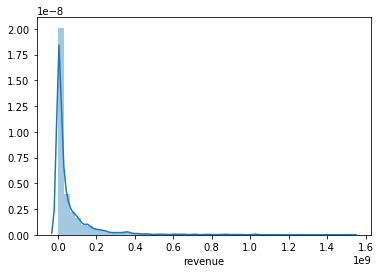

In [174]:
sns.distplot(data['revenue'])

Very skewed distrubtion

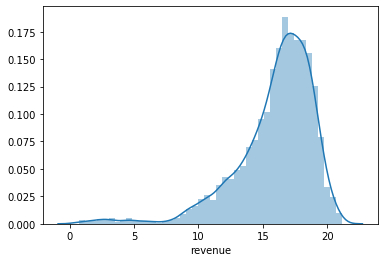

In [177]:
sns.distplot(data['revenue'].apply(np.log1p))

Better distrubution which isnt as skewed

A non skewed modell will make it easier for the models to predict correctly

## Saving attributes we want to use

In [16]:
attributes = []

## Title vs original title

In [17]:
data['title_same'] = data['original_title'] == data['title']

In [18]:
test['title_same'] = test['original_title'] == test['title']

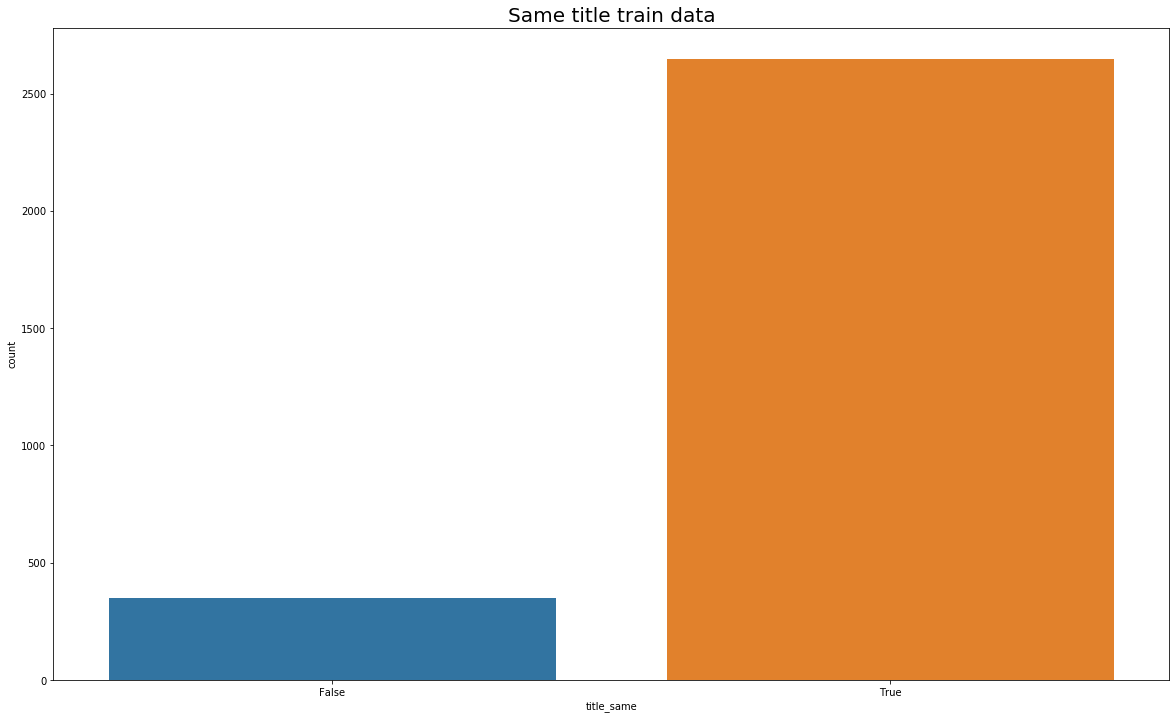

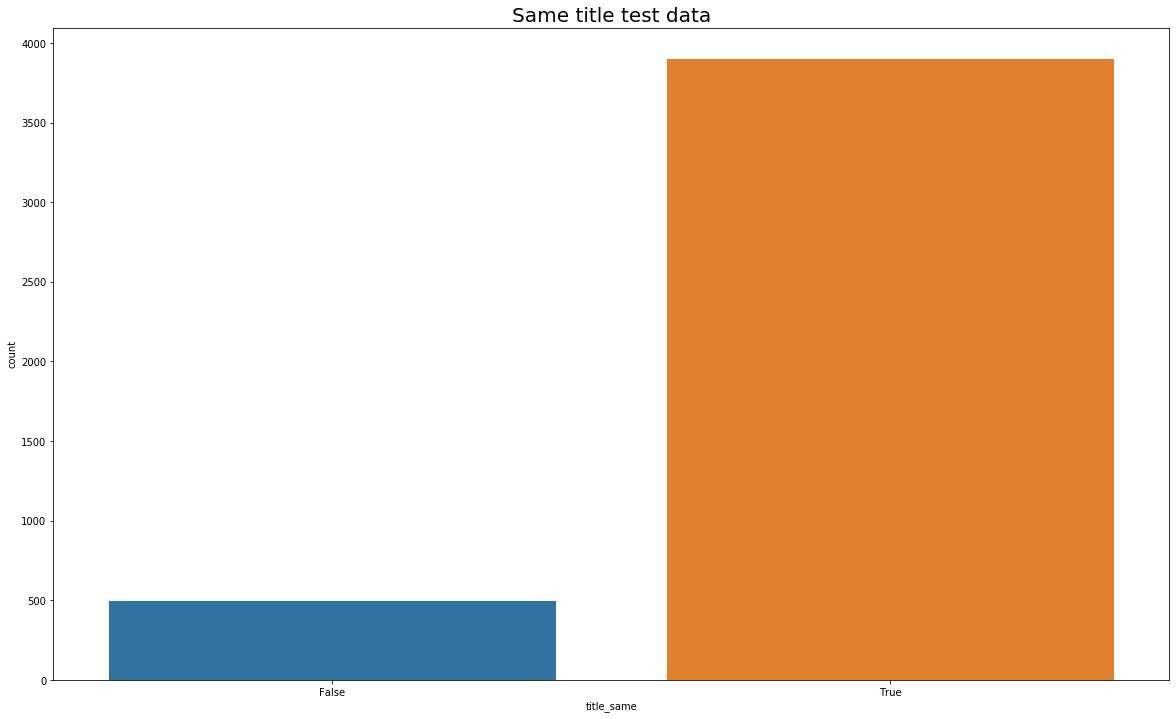

In [19]:
plt.figure(figsize=(20,12))
sns.countplot(x=('title_same'), data=data)
plt.title("Same title train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('title_same'), data=test)
plt.title("Same title test data",fontsize=20)
plt.show()

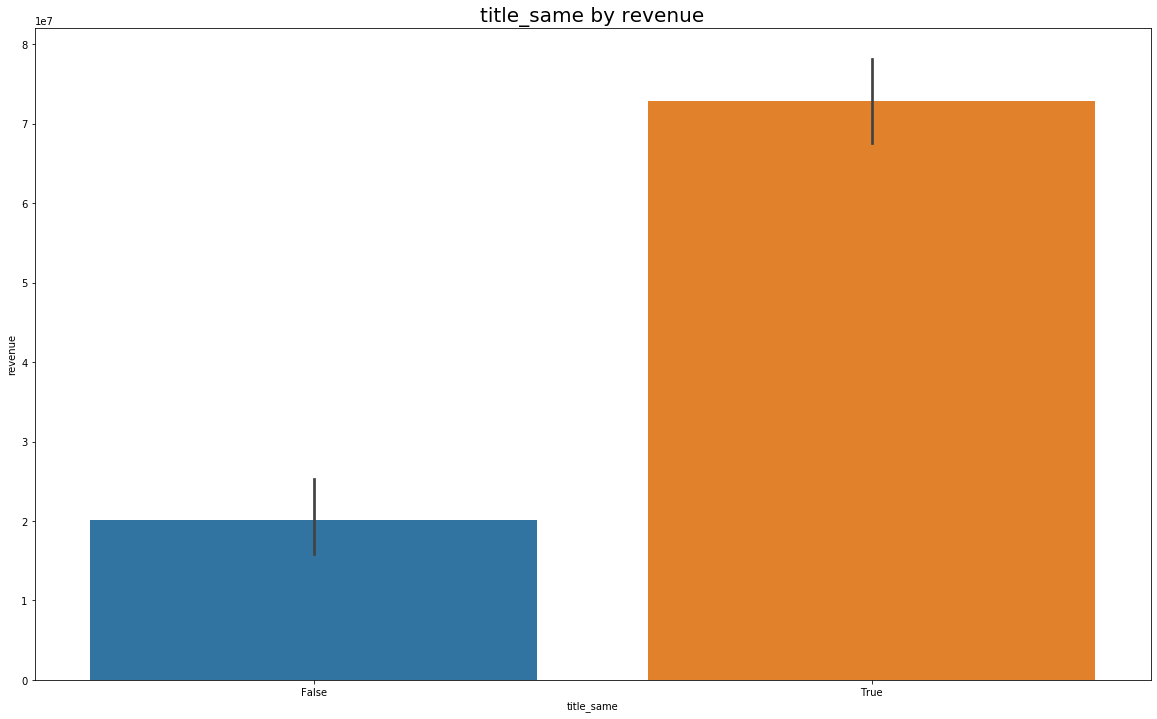

In [20]:
plt.figure(figsize=(20,12))
sns.barplot(x='title_same', y='revenue', data=data)
plt.title("title_same by revenue",fontsize=20)
plt.show()

In [21]:
attributes.append('title_same')

## Homepage

In [22]:
data['has_homepage'] = data['homepage'].notnull()

In [23]:
test['has_homepage'] = test['homepage'].notnull()

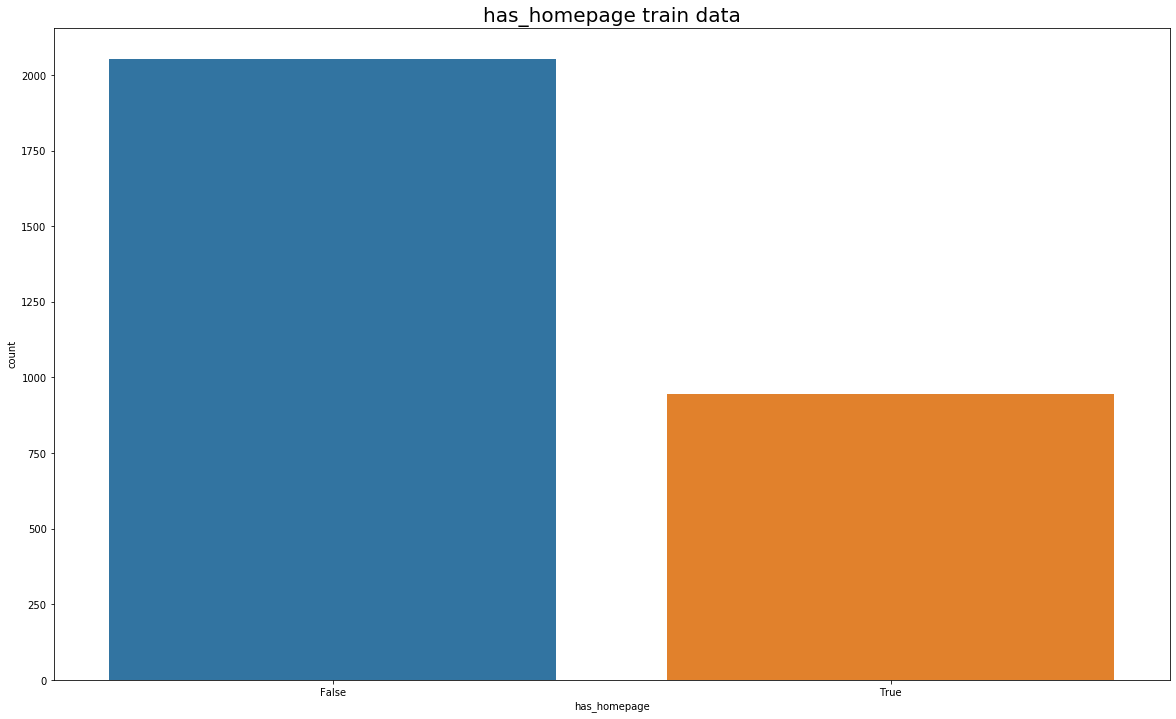

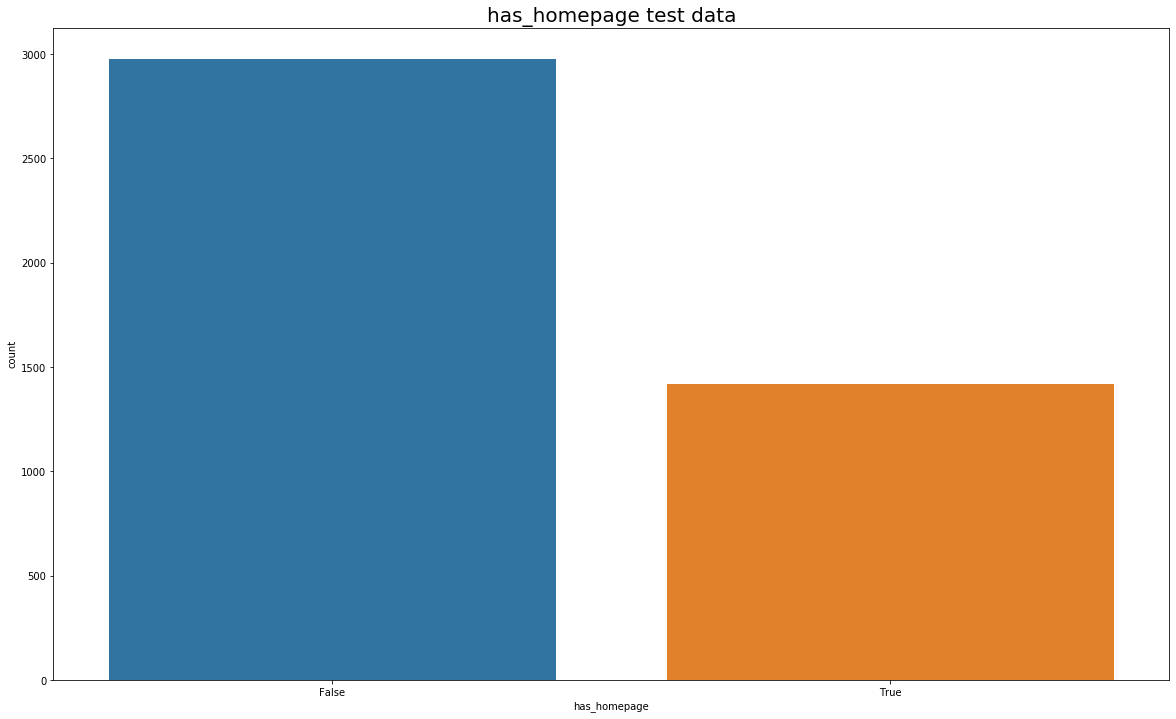

In [24]:
plt.figure(figsize=(20,12))
sns.countplot(x=('has_homepage'), data=data)
plt.title("has_homepage train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('has_homepage'), data=test)
plt.title("has_homepage test data",fontsize=20)
plt.show()

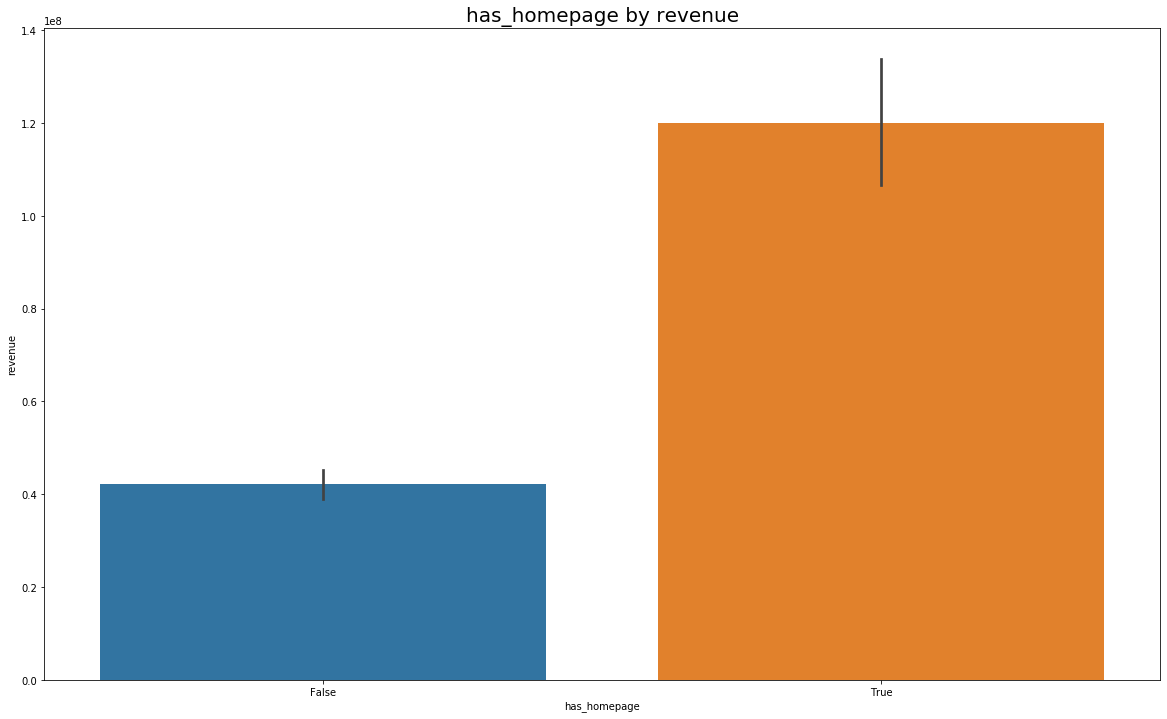

In [25]:
plt.figure(figsize=(20,12))
sns.barplot(x='has_homepage', y='revenue', data=data)
plt.title("has_homepage by revenue",fontsize=20)
plt.show()

In [26]:
attributes.append('has_homepage')

## Collection

In [27]:
data['is_collection'] = data['belongs_to_collection'].notnull()

In [28]:
test['is_collection'] = test['belongs_to_collection'].notnull()

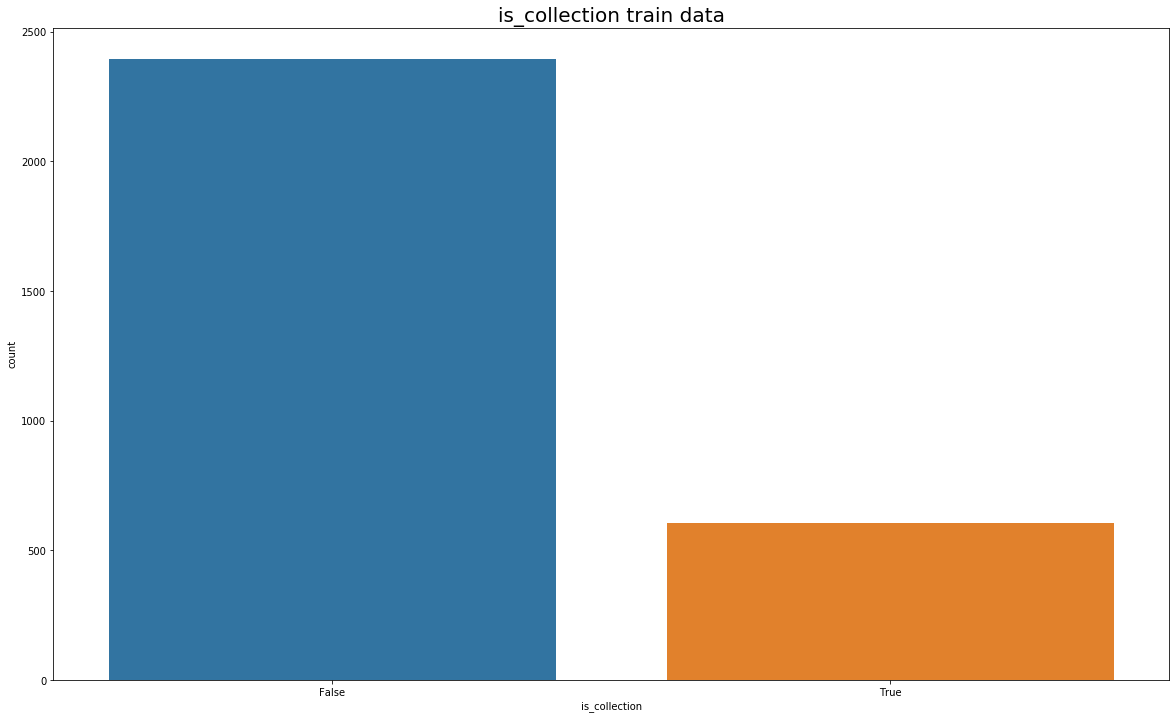

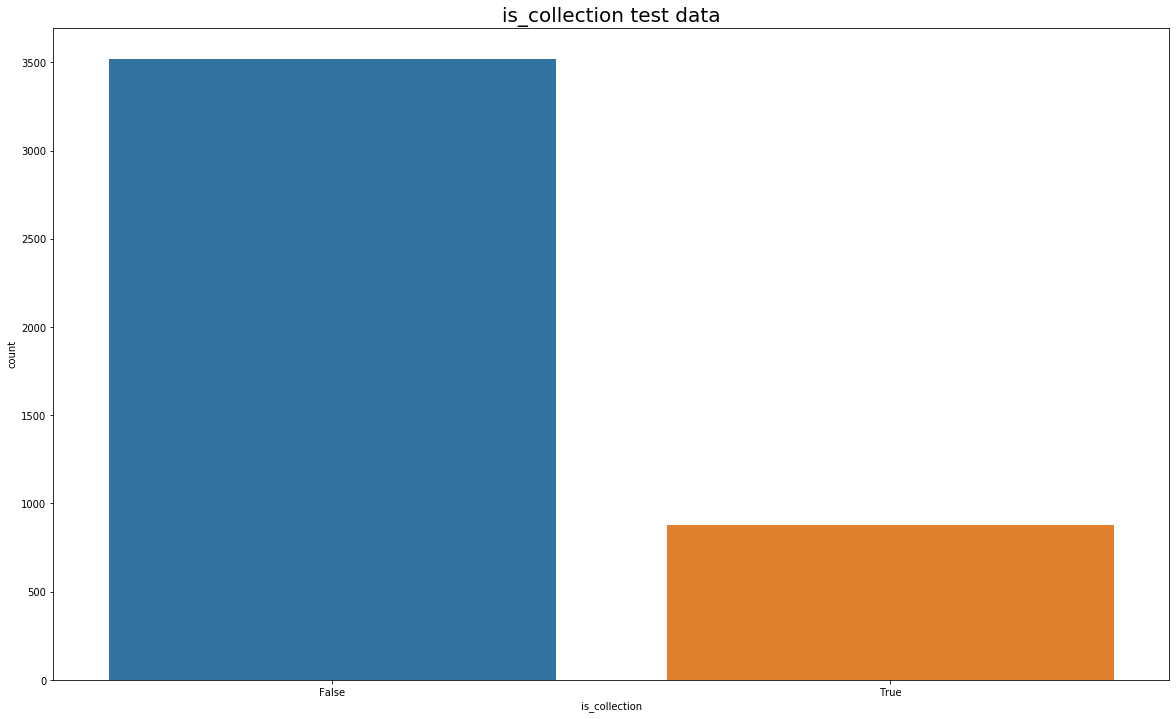

In [29]:
plt.figure(figsize=(20,12))
sns.countplot(x=('is_collection'), data=data)
plt.title("is_collection train data",fontsize=20)
plt.show()
plt.figure(figsize=(20,12))
sns.countplot(x=('is_collection'), data=test)
plt.title("is_collection test data",fontsize=20)
plt.show()

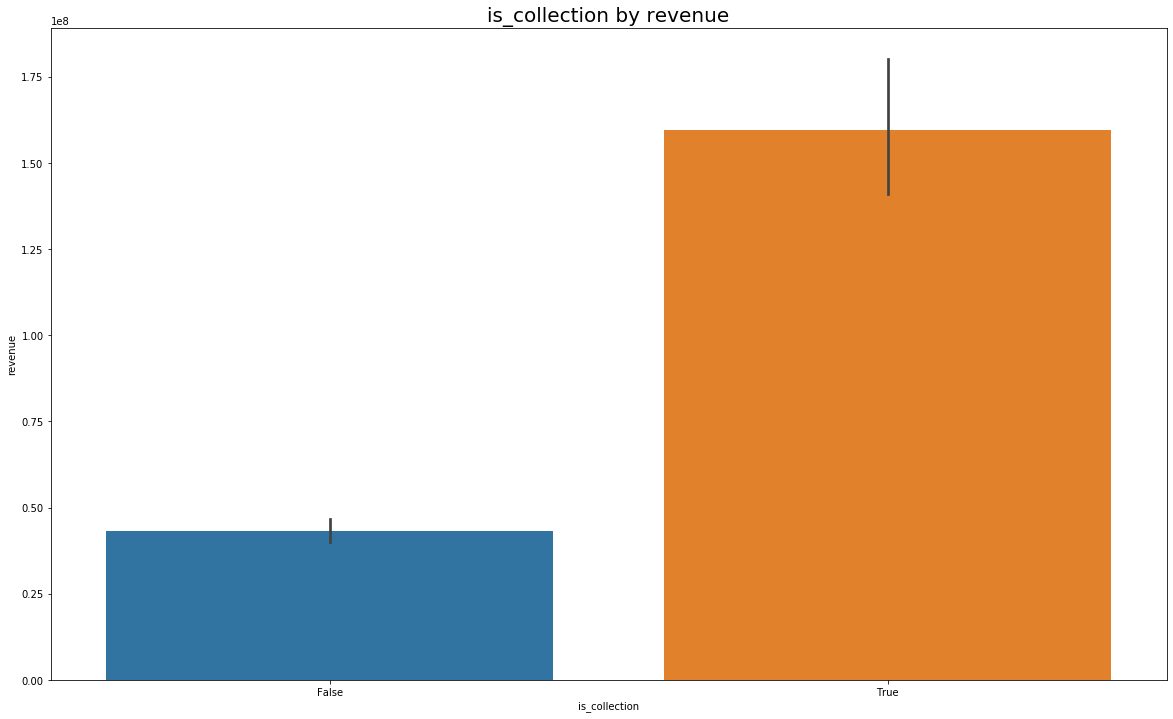

In [30]:
plt.figure(figsize=(20,12))
sns.barplot(x='is_collection', y='revenue', data=data)
plt.title("is_collection by revenue",fontsize=20)
plt.show()

In [31]:
attributes.append('is_collection')

## Runtime

In [32]:
data[data['runtime'].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,title_same,has_homepage,is_collection
1335,1336,NaN,6000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt1107828,ru,Королёв,NaN,0.292296,/2XcRiIvliLUUGqv5qOvpc76WeCU.jpg,NaN,NaN,10/29/07,NaN,NaN,Released,NaN,Королёв,NaN,"[{'cast_id': 3, 'character': '–°–µ—Ä–≥–µ–π –ö–...","[{'credit_id': '52fe4db29251416c7513d819', 'de...",31000,True,False,False
2302,2303,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0116485,de,Happy Weekend,NaN,0.002229,NaN,"[{'name': 'Senator Film Produktion', 'id': 191}]","[{'iso_3166_1': 'DE', 'name': 'Germany'}]",3/14/96,NaN,"[{'iso_639_1': 'de', 'name': 'Deutsch'}]",Released,NaN,Happy Weekend,"[{'id': 572, 'name': 'sex'}, {'id': 596, 'name...","[{'cast_id': 0, 'character': 'Joachim Krippo',...",NaN,65335,True,False,False


In [33]:
test[test['runtime'].isnull()]

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,title_same,has_homepage,is_collection
243,3244,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0082131,es,La caliente niña Julietta,NaN,0.000464,/6ANZPgGGzplpAUuqx97nmAtmgEH.jpg,"[{'name': 'IFI Producción S.A.', 'id': 16675}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",3/20/81,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,La caliente niña Julietta,"[{'id': 293, 'name': 'female nudity'}, {'id': ...","[{'cast_id': 7, 'character': 'Julietta Santigo...","[{'credit_id': '55678cf992514156b600069f', 'de...",True,False,False
1489,4490,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt3132094,es,"Pancho, el perro millonario",NaN,0.661399,/h1n1RXda54WmuFmrcPU7iXZN0ta.jpg,"[{'name': 'Atresmedia Cine', 'id': 29566}, {'n...","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",6/6/14,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,"Pancho, el perro millonario","[{'id': 11493, 'name': 'animal as human'}, {'i...","[{'cast_id': 3, 'character': 'Alberto', 'credi...","[{'credit_id': '52fe4e1c9251416c91126d43', 'de...",True,False,False
1632,4633,NaN,0,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt0078010,es,Nunca en horas de clase,NaN,0.281500,/wVDY6zJV5GCkZF07CMYE8s37Rx7.jpg,"[{'name': 'Films Zodíaco', 'id': 36421}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",11/3/78,NaN,"[{'iso_639_1': 'es', 'name': 'Español'}]",Released,NaN,Nunca en horas de clase,"[{'id': 107, 'name': 'barcelona spain'}, {'id'...","[{'cast_id': 6, 'character': 'Susy', 'credit_i...","[{'credit_id': '544d2dd20e0a2608c2002879', 'de...",True,False,False
3817,6818,NaN,0,NaN,NaN,tt2192844,fi,Miesten välisiä keskusteluja,NaN,0.011427,/iGykvX2LgYFz9EKAjqGoni9xmCf.jpg,"[{'name': 'Vegetarian Films', 'id': 80999}]","[{'iso_3166_1': 'FI', 'name': 'Finland'}]",1/4/13,NaN,"[{'iso_639_1': 'fi', 'name': 'suomi'}]",Released,NaN,Miesten välisiä keskusteluja,NaN,"[{'cast_id': 0, 'character': 'Kari Mairisaari'...","[{'credit_id': '57cad03a9251411ac50030a1', 'de...",True,False,False


In [34]:
median = data['runtime'].append(test['runtime']).median()

In [35]:
data.loc[data['runtime'].isnull(), 'runtime'] = median

In [36]:
test.loc[test['runtime'].isnull(), 'runtime'] = median

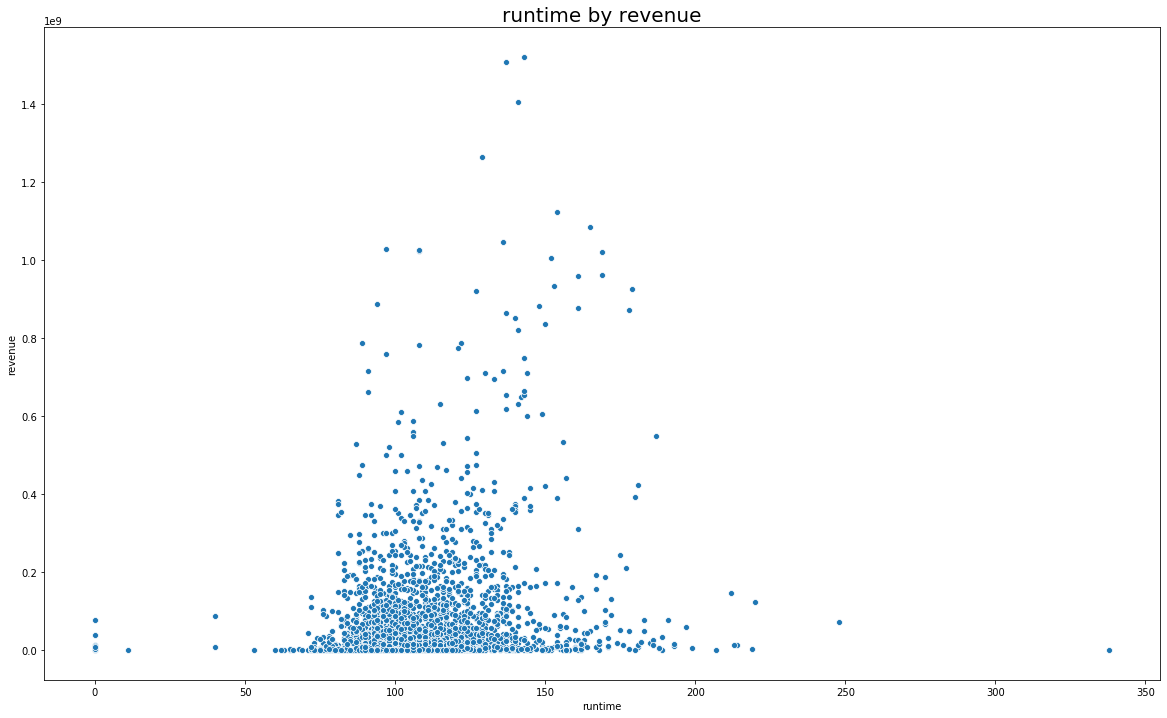

In [37]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='runtime', y='revenue', data=data)
plt.title("runtime by revenue",fontsize=20)
plt.show()

In [38]:
attributes.append('runtime')

## Keywords

In [39]:
data.head(5)['Keywords']

0    [{'id': 4379, 'name': 'time travel'}, {'id': 9...
1    [{'id': 2505, 'name': 'coronation'}, {'id': 42...
2    [{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...
3    [{'id': 10092, 'name': 'mystery'}, {'id': 1054...
4                                                  NaN
Name: Keywords, dtype: object

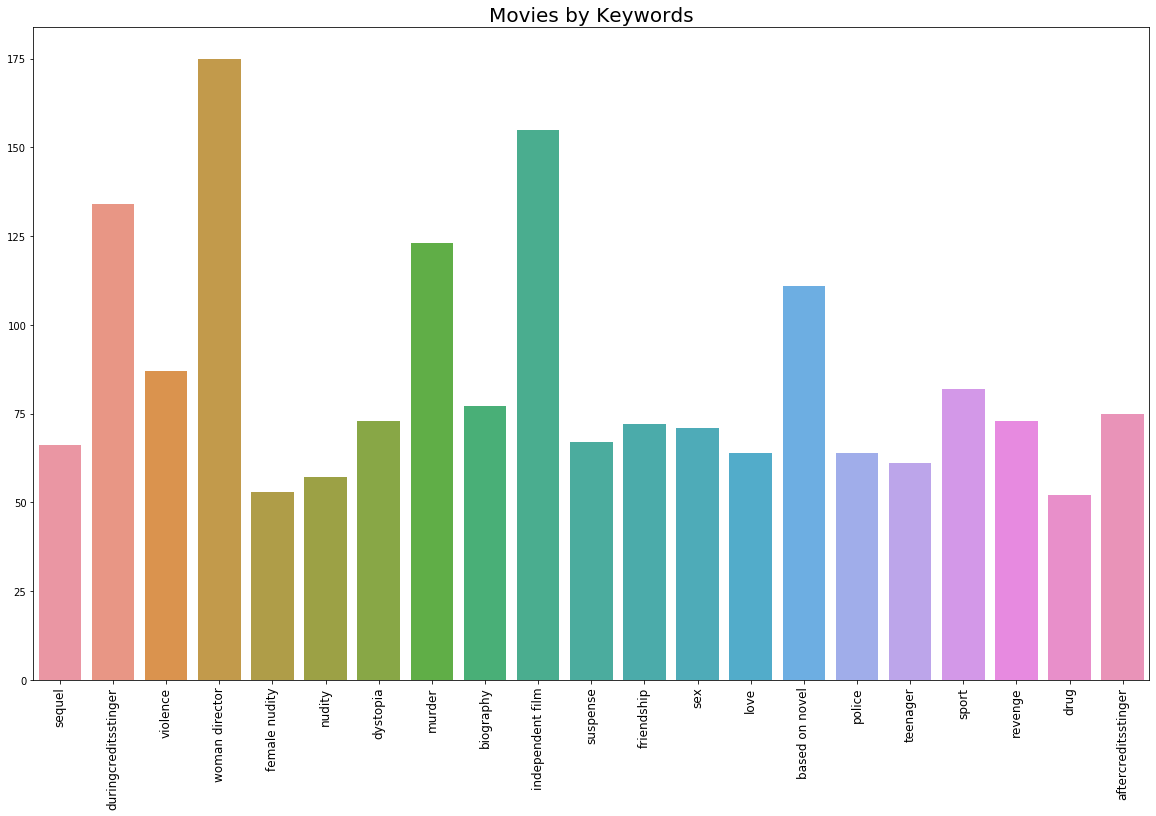

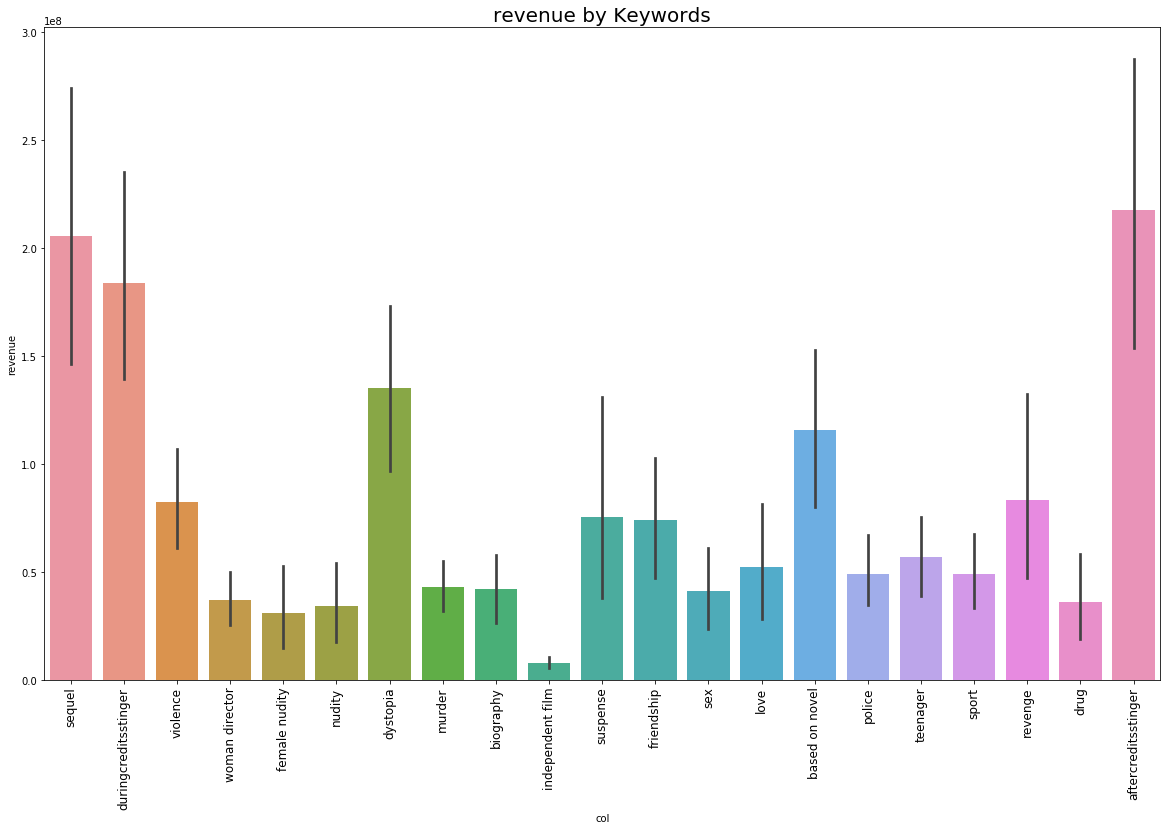

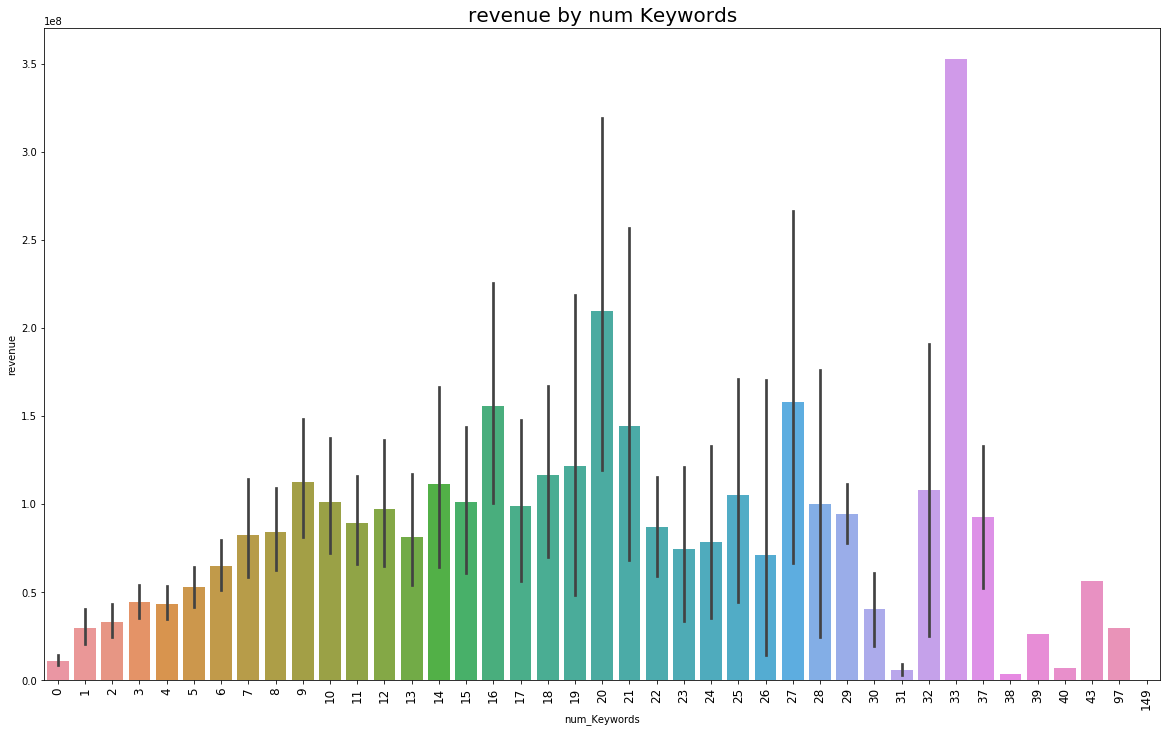

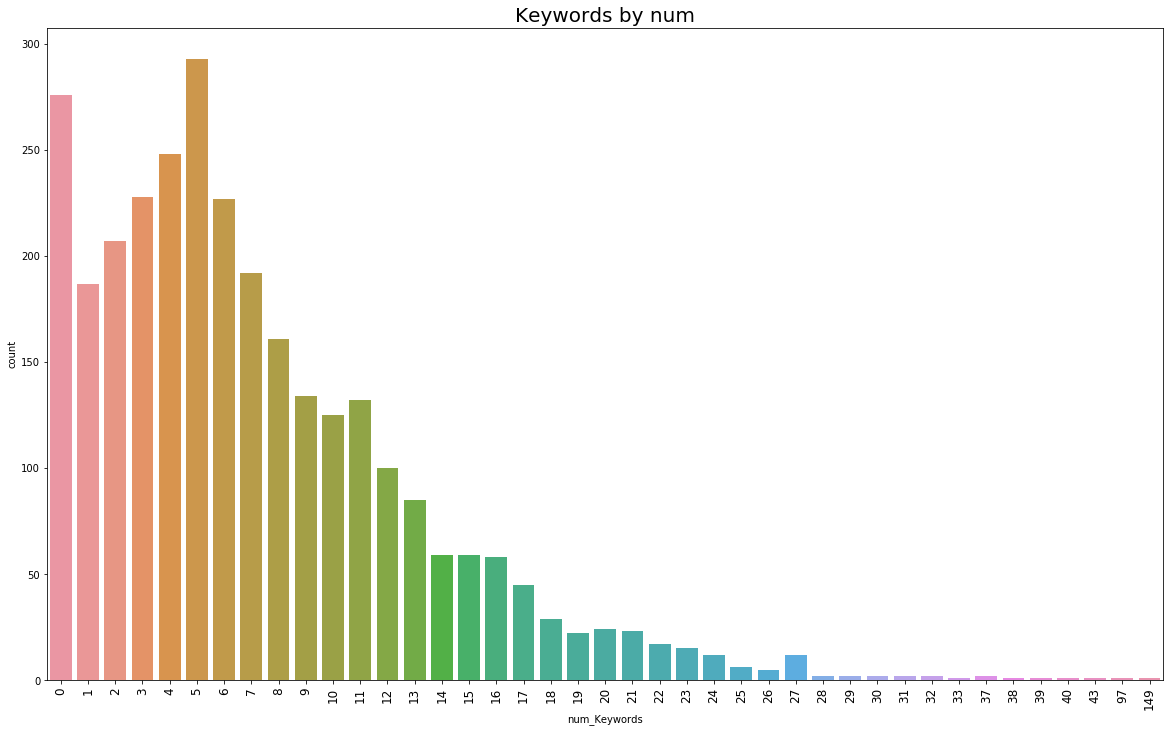

In [40]:
keyword_res = plot_multivalue_column(data, 'Keywords', Y='revenue', select=lambda x: x['name'], scatterplot=False, min_entries=50)

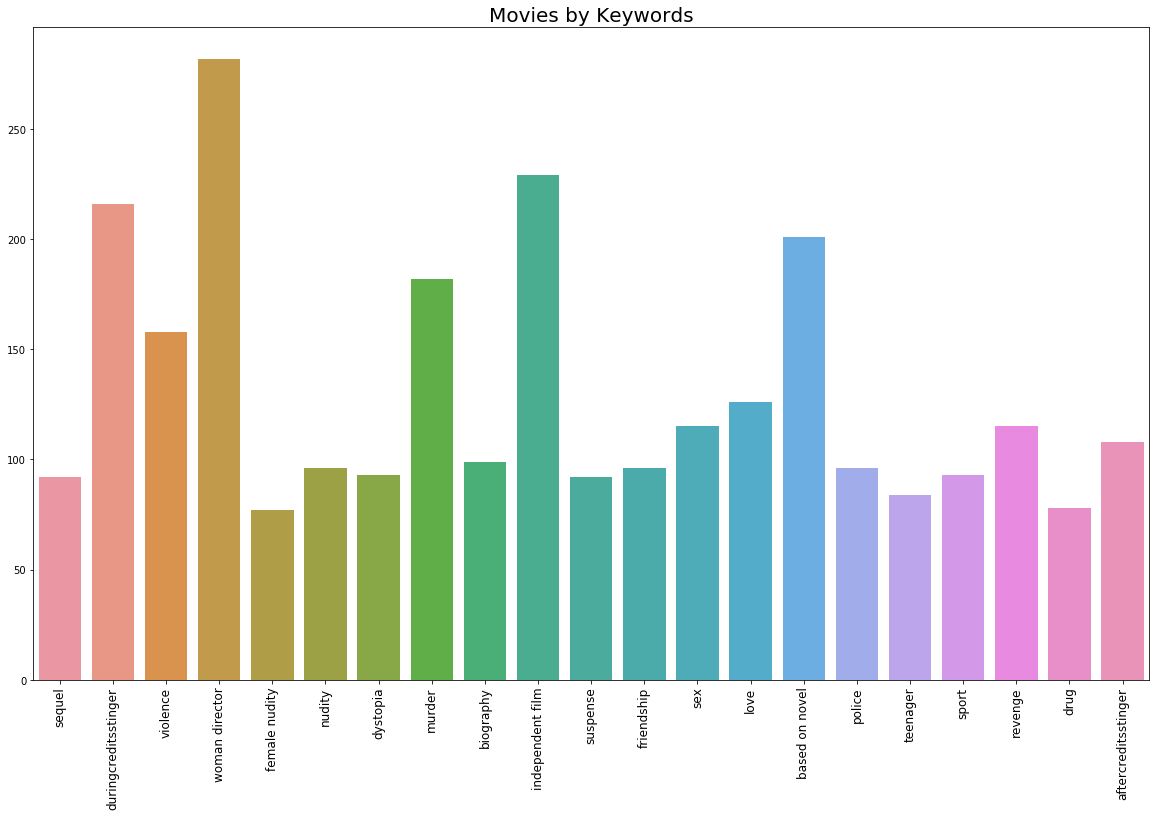

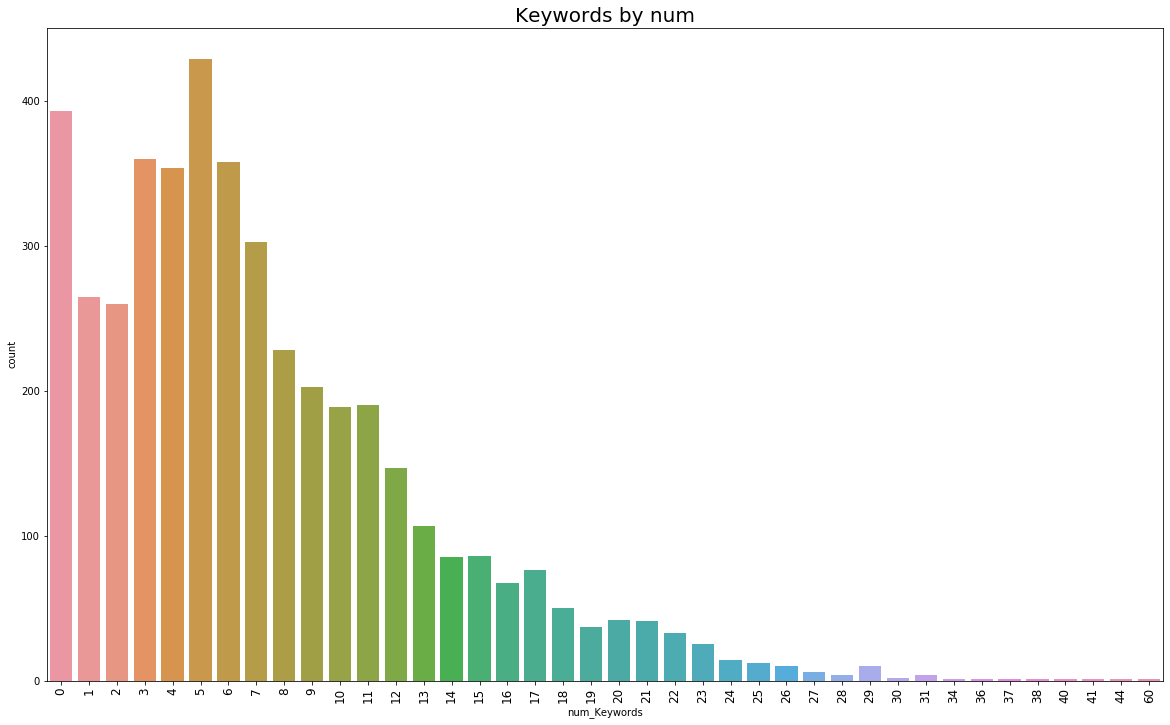

In [41]:
keyword_test_res = plot_multivalue_column(test, 'Keywords', select=lambda x: x['name'], scatterplot=False, list_entries=keyword_res)

In [42]:
attributes.extend(keyword_res)

In [43]:
attributes.append('num_Keywords')

## Release data

In [44]:
data['release_date'].head()

0     2/20/15
1      8/6/04
2    10/10/14
3      3/9/12
4      2/5/09
Name: release_date, dtype: object

In [45]:
releaseDate = pd.to_datetime(data['release_date'])

In [46]:
releaseDateTest = pd.to_datetime(test['release_date'])

In [47]:
data['release_year'] = releaseDate.dt.year

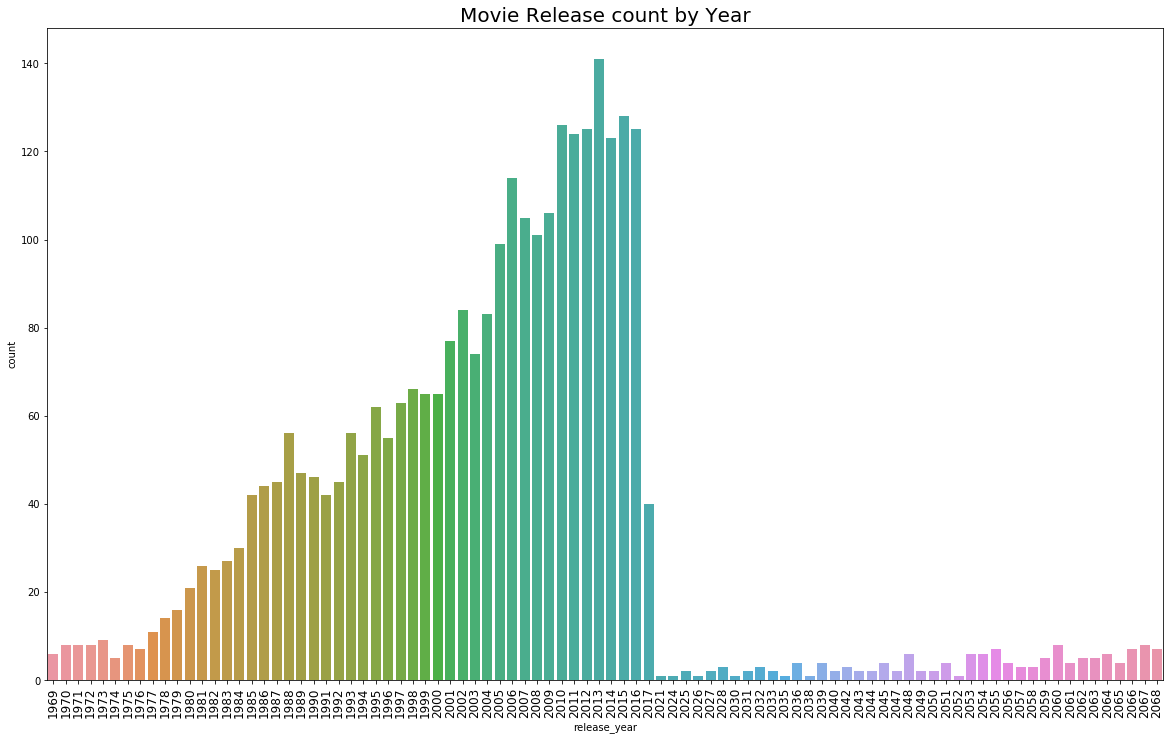

In [48]:
plt.figure(figsize=(20,12))
sns.countplot(data['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

We have some values in the future..

In [49]:
len(data[(data['release_year'] > 2017) & (data['status'] == 'Released')])

146

In [50]:
len(data[(data['release_year'] > 2017) & (data['status'] != 'Released')])

0

All "future" movies have already been released

In [51]:
data[(data['release_year'] > 2017) & (data['status'] == 'Released')].head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,title_same,has_homepage,is_collection,Keywords_list,sequel,duringcreditsstinger,violence,woman director,female nudity,nudity,dystopia,murder,biography,independent film,suspense,friendship,sex,love,based on novel,police,teenager,sport,revenge,drug,aftercreditsstinger,num_Keywords,release_year
39,40,NaN,3800000,"[{'id': 10752, 'name': 'War'}, {'id': 37, 'nam...",NaN,tt0059418,en,Major Dundee,"During the last winter of the Civil War, caval...",3.055936,/bwLMwKun3RNn9rmcfMfJw11ofNh.jpg,"[{'name': 'Columbia Pictures Corporation', 'id...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/7/65,123.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Major Dundee,"[{'id': 534, 'name': 'mexico'}, {'id': 1968, '...","[{'cast_id': 1, 'character': 'Major Amos Charl...","[{'credit_id': '52fe45f5c3a368484e078d7b', 'de...",14873,True,False,False,"[mexico, prisoners of war, apache, raid, confe...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5,2065
41,42,NaN,3000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0061512,en,Cool Hand Luke,When petty criminal Luke Jackson is sentenced ...,9.718713,/vDwphkloD7ToaDpKASAXGgHOclN.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",6/22/67,126.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What we've got here is failure to communicate.,Cool Hand Luke,"[{'id': 378, 'name': 'prison'}, {'id': 526, 'n...","[{'cast_id': 13, 'character': 'Luke Jackson', ...","[{'credit_id': '52fe428ac3a36847f8026d8d', 'de...",16217773,True,False,False,"[prison, rebel, loss of mother, harassment, im...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12,2067
51,52,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333,True,False,False,"[slapstick, ensemble cast, automobile racing, ...",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,5,2065
61,62,NaN,4000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0049875,en,Trapeze,"A pair of men try to perform the dangerous ""tr...",1.801071,/tAExVSQUlby56ATBlMnA2BrbA25.jpg,"[{'name': 'Joanna Productions', 'id': 5799}]","[{'iso_3166_1': 'US', 'name': 'United States o...",5/30/56,105.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,High...High...High...Above Them All! - in exci...,Trapeze,"[{'id': 291, 'name': 'circus'}, {'id': 180181,...","[{'cast_id': 2, 'character': 'Mike Ribble', 'c...","[{'credit_id': '52fe4594c3a36847f80cf3b9', 'de...",14400000,True,False,False,"[circus, trapeze artist]",False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,2,2056
68,69,NaN,2000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",NaN,tt0056592,en,To Kill a Mockingbird,"In a small Alabama town in the 1930s, scrupulo...",14.284787,/gQg6sPYfNTUlf8wEtydzWl09RyR.jpg,"[{'name': 'Universal Pictures', 'id': 33}]","[{'iso_3166_1': 'US', 'name': 'United States o...",12/25/62,129.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,

The year was wrongly parsed..

In [52]:
releaseDate = releaseDate.apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [53]:
releaseDateTest = releaseDateTest.apply(lambda x: x.replace(year=x.year - 100) if x.year > 2017 else x)

In [54]:
data['release_year'] = releaseDate.dt.year

In [55]:
test['release_year'] = releaseDateTest.dt.year

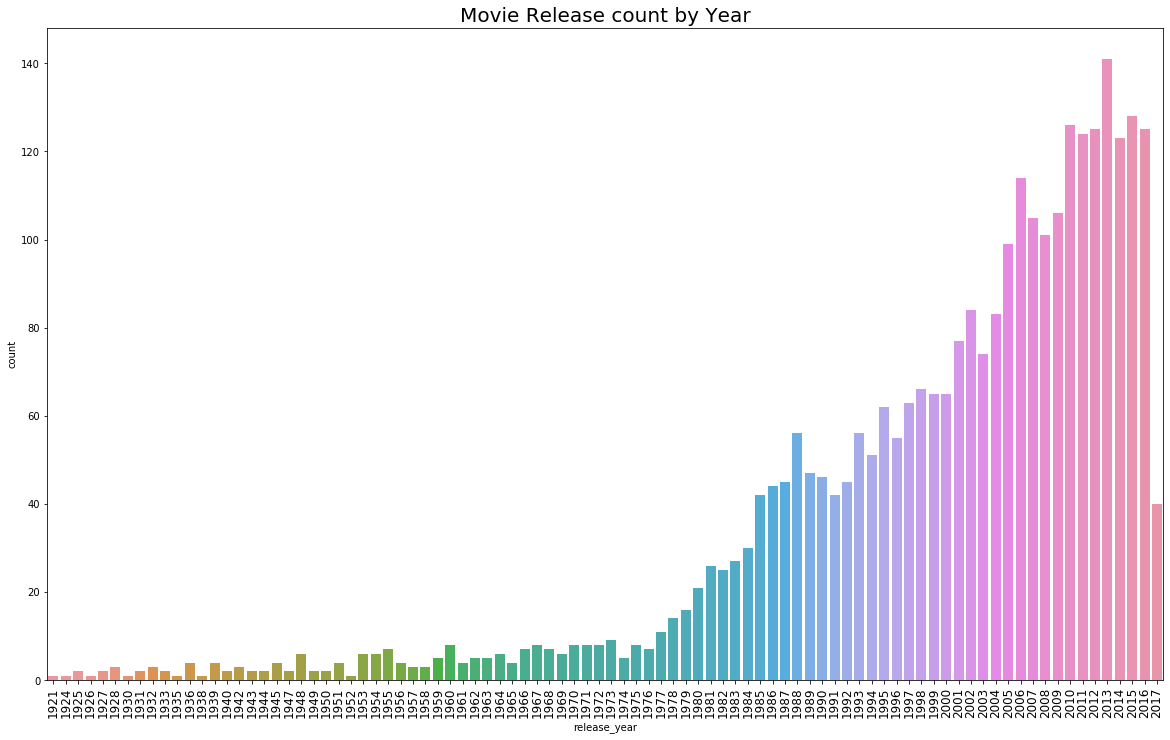

In [56]:
plt.figure(figsize=(20,12))
sns.countplot(data['release_year'].sort_values())
plt.title("Movie Release count by Year",fontsize=20)
loc, labels = plt.xticks()
plt.xticks(fontsize=12,rotation=90)
plt.show()

In [57]:
data['release_month'] = releaseDate.dt.month

In [58]:
test['release_month'] = releaseDateTest.dt.month

In [59]:
data['release_day'] = releaseDate.dt.dayofweek

In [60]:
test['release_day'] = releaseDateTest.dt.dayofweek

In [61]:
data['release_quarter'] = releaseDate.dt.quarter

In [62]:
test['release_quarter'] = releaseDateTest.dt.quarter

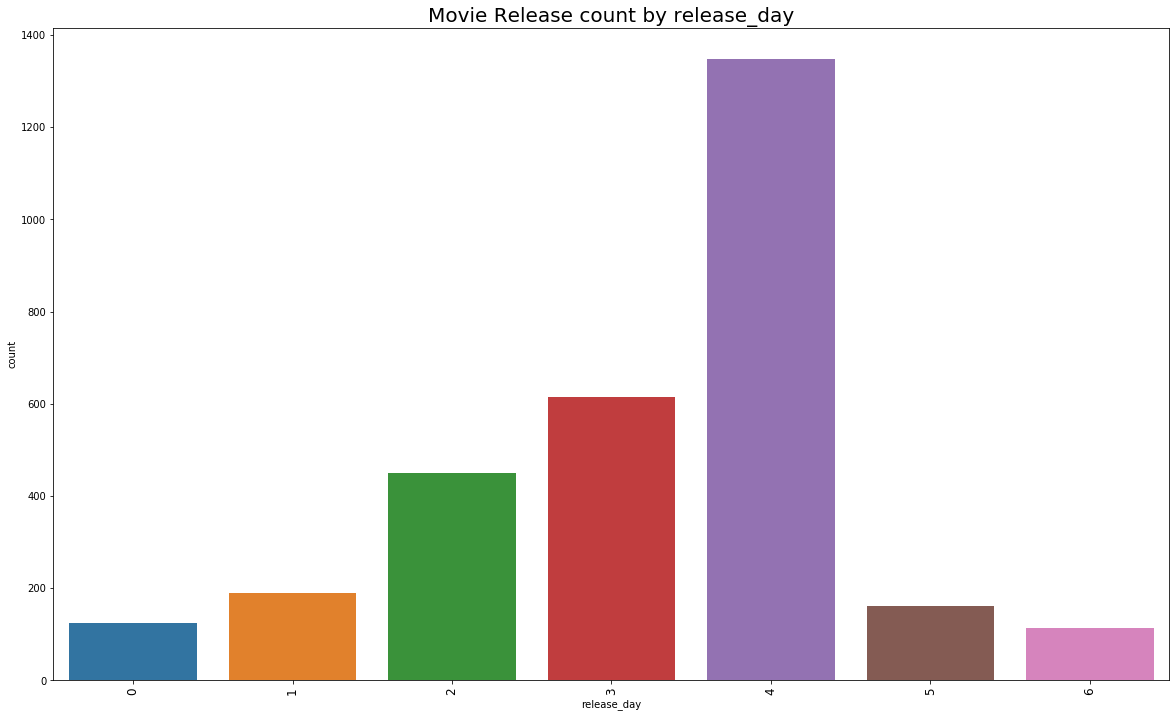

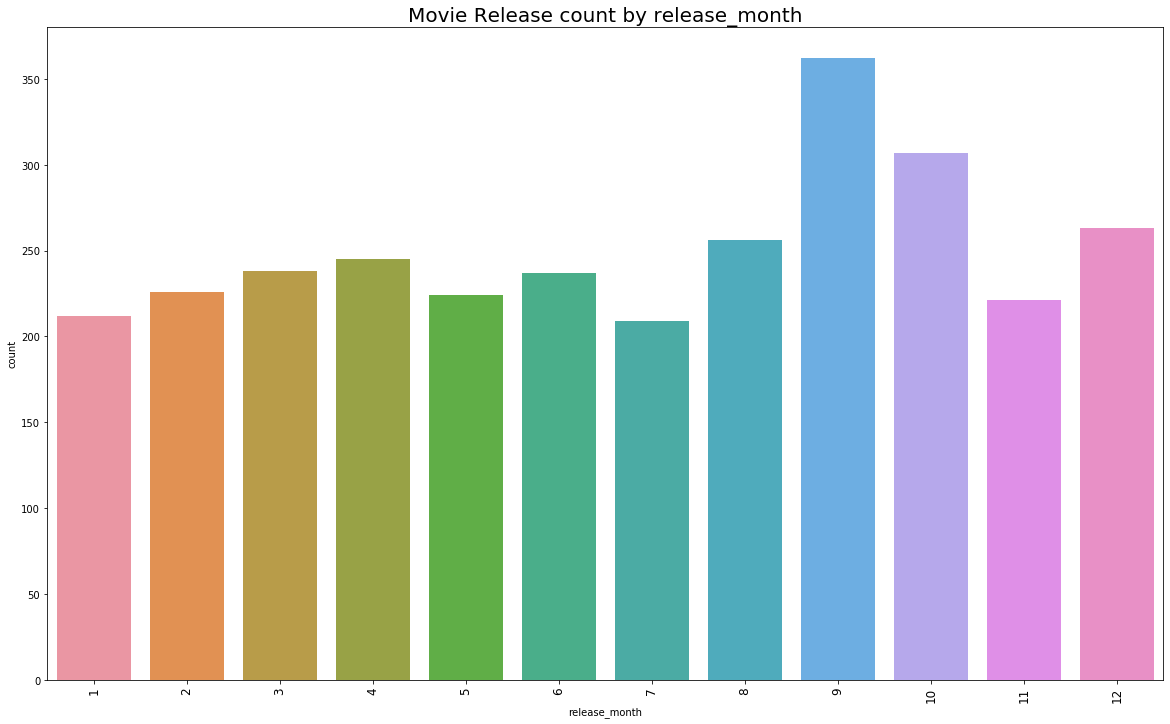

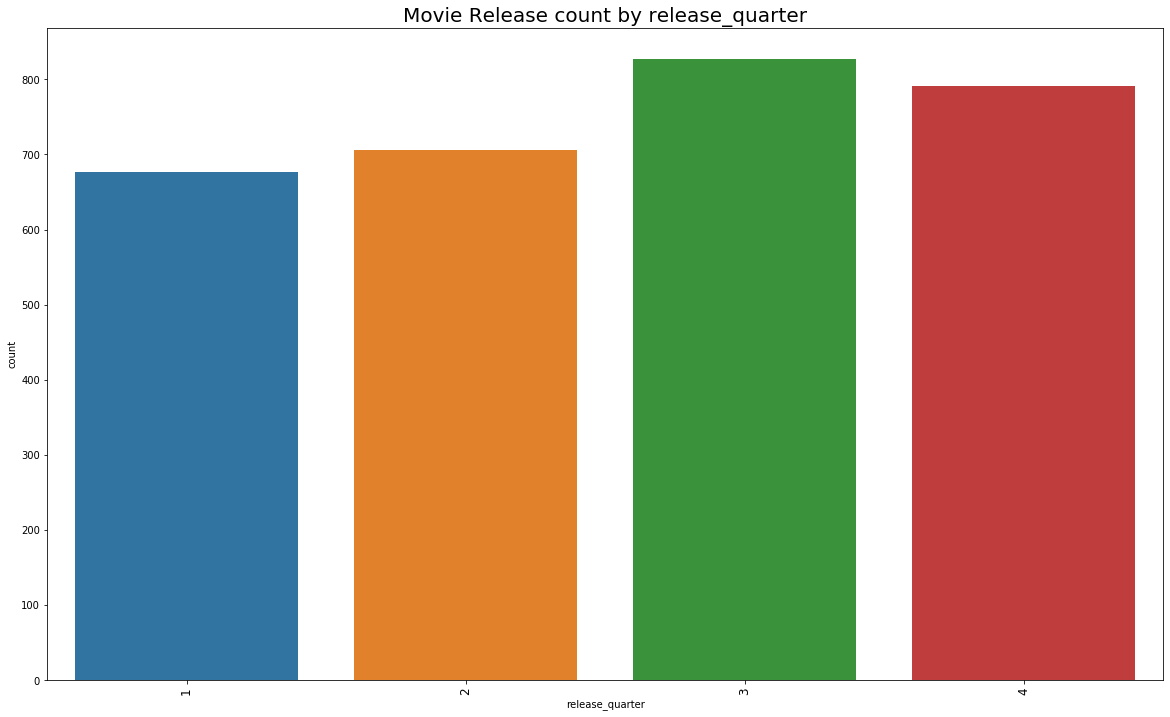

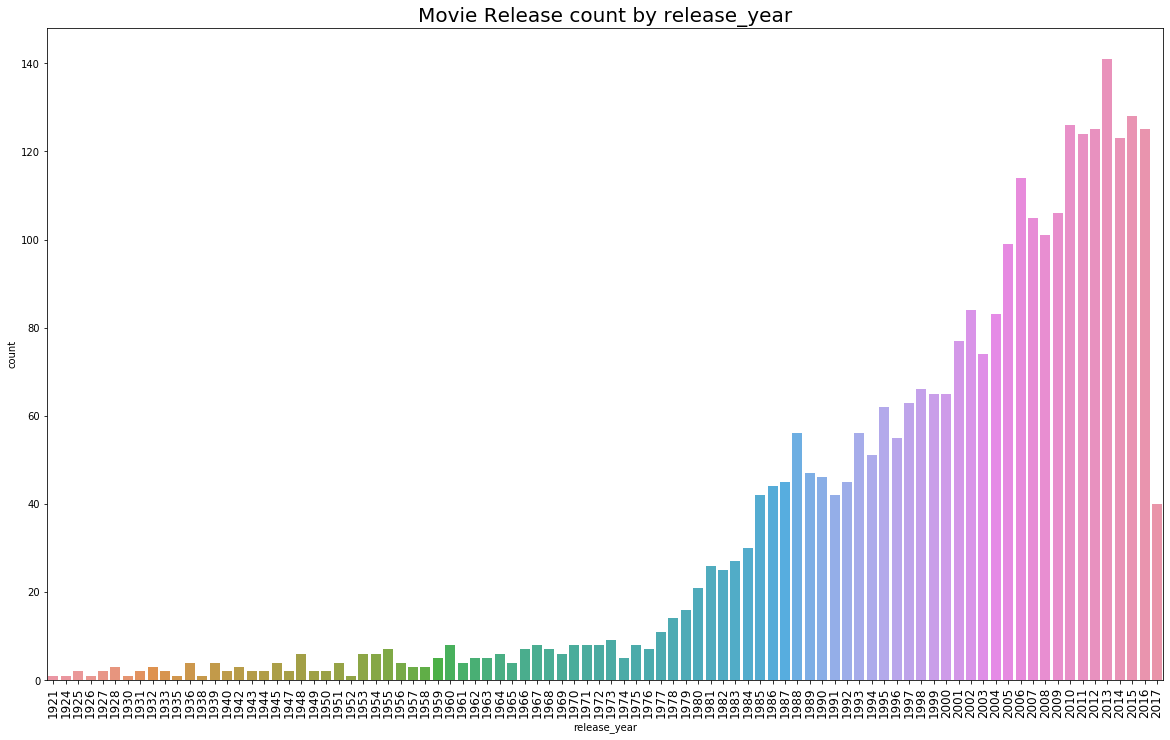

In [63]:
for d in ['release_day', 'release_month', 'release_quarter', 'release_year']:
    plt.figure(figsize=(20,12))
    sns.countplot(data[d].sort_values())
    plt.title("Movie Release count by {}".format(d),fontsize=20)
    loc, labels = plt.xticks()
    plt.xticks(fontsize=12,rotation=90)
    plt.show()

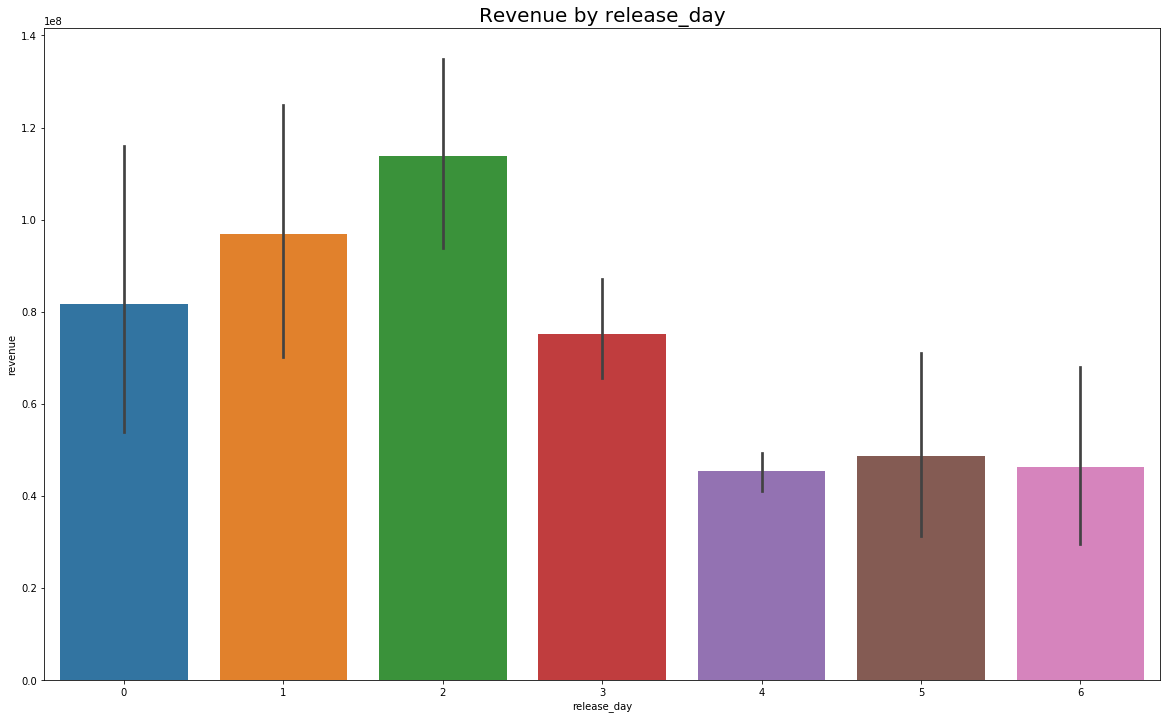

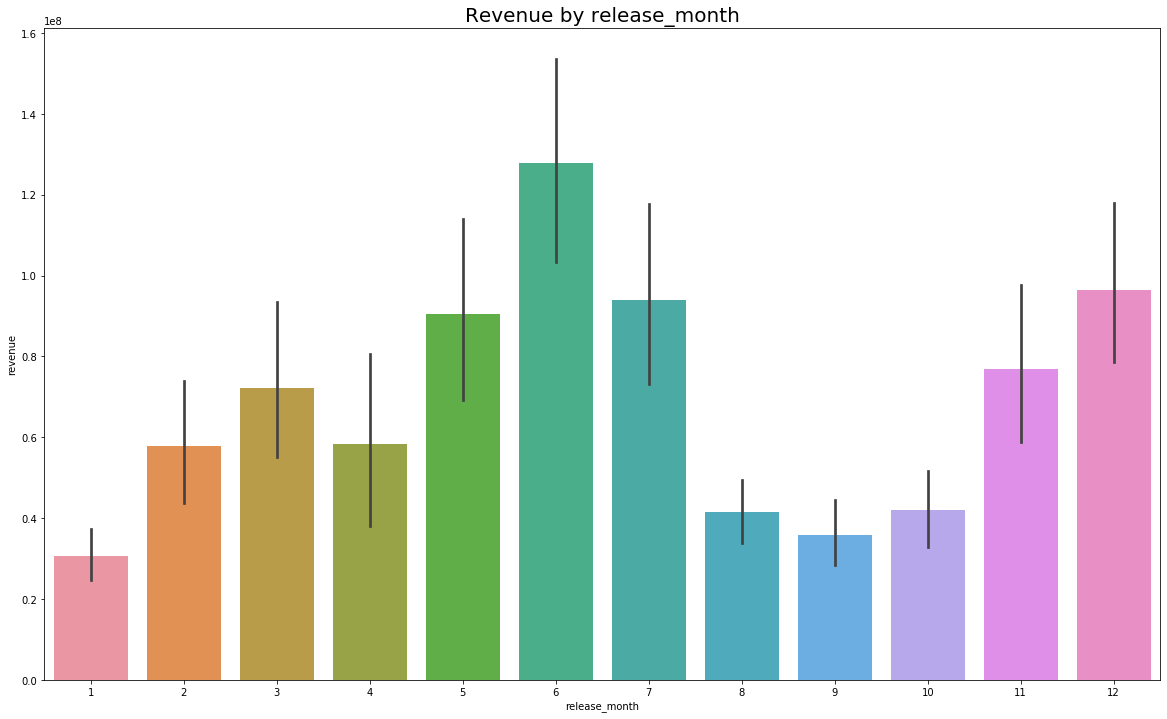

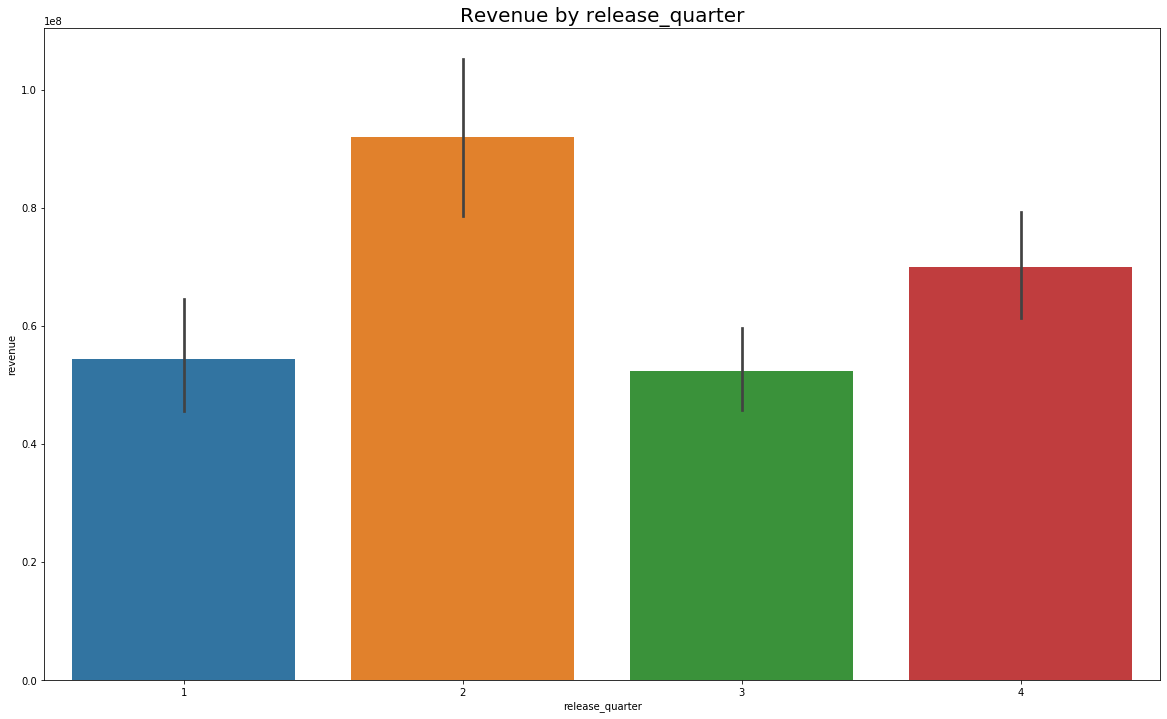

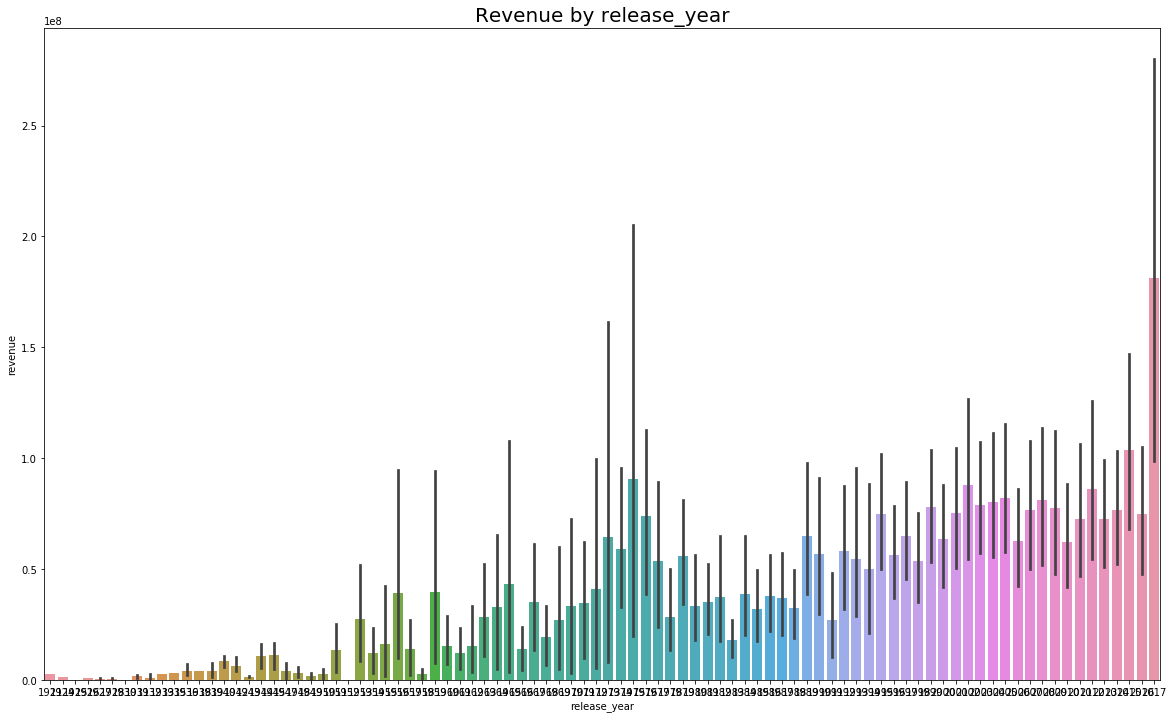

In [64]:
for d in ['release_day', 'release_month', 'release_quarter', 'release_year']:
    plt.figure(figsize=(20,12))
    sns.barplot(x=d, y='revenue', data=data)
    plt.title("Revenue by {}".format(d),fontsize=20)
    plt.show()

In [65]:
def inflate(num, duration, percent):
    return num * inflated(duration, percent)
def inflated(duration, percent):
    return (1 + percent)**duration

In [66]:
inflation = 0.01

In [67]:
data['inflated_revenue'] = data.apply(lambda row: inflate(row['revenue'], 2017 - row['release_year'], inflation), axis=1)

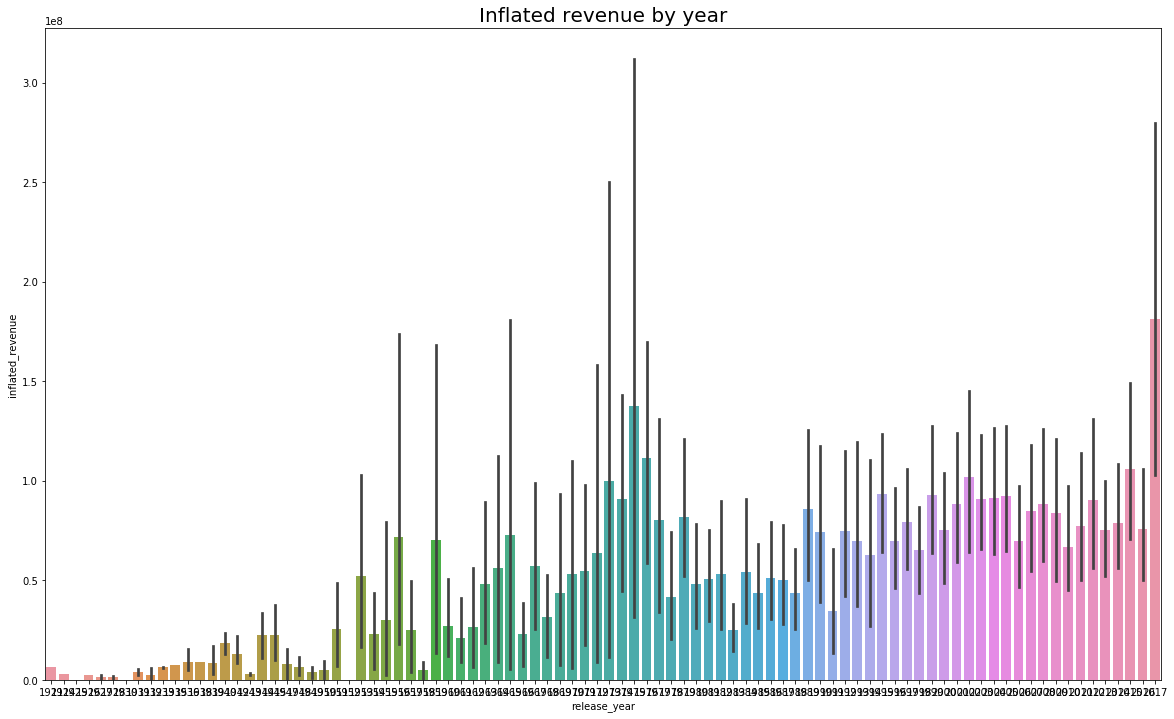

In [68]:
plt.figure(figsize=(20,12))
sns.barplot(x='release_year', y='inflated_revenue', data=data)
plt.title("Inflated revenue by year",fontsize=20)
plt.show()

In [69]:
attributes.extend(['release_year', 'release_quarter', 'release_day', 'release_month'])

## Budget

In [70]:
len(data[data['budget'] == 0.0])

812

In [71]:
len(test[test['budget'] == 0.0])

1211

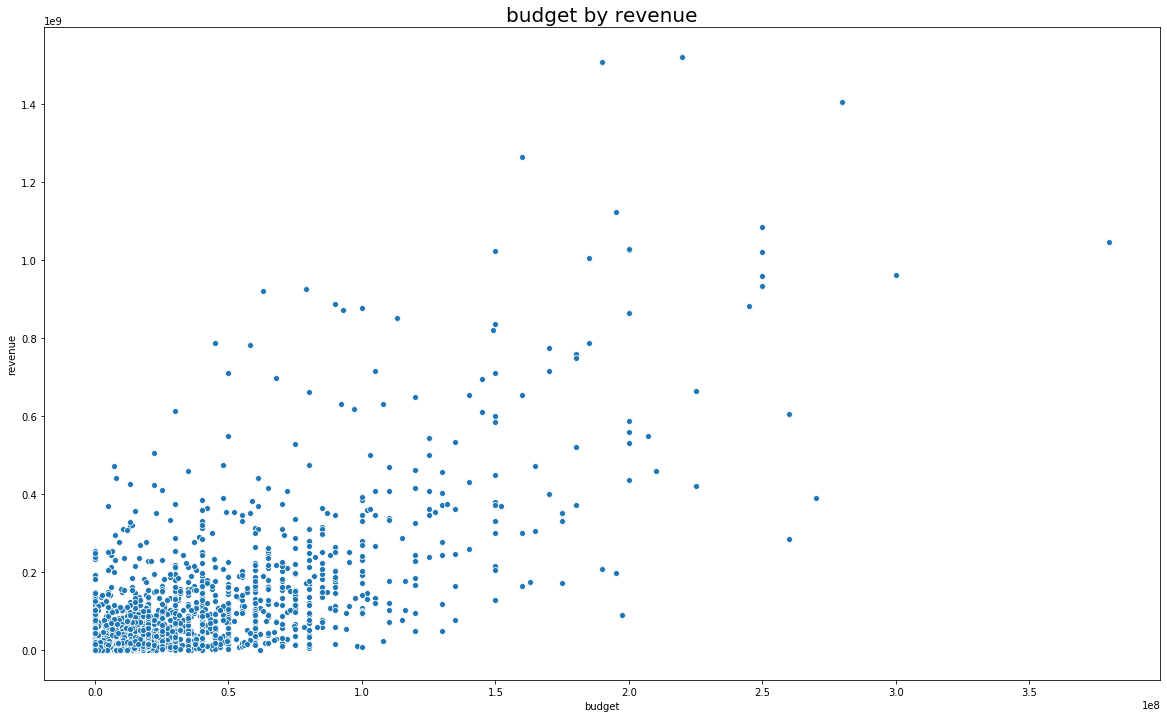

In [72]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='budget', y='revenue', data=data)
plt.title("budget by revenue",fontsize=20)
plt.show()

In [73]:
attributes.append('budget')

## Popularity

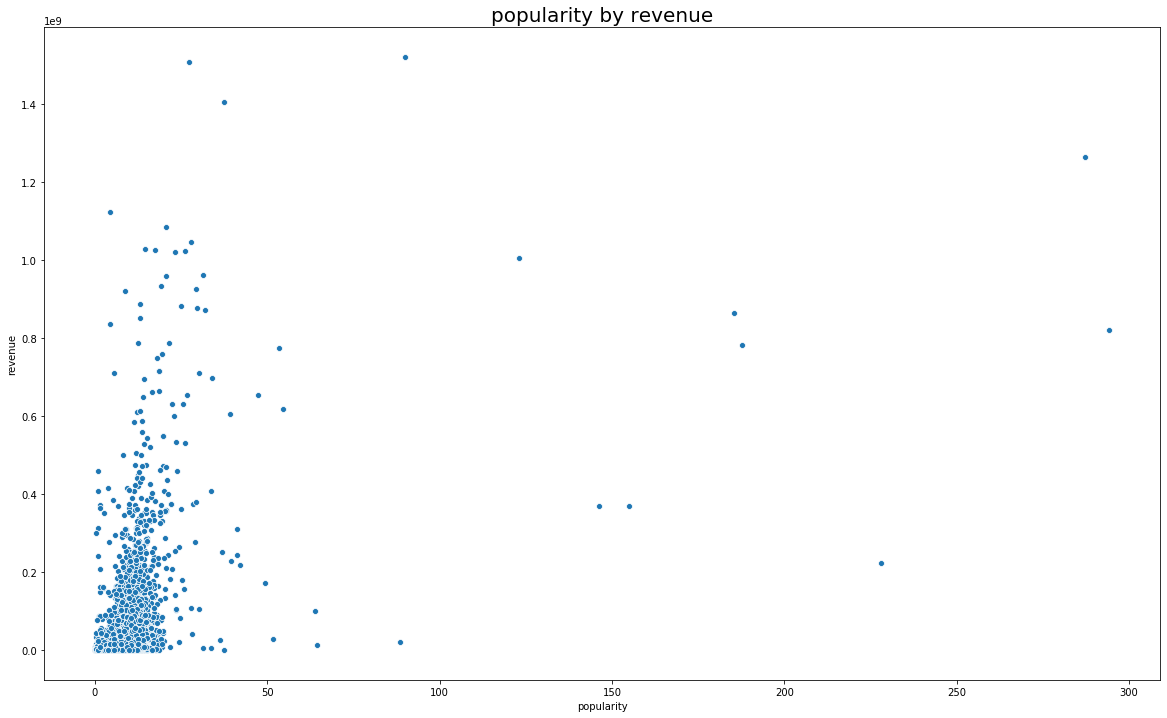

In [74]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='popularity', y='revenue', data=data)
plt.title("popularity by revenue",fontsize=20)
plt.show()

In [75]:
attributes.append('popularity')

## Genres

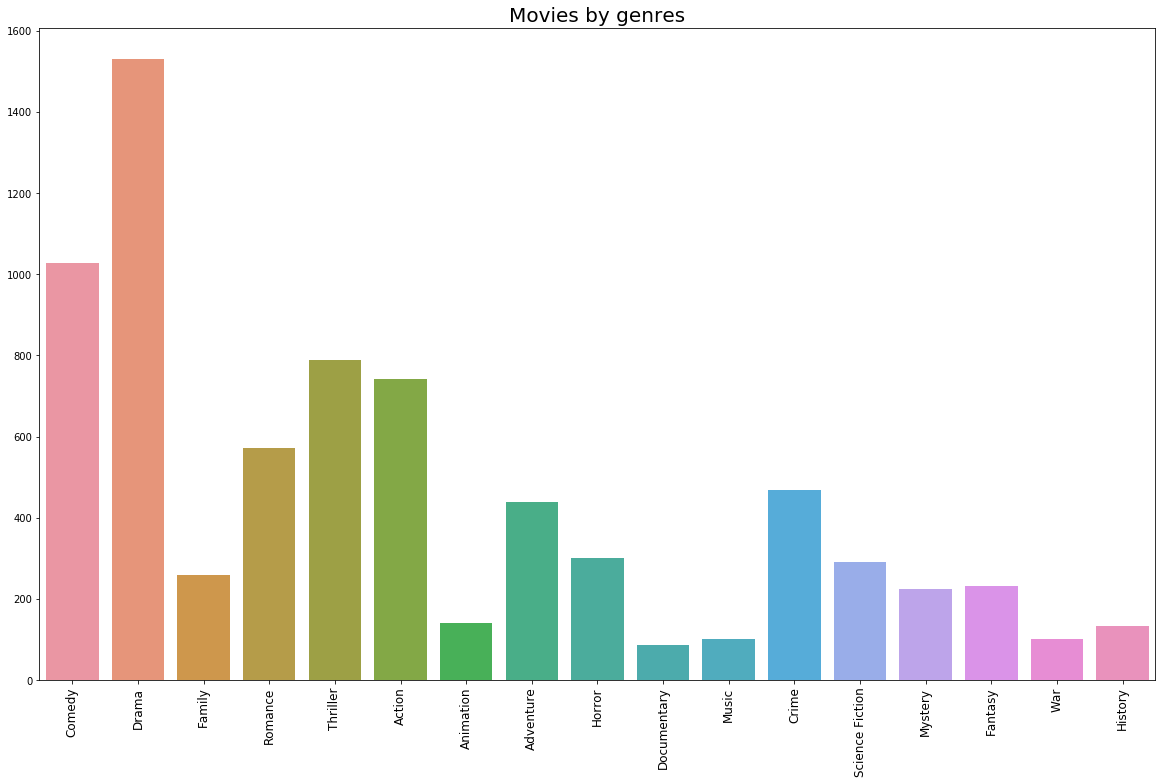

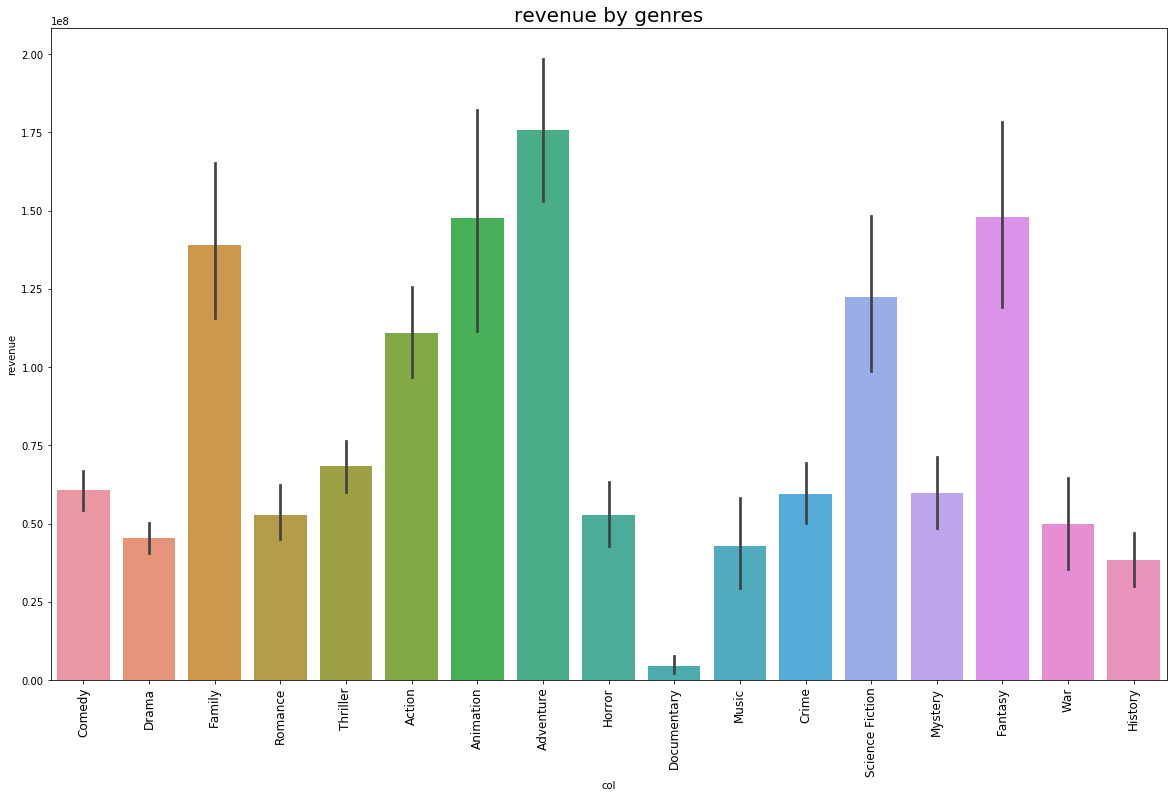

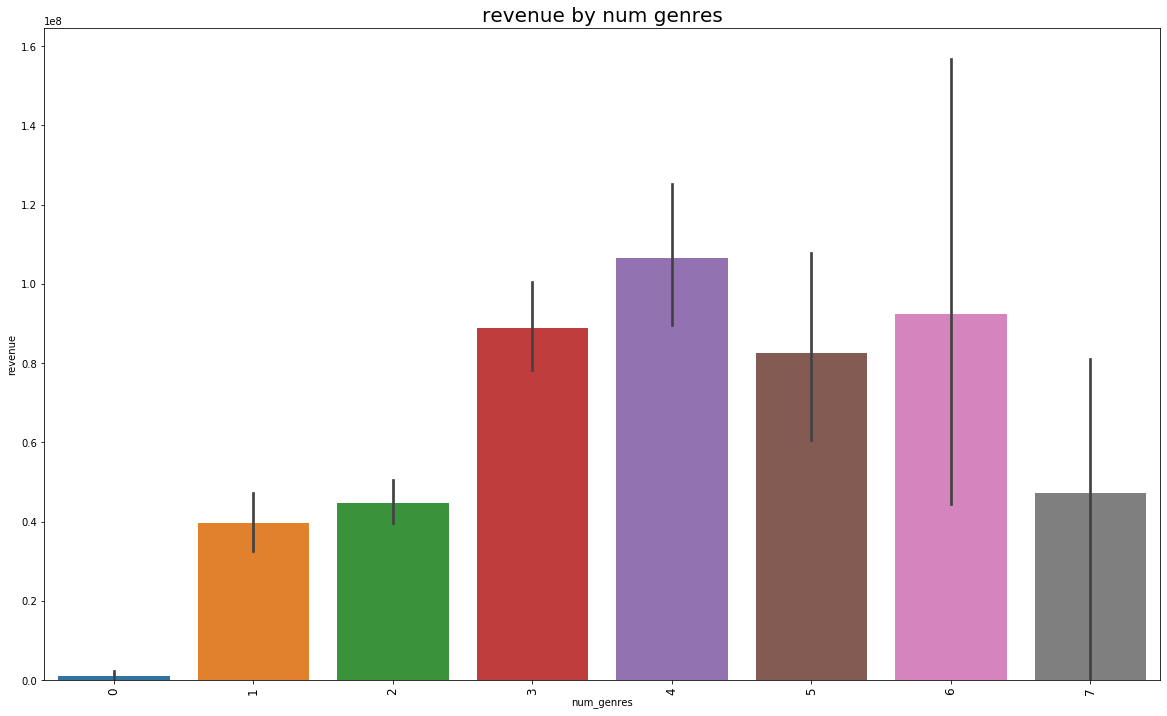

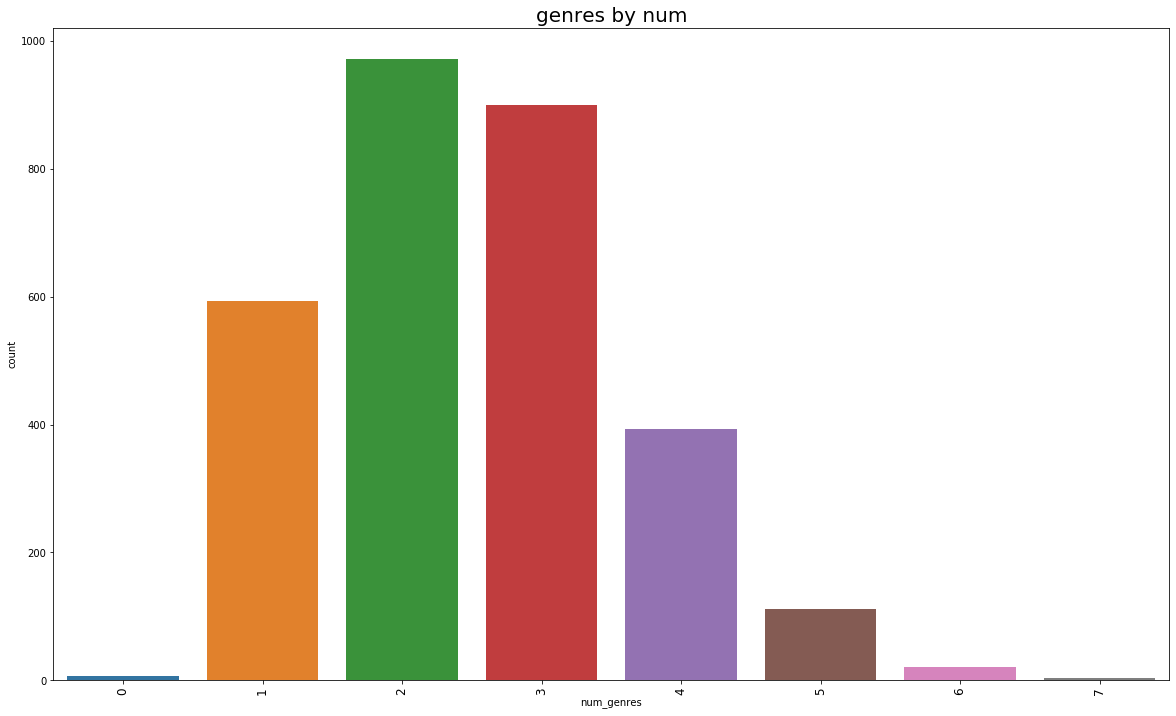

In [76]:
genres_res = plot_multivalue_column(data, 'genres', Y='revenue', select=lambda x: x['name'], scatterplot=False, min_entries=50)

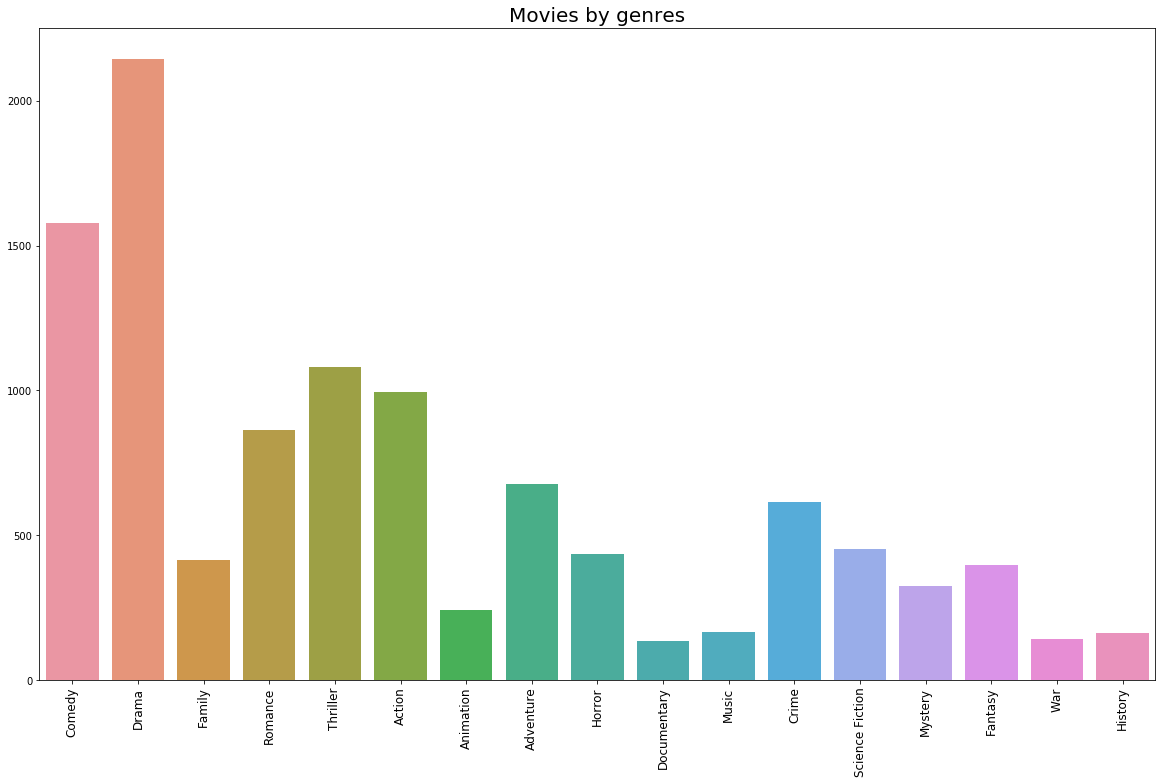

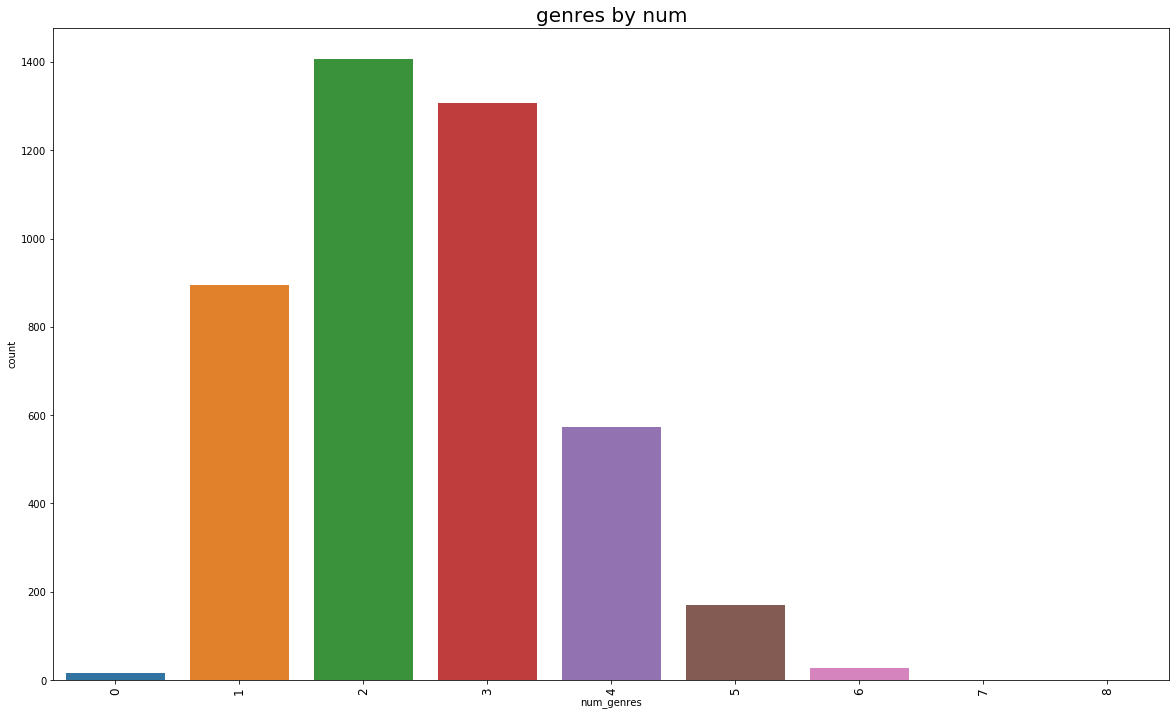

In [77]:
genres_test_res = plot_multivalue_column(test, 'genres', select=lambda x: x['name'], scatterplot=False, list_entries=genres_res)

Revenue compared to genres, NOTE: movies with multiple genres are shown multiple times

In [78]:
attributes.extend(genres_res)

In [79]:
attributes.append('num_genres')

### Spoken language

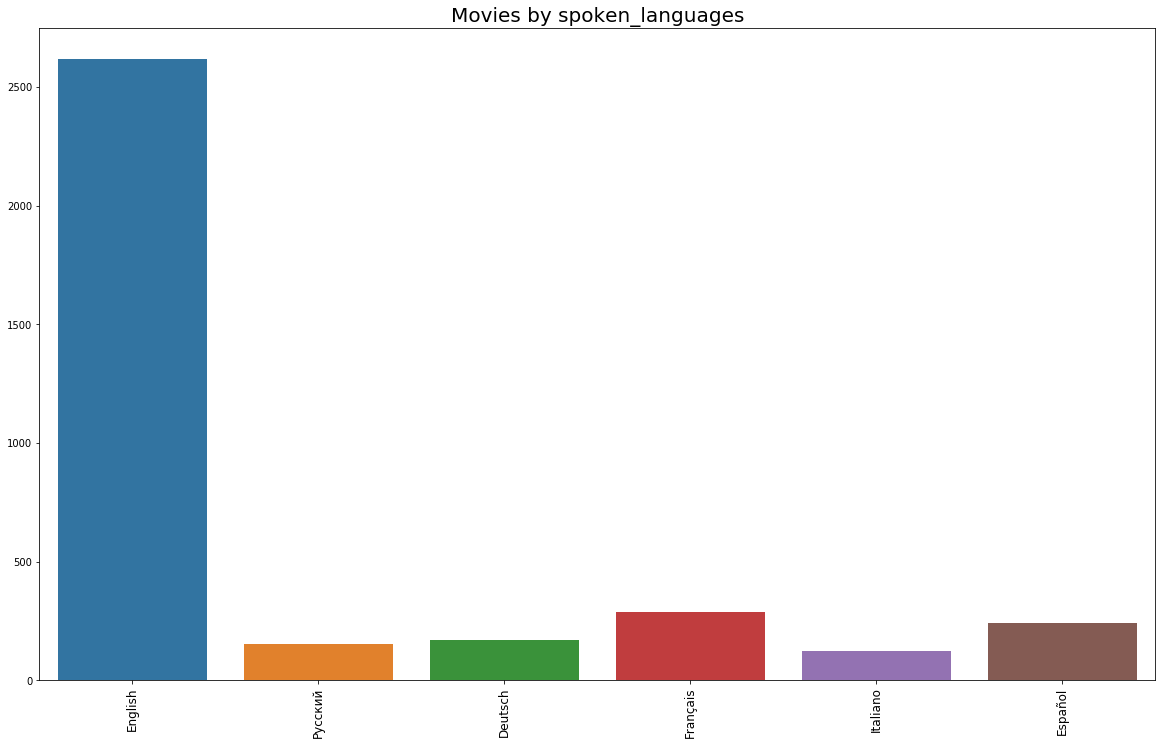

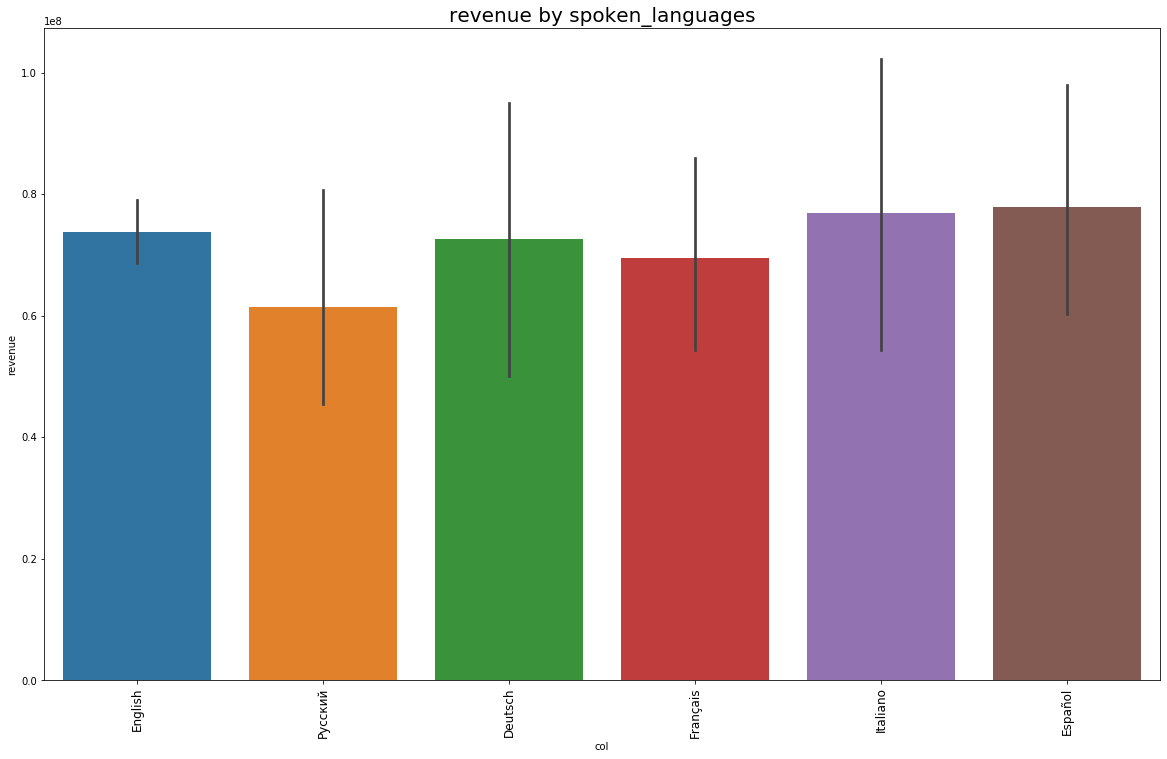

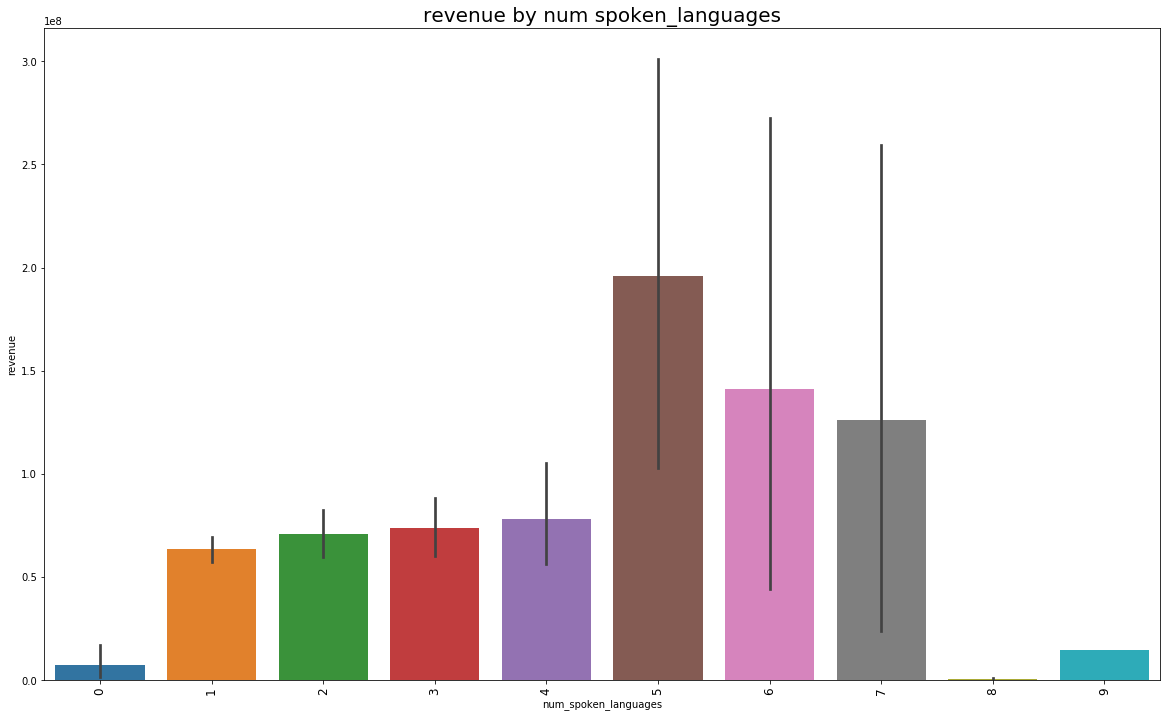

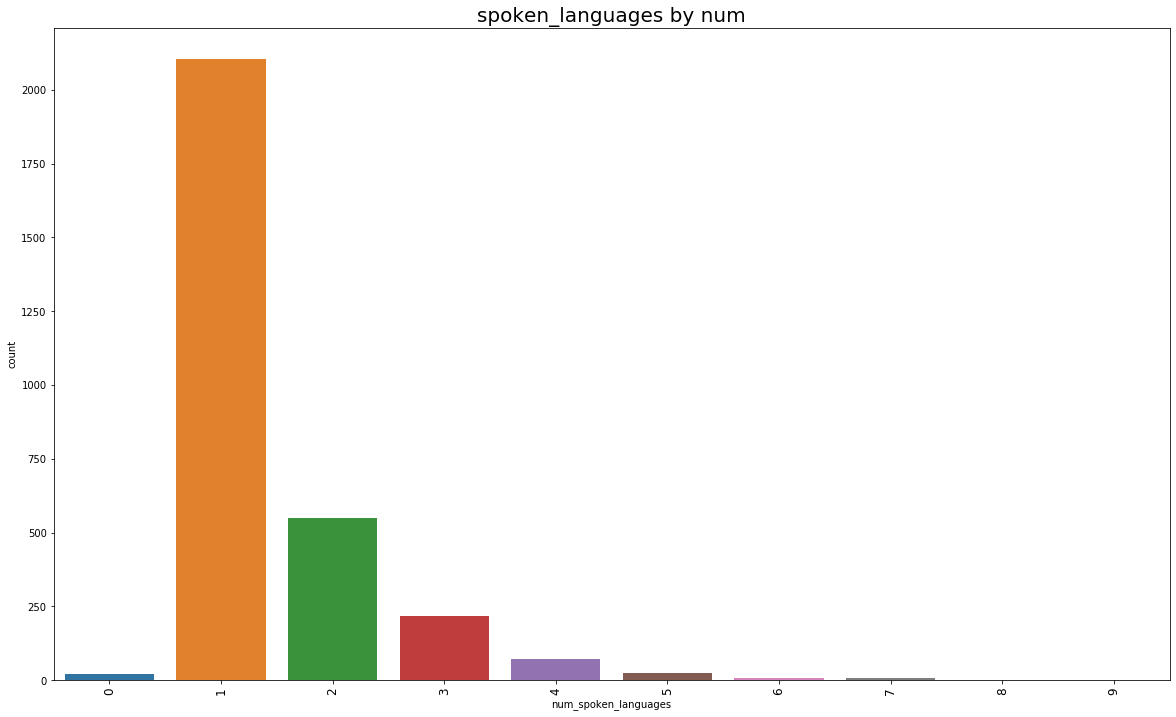

In [80]:
spoken_languages_res = plot_multivalue_column(data, 'spoken_languages', Y='revenue', select=lambda x: x['name'], min_entries=100, scatterplot=False)

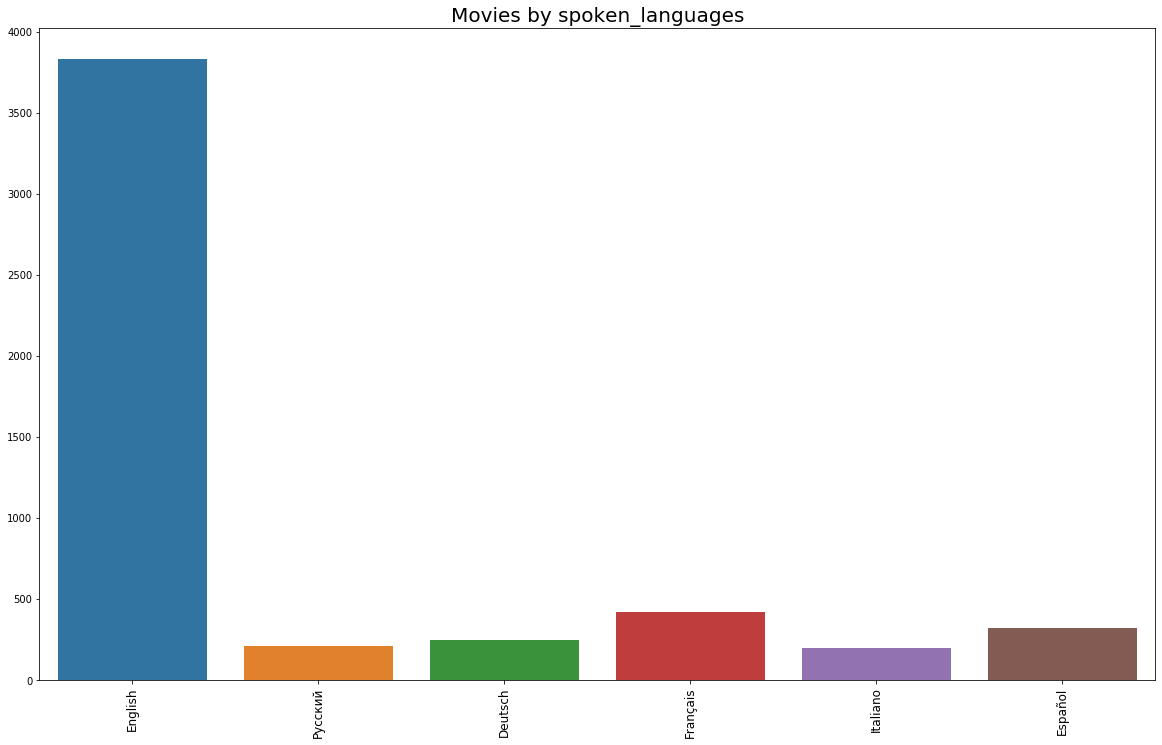

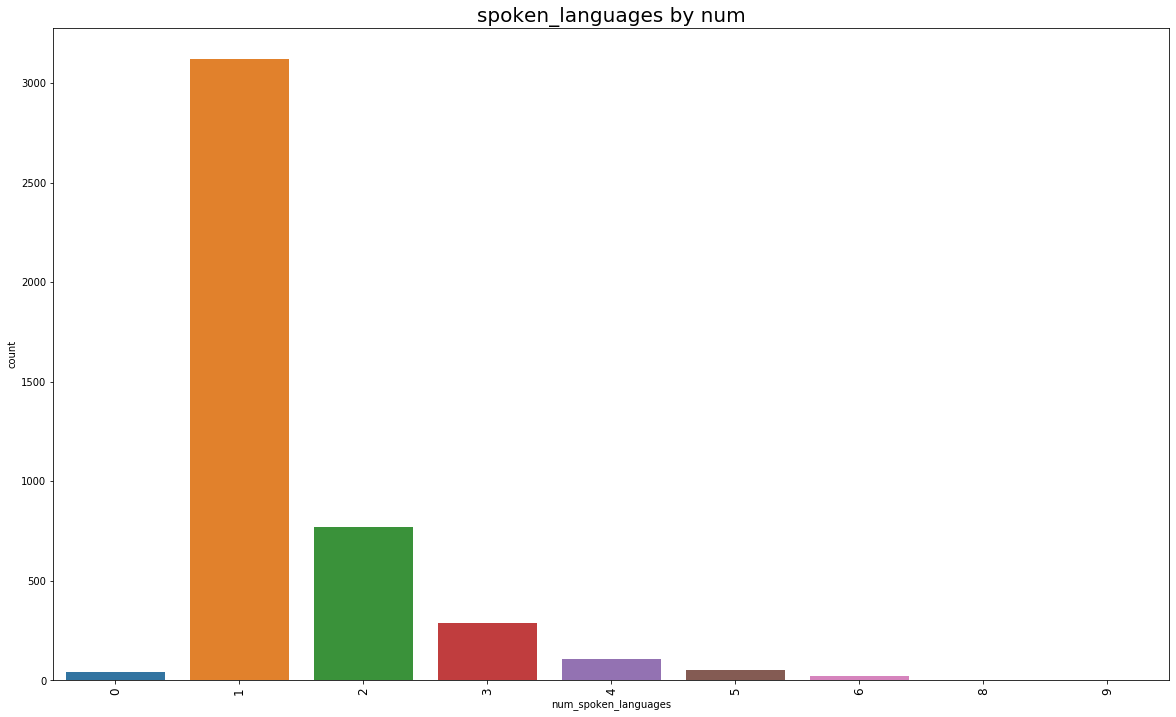

In [81]:
spoken_languages_test_res = plot_multivalue_column(test, 'spoken_languages', select=lambda x: x['name'], scatterplot=False, list_entries=spoken_languages_res)

NOTE: Movies with multiple langauges are shown multiple times

In [82]:
attributes.extend(spoken_languages_res)

In [83]:
attributes.append('num_spoken_languages')

### Production companies

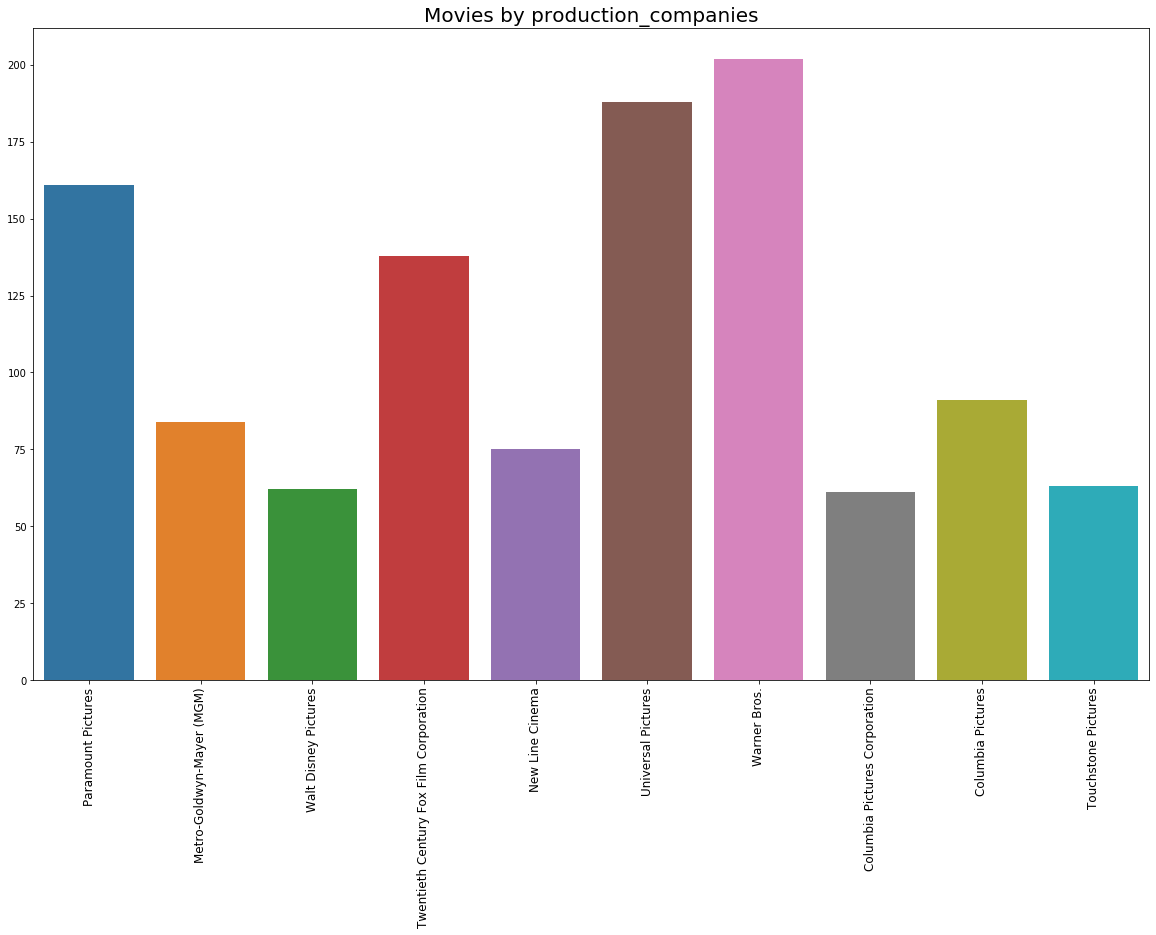

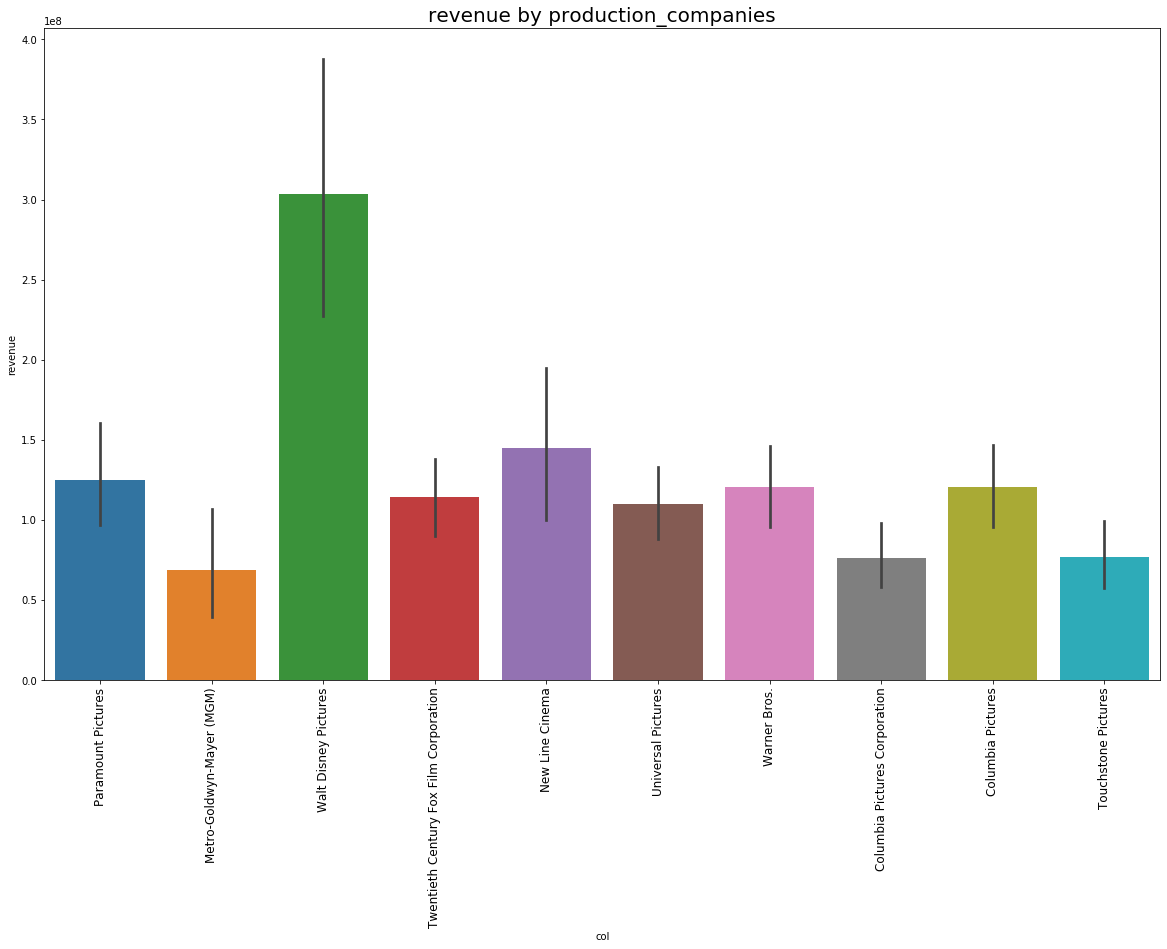

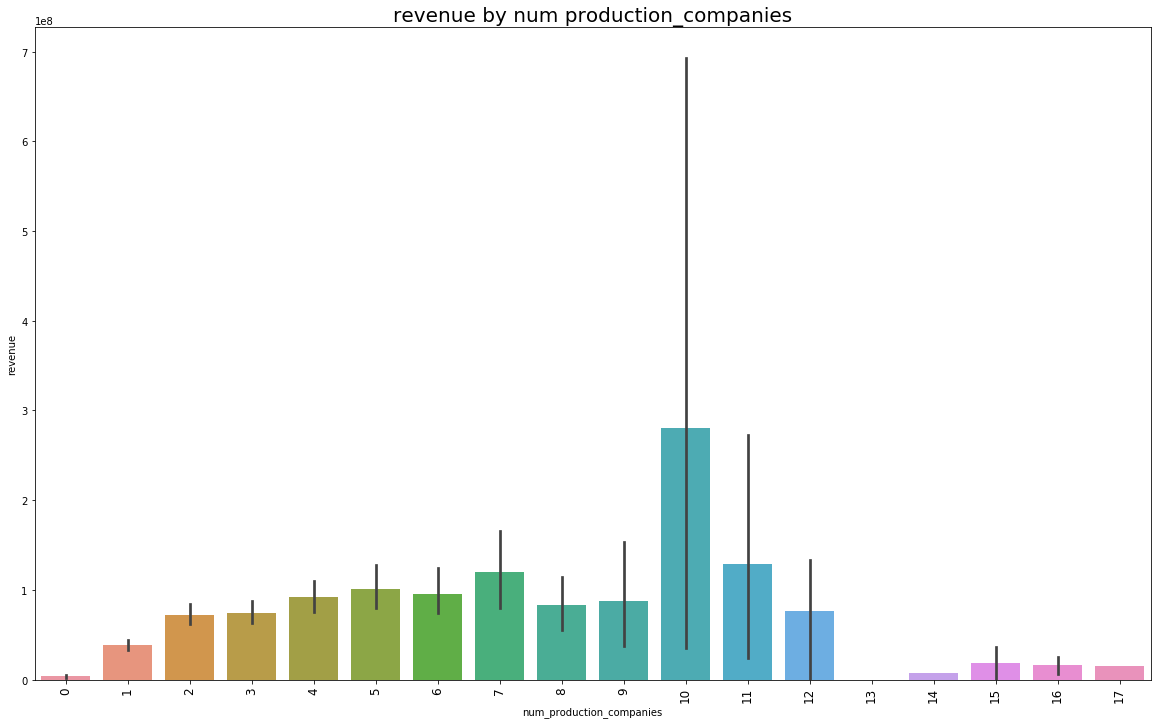

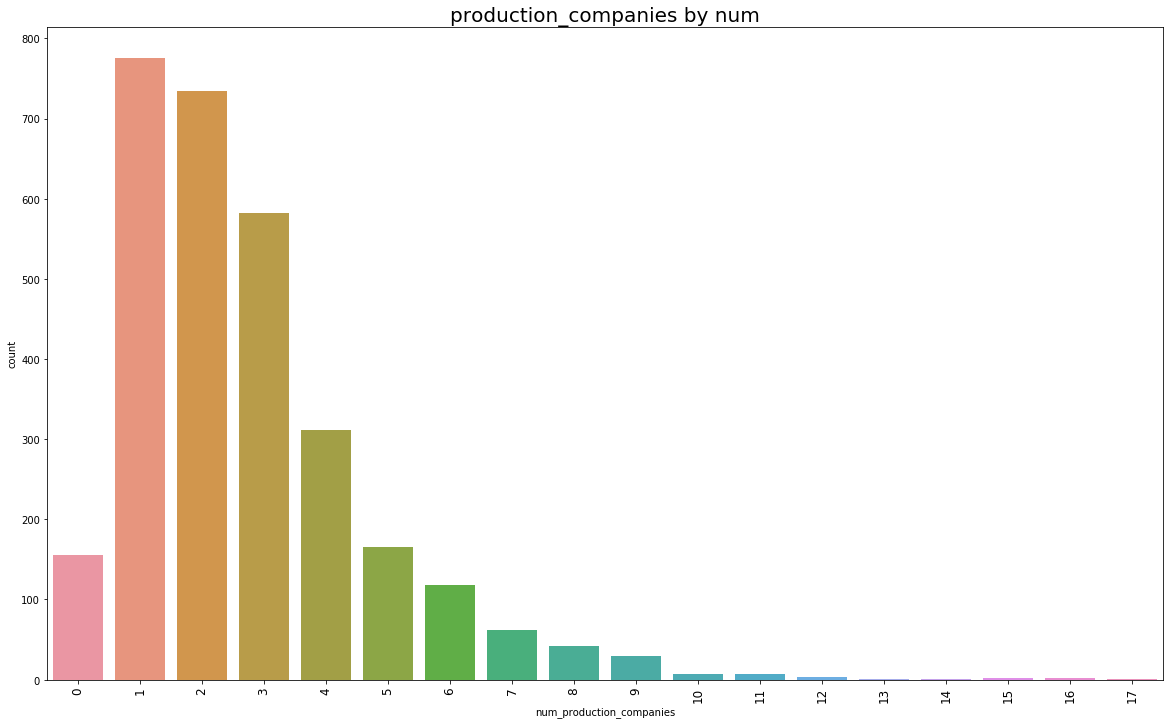

In [84]:
production_companies_res = plot_multivalue_column(data, 'production_companies', Y='revenue', select=lambda x: x['name'], min_entries=60, scatterplot=False)

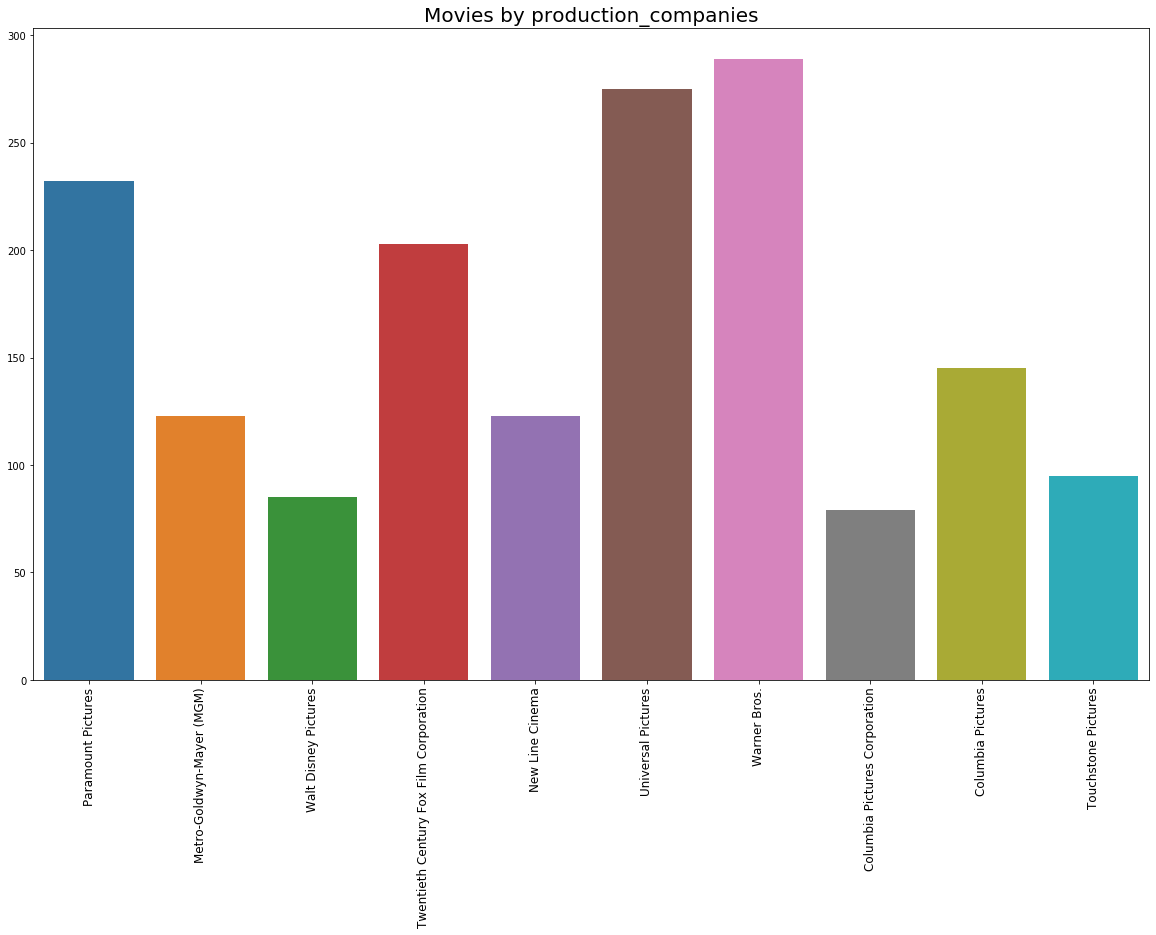

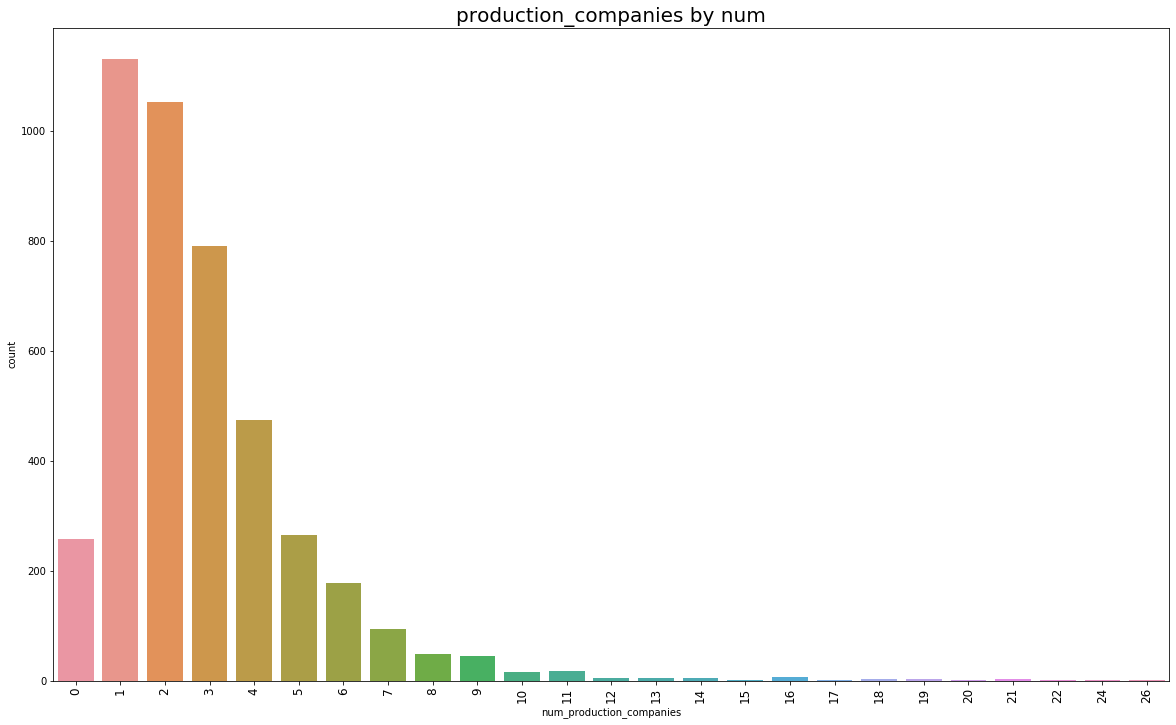

In [85]:
production_companies_test_res = plot_multivalue_column(test, 'production_companies', select=lambda x: x['name'], min_entries=60, scatterplot=False, list_entries=production_companies_res)

In [86]:
attributes.extend(production_companies_res)

In [87]:
attributes.append('num_production_companies')

## Production countries

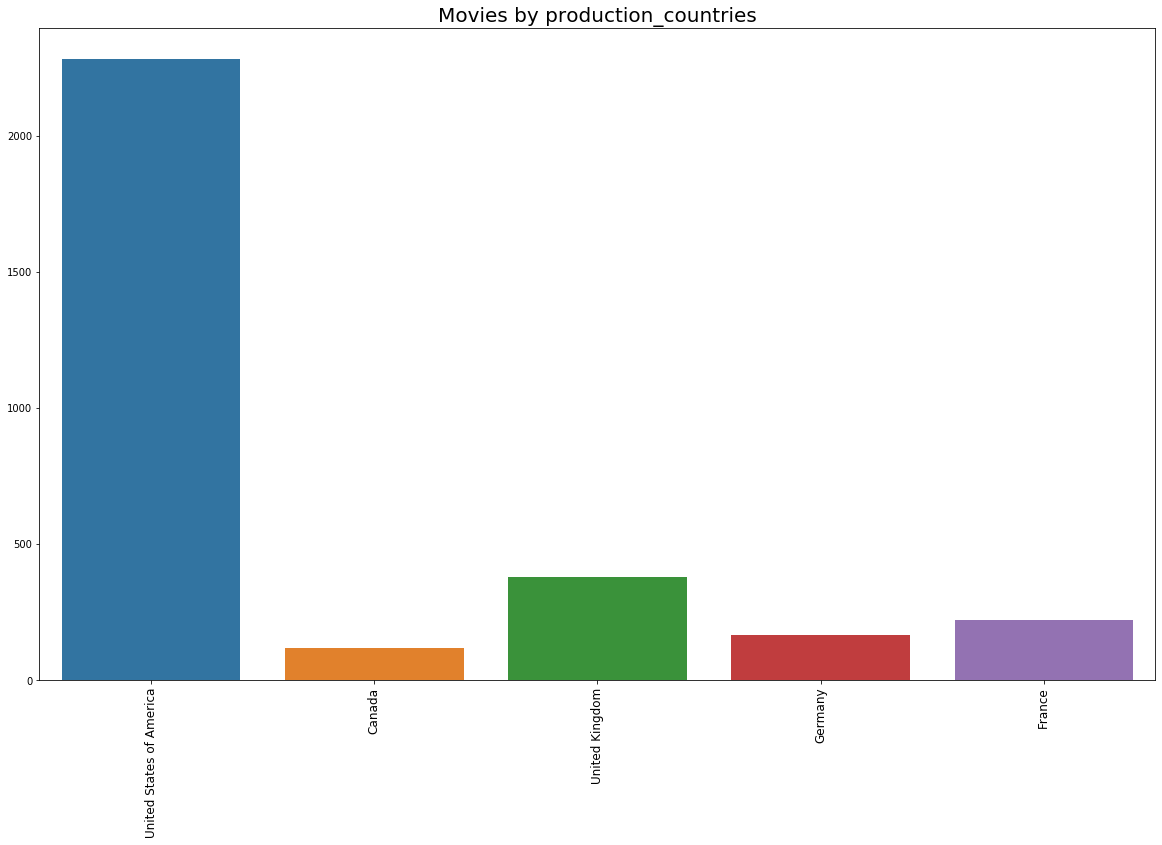

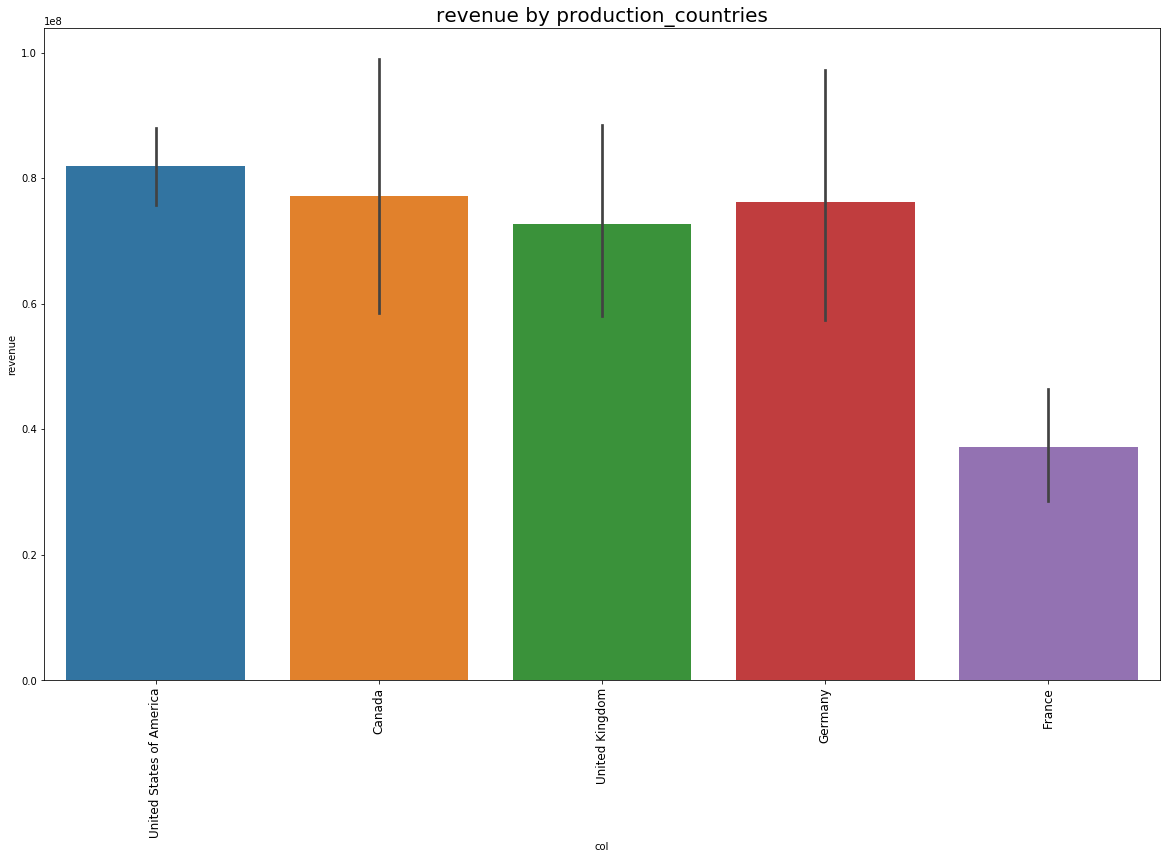

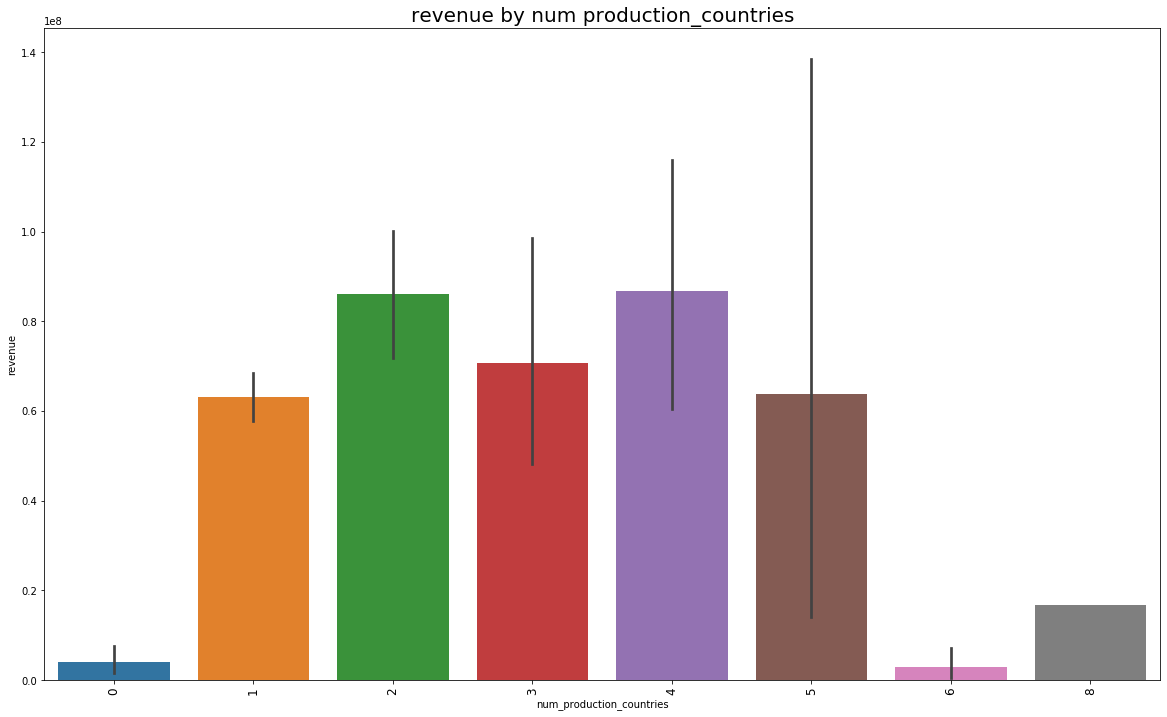

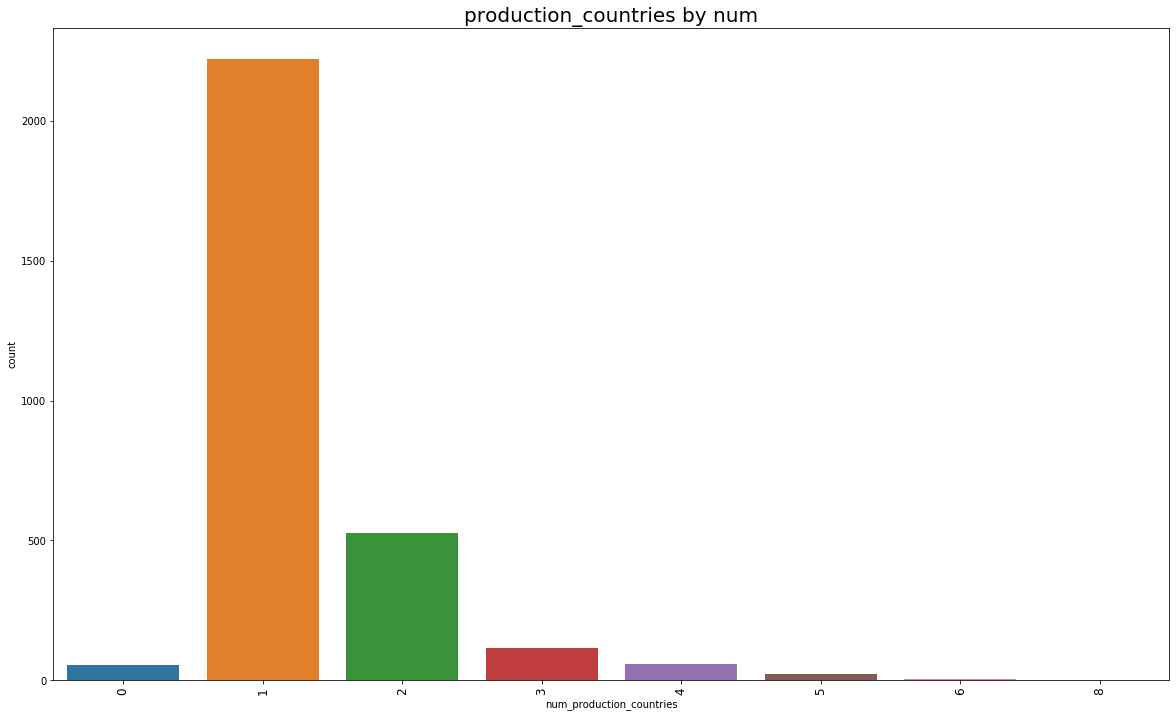

In [88]:
production_countries_res = plot_multivalue_column(data, 'production_countries', Y='revenue', select=lambda x: x['name'], min_entries=100, scatterplot=False)

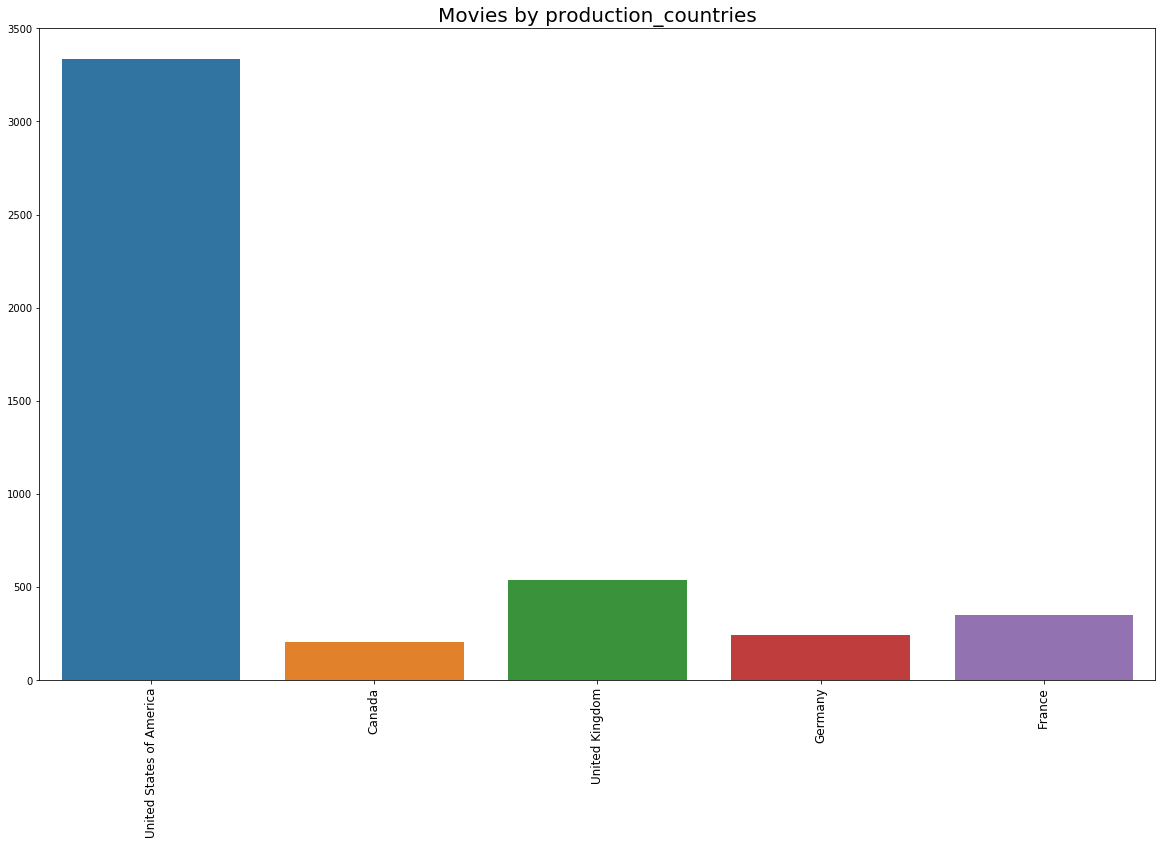

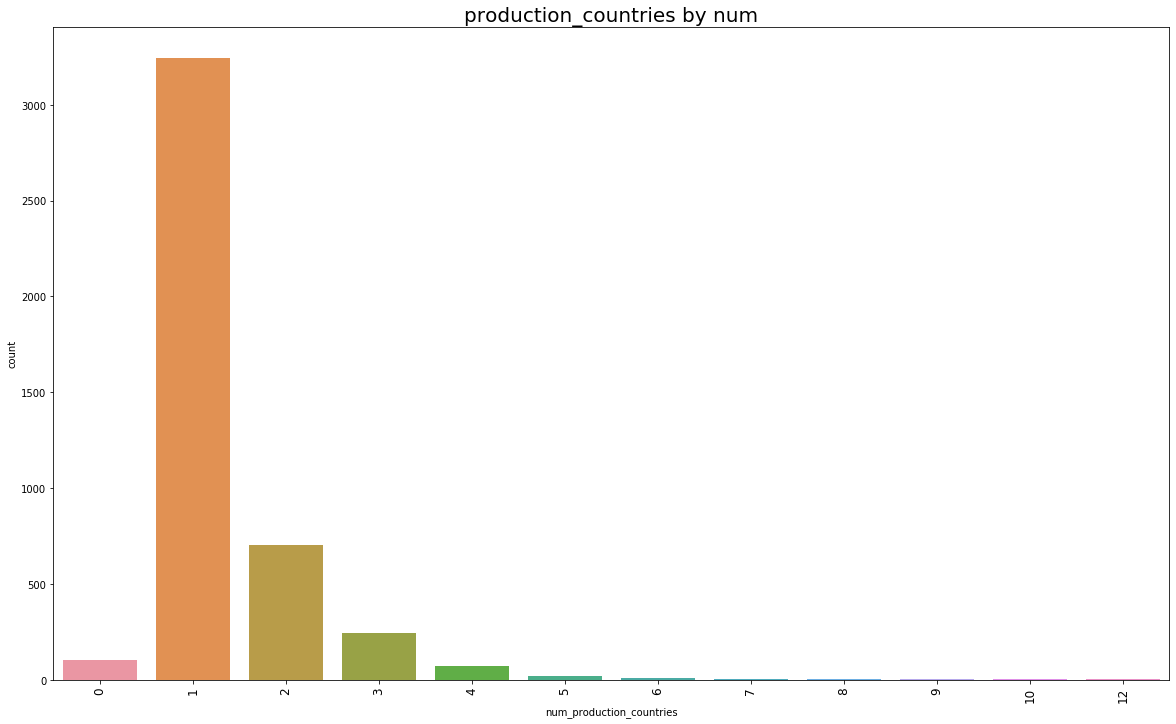

In [89]:
production_countries_test_res = plot_multivalue_column(test, 'production_countries', select=lambda x: x['name'], min_entries=60, scatterplot=False, list_entries=production_countries_res)

In [90]:
attributes.extend(production_countries_res)

In [91]:
attributes.append('num_production_countries')

## Crew

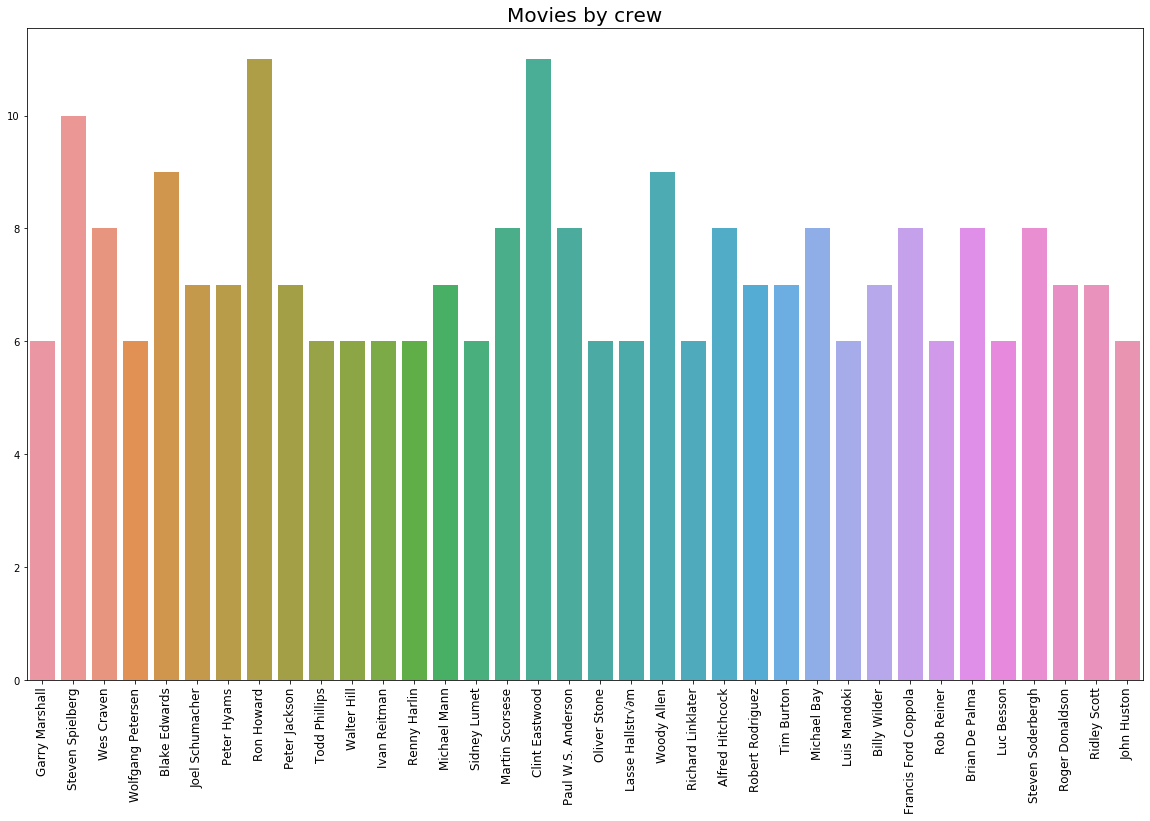

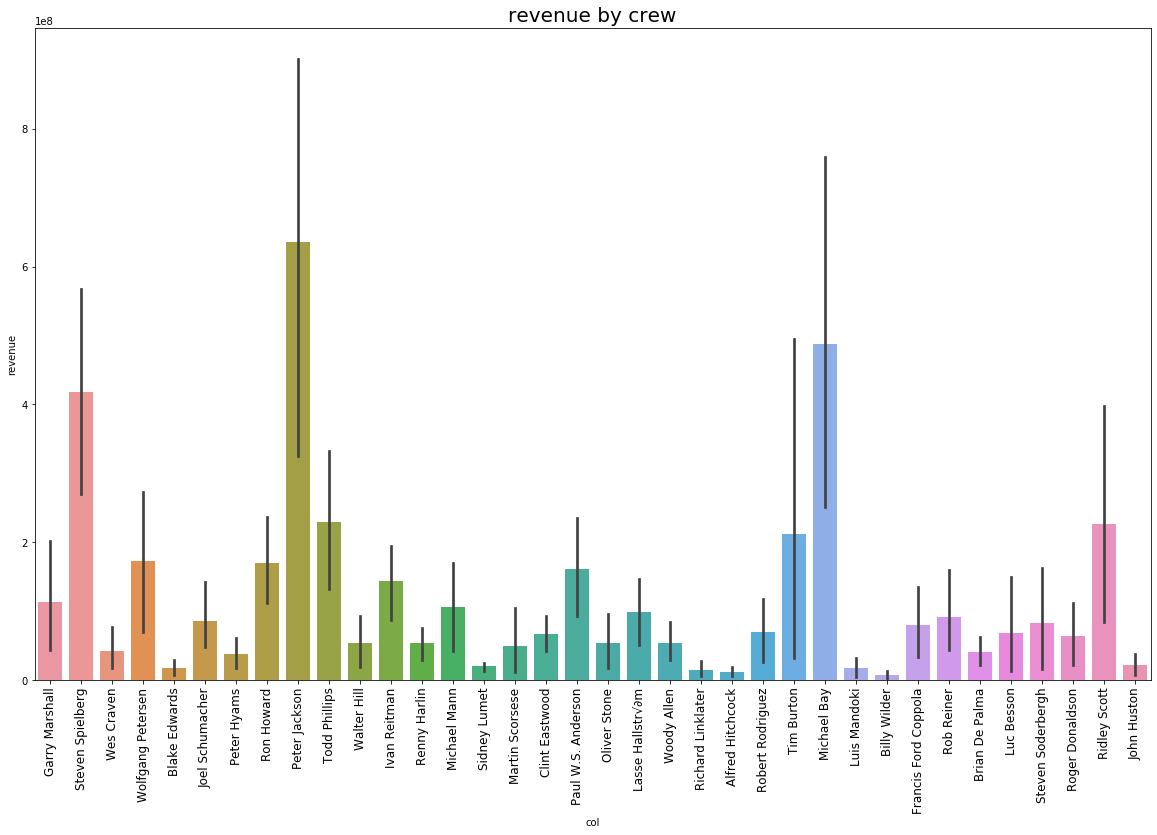

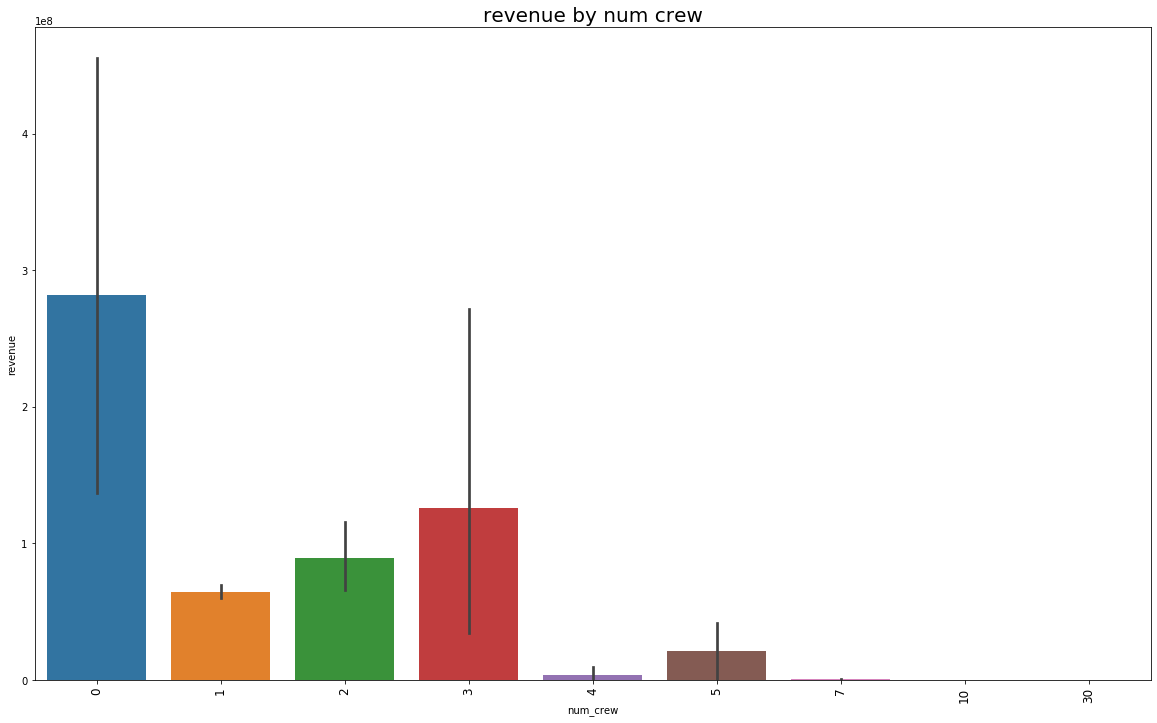

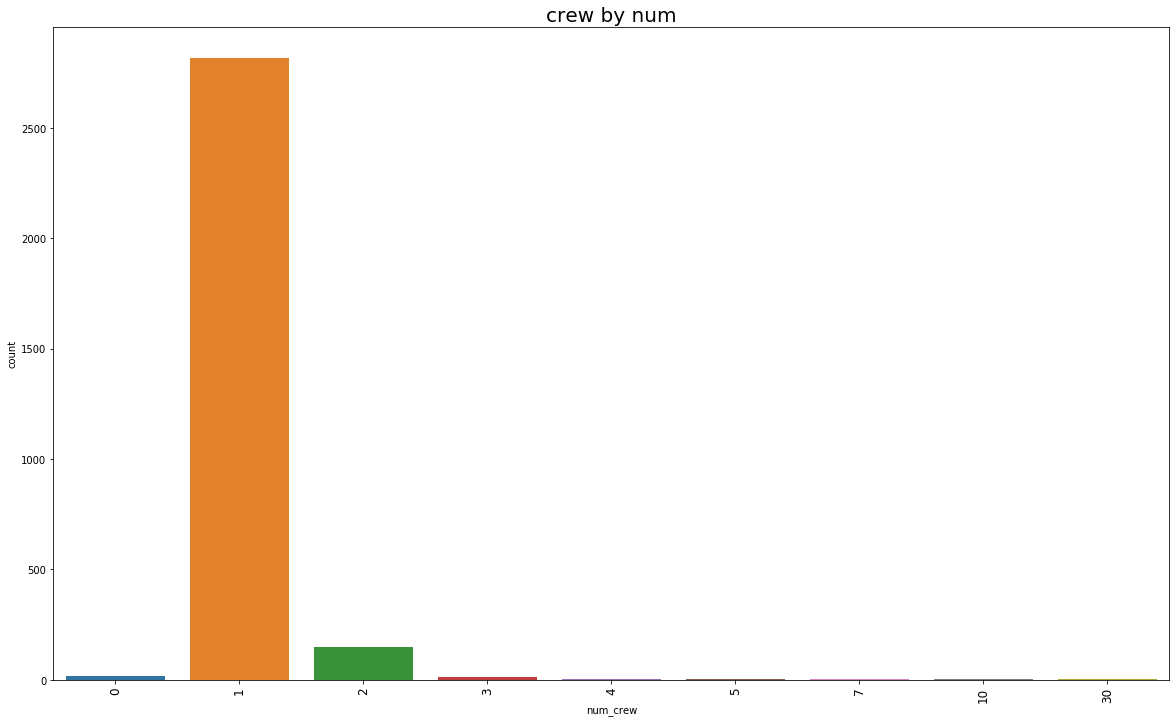

In [92]:
crew_res = plot_multivalue_column(data, 'crew', Y='revenue', select=lambda x: x['name'], filt=lambda x: x['job'] == 'Director', min_entries=5, scatterplot=False)

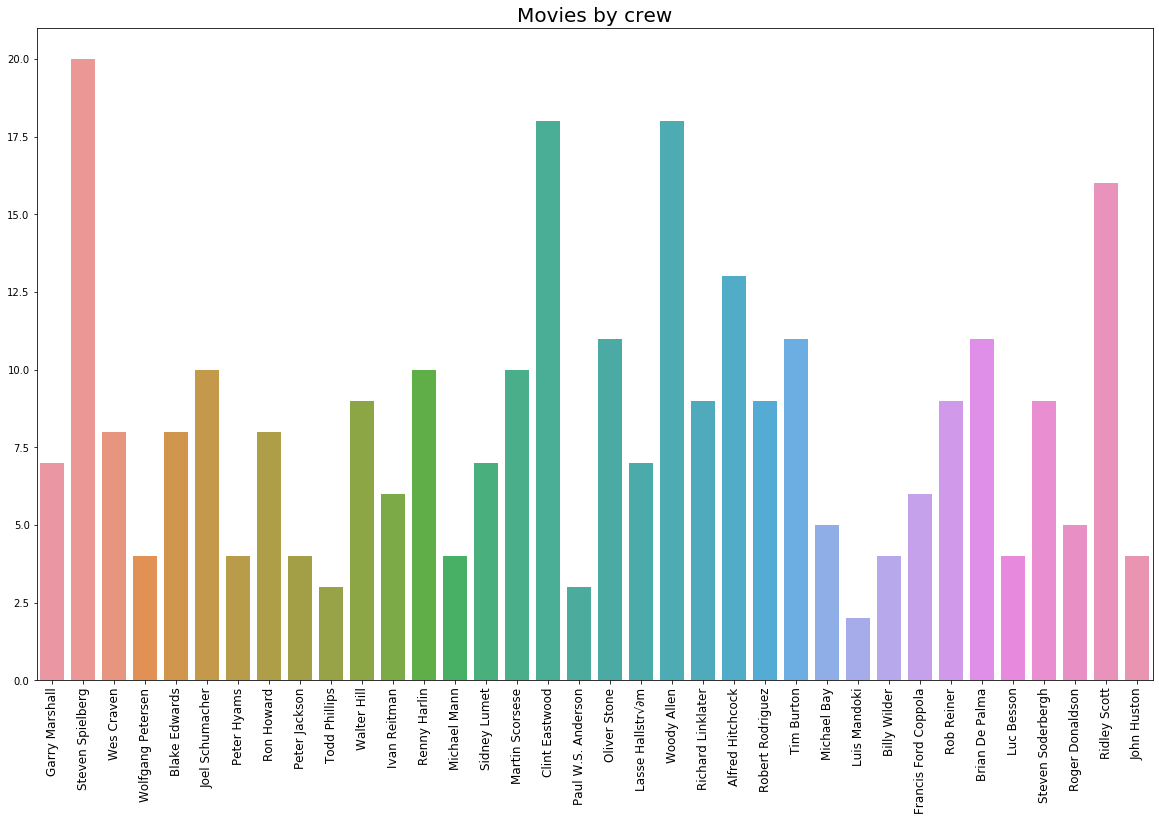

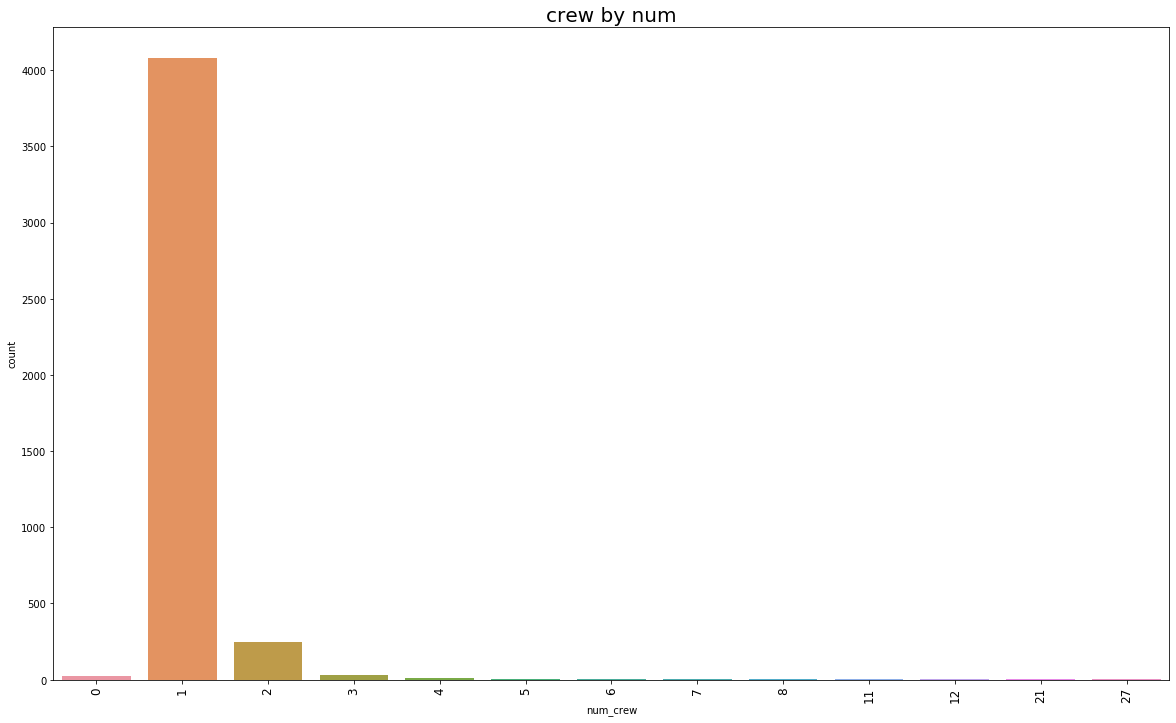

In [93]:
crew_test_res = plot_multivalue_column(test, 'crew', select=lambda x: x['name'], filt=lambda x: x['job'] == 'Director', min_entries=5, scatterplot=False, list_entries=crew_res)

Try to group directors

In [94]:
def get_director(df):
    crew = df['crew'].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    directors = crew.apply(lambda crw: list(filter(lambda x: 'job' in x and x['job'] == 'Director', crw)))
    director = directors.apply(lambda dir: dir[0] if len(dir) >= 1 else None)
    return director.apply(lambda x: x['name'] if x else None)
    

In [95]:
data['director'] = get_director(data)

In [96]:
test['director'] = get_director(test)

In [97]:
dir_total = list(data['director']) + list(test['director'])

In [98]:
train_dirs = list(dict.fromkeys(get_director(data)))

In [99]:
test_dirs = list(dict.fromkeys(get_director(test)))

In [100]:
both_dirs = dict.fromkeys(get_director(test) + get_director(data))

In [101]:
len(train_dirs)

1858

In [102]:
len(test_dirs)

2450

In [103]:
len(both_dirs)

2968

In [104]:
min_samples = 3

In [105]:
mean_dir_rev = [(dir, data[data['director'] == dir]['revenue'].mean()) for dir in train_dirs if len(data[data['director'] == dir]) >= min_samples]

In [106]:
median_dir_rev = [(dir, data[data['director'] == dir]['revenue'].median()) for dir in train_dirs if len(data[data['director'] == dir]) >= min_samples]

In [107]:
dict_mean_dir_rev = dict(mean_dir_rev)

In [108]:
dict_median_dir_rev = dict(median_dir_rev)

In [109]:
len(list(filter(lambda x: x in dict_mean_dir_rev, test_dirs)))

239

In [110]:
len(list(filter(lambda x: x in dict_mean_dir_rev, train_dirs)))

263

In [286]:
def director_num_total(dir):
    return dir_total.count(dir)

In [287]:
def director_in_dic(dir):
    return director_num_total(dir) > 0

In [288]:
data['director_in_dic'] = data['director'].apply(lambda x: director_in_dic(x))

In [289]:
data['director_movies'] = data['director'].apply(lambda x: director_num_total(x))

In [290]:
test['director_in_dic'] = test['director'].apply(lambda x: director_in_dic(x))

In [291]:
test['director_movies'] = test['director'].apply(lambda x: director_num_total(x))

In [178]:
attributes.extend(crew_res)

In [179]:
attributes.append('num_crew')

In [180]:
attributes.extend(['director_in_dic','director_movies'])

## Cast

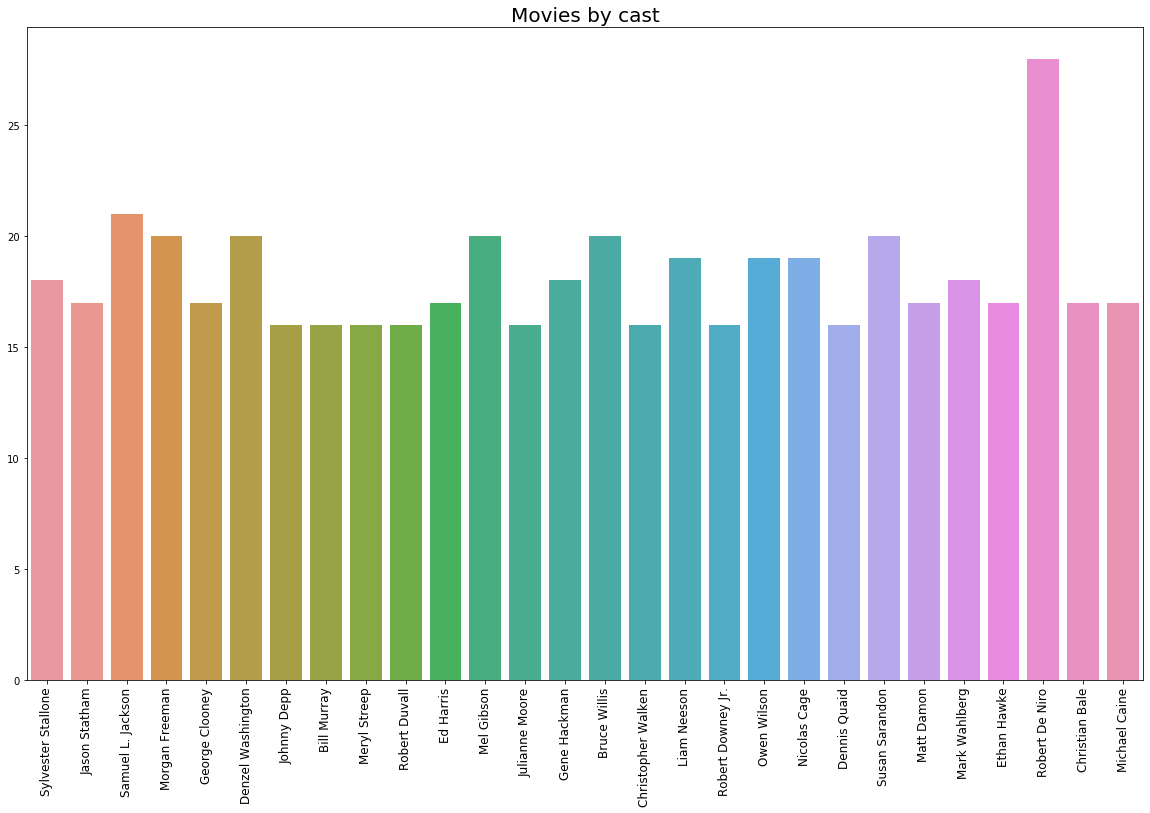

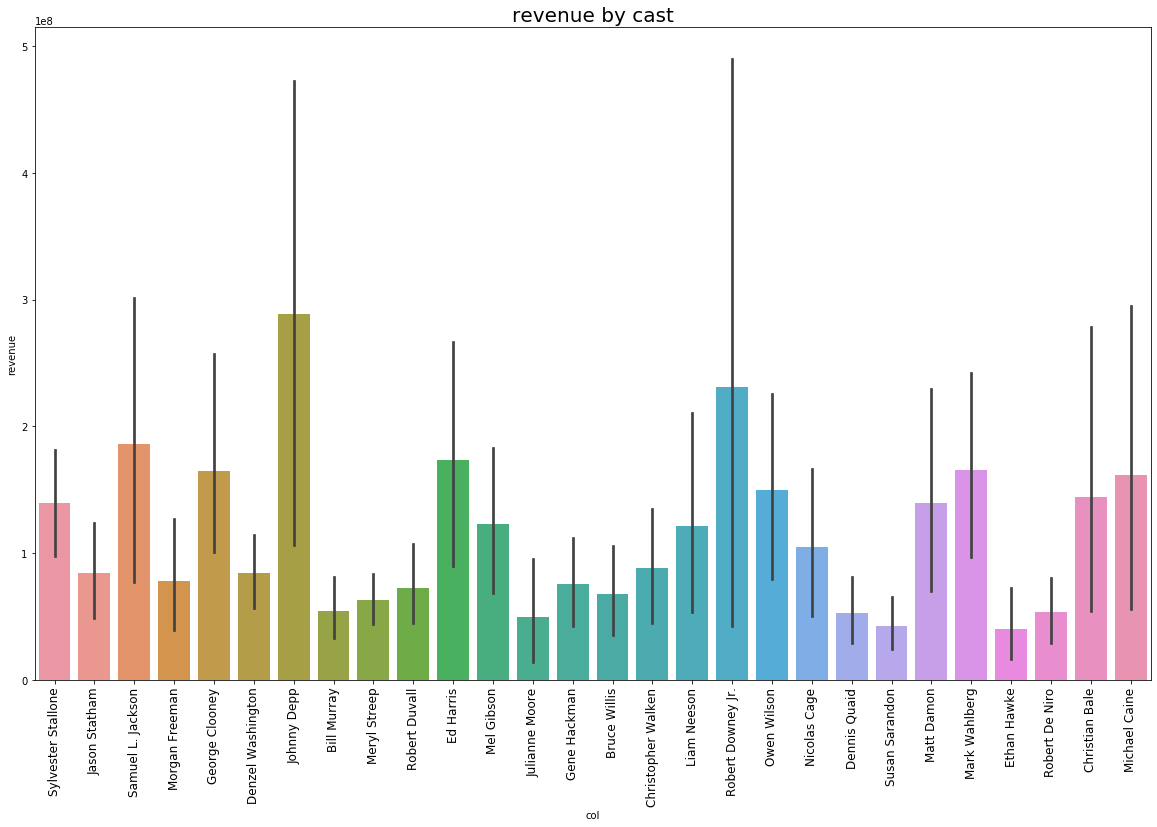

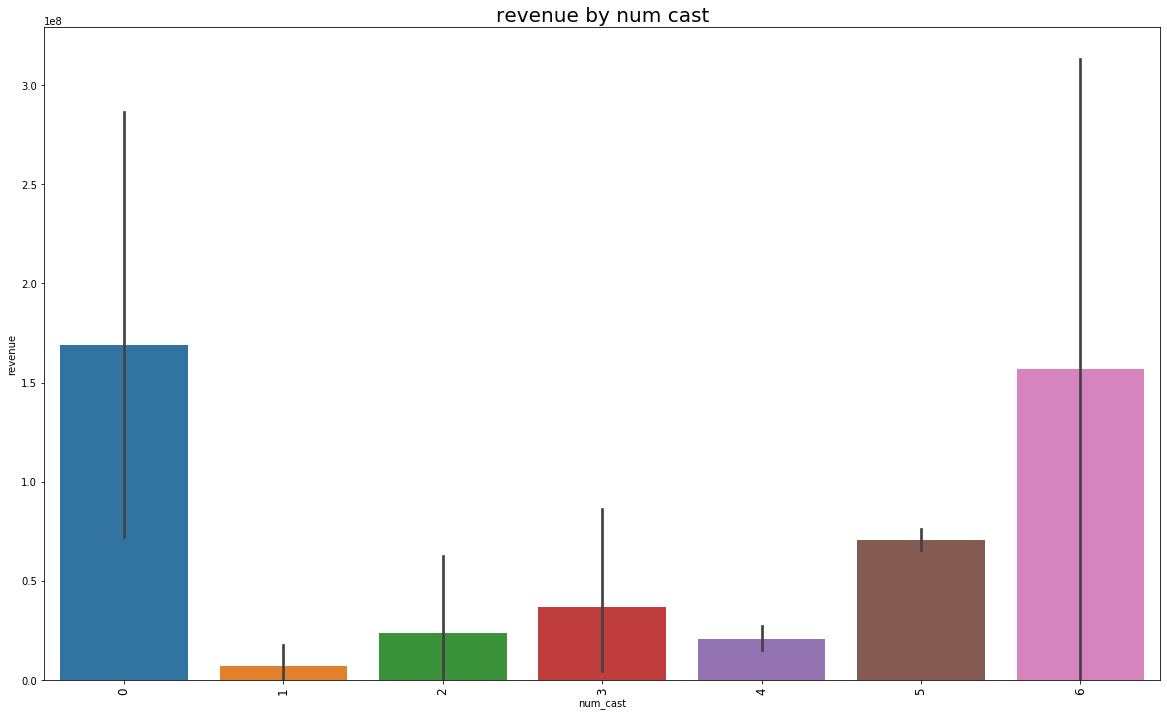

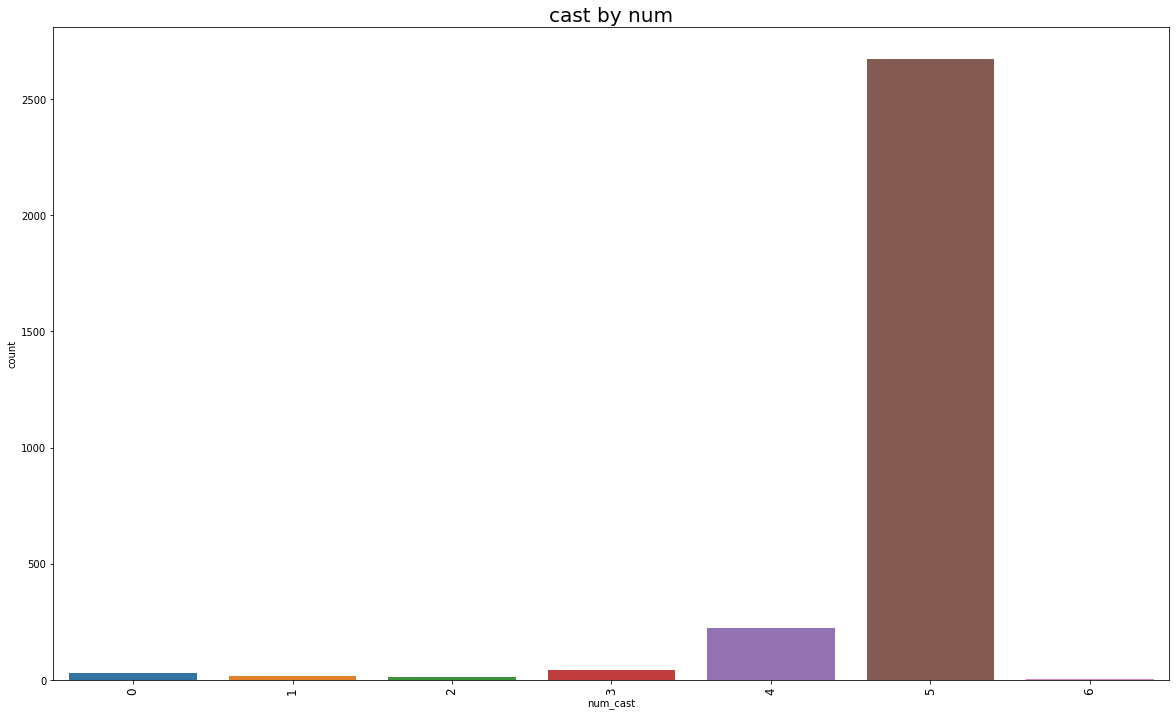

In [132]:
cast_res = plot_multivalue_column(data, 'cast', Y='revenue', select=lambda x: x['name'], filt=lambda x: x['order'] < 5, min_entries=15, scatterplot=False)

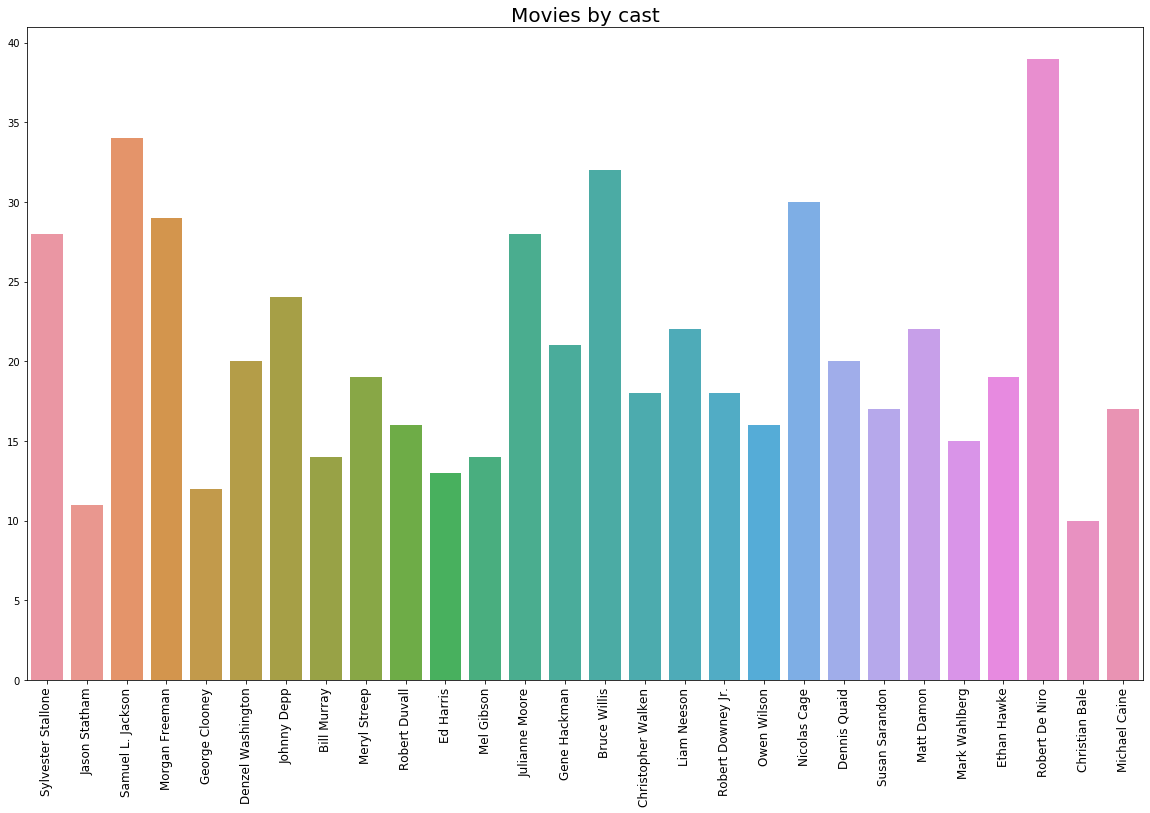

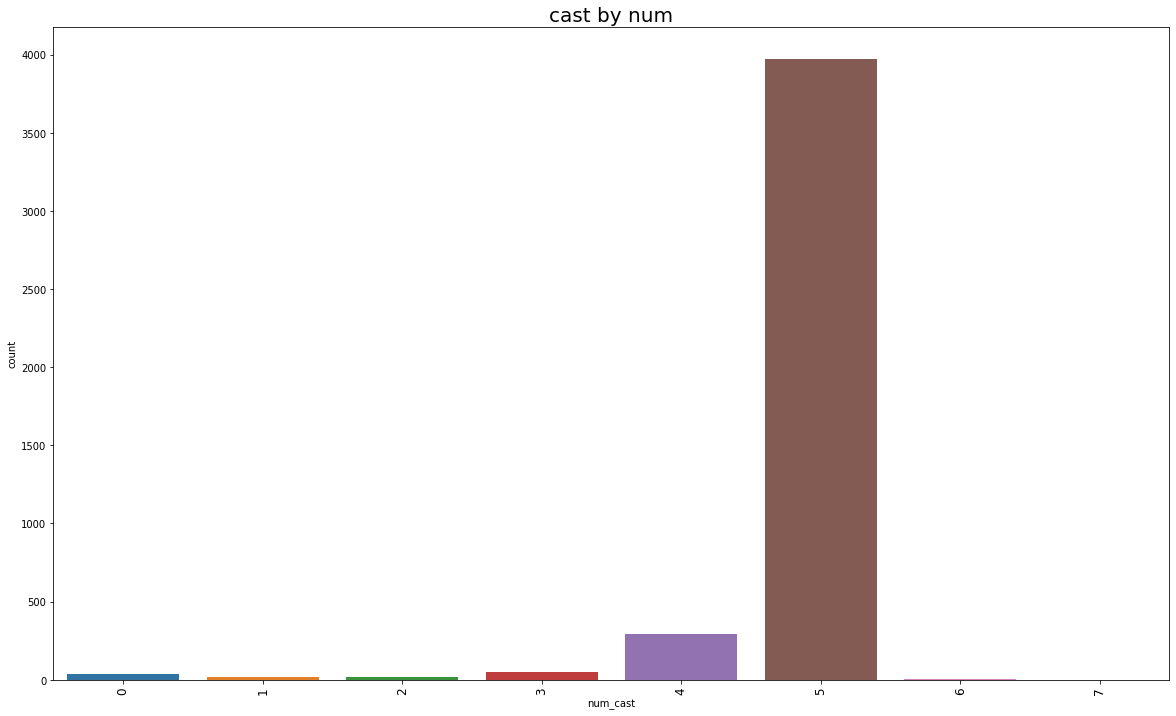

In [133]:
cast_test_res = plot_multivalue_column(test, 'cast', select=lambda x: x['name'], filt=lambda x: x['order'] < 5, min_entries=15, scatterplot=False, list_entries=cast_res)

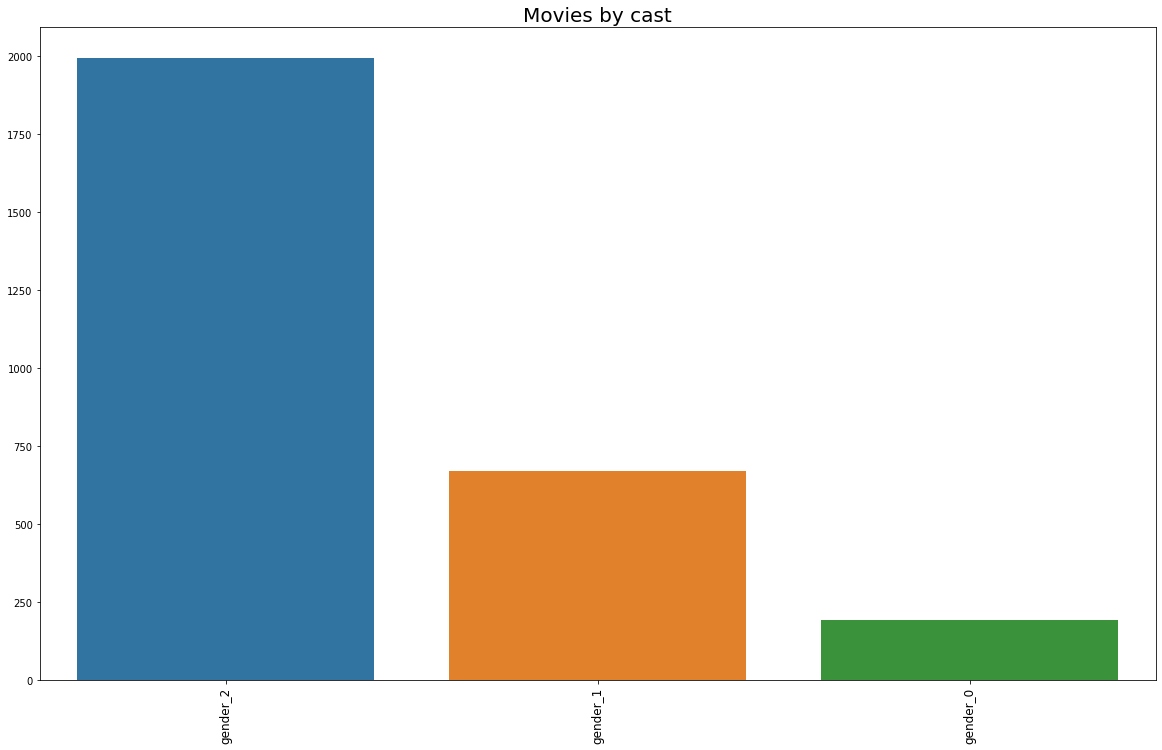

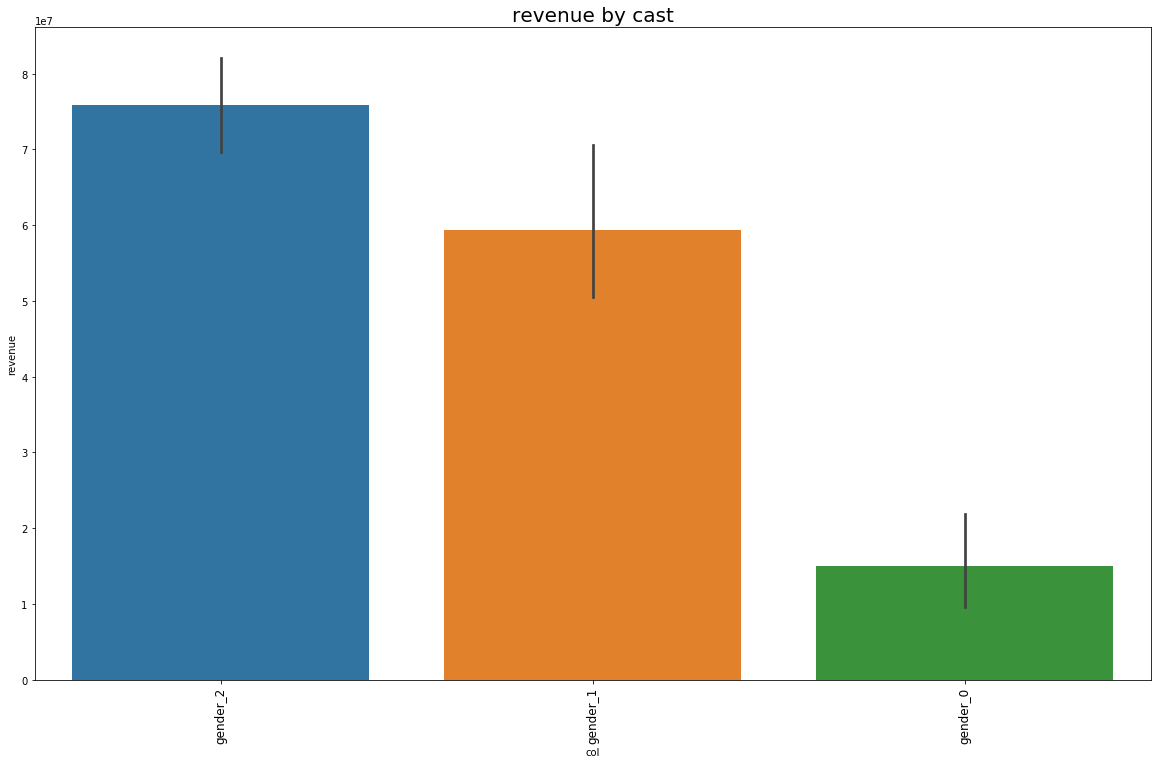

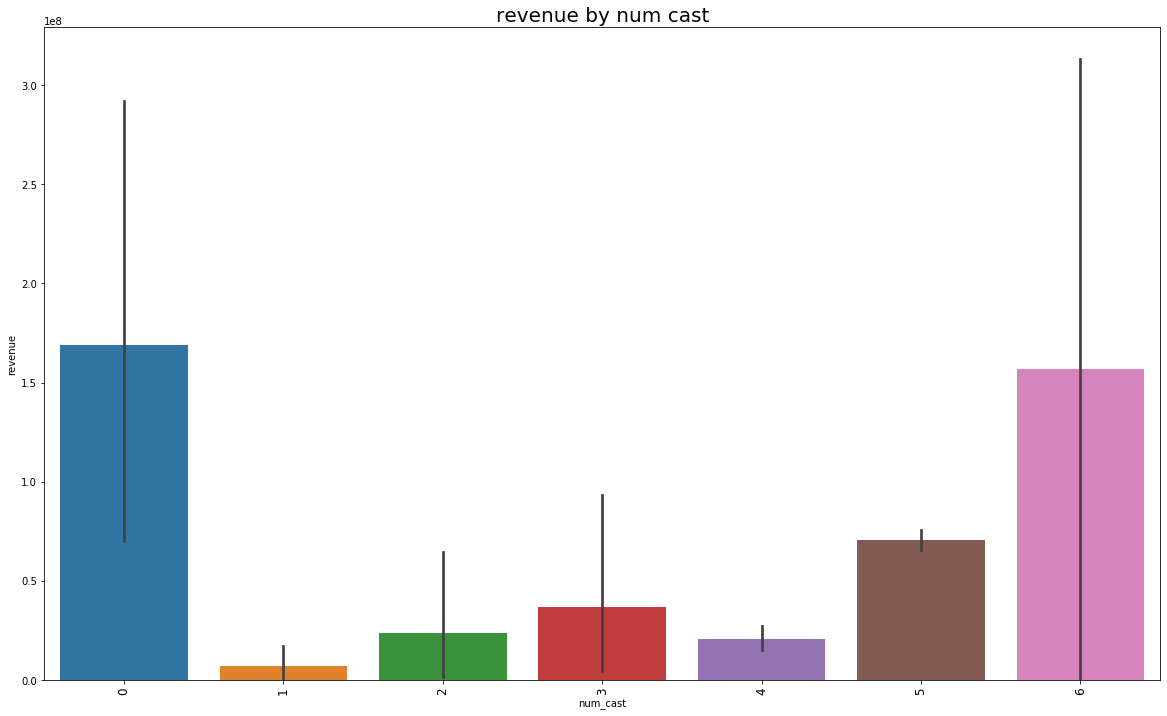

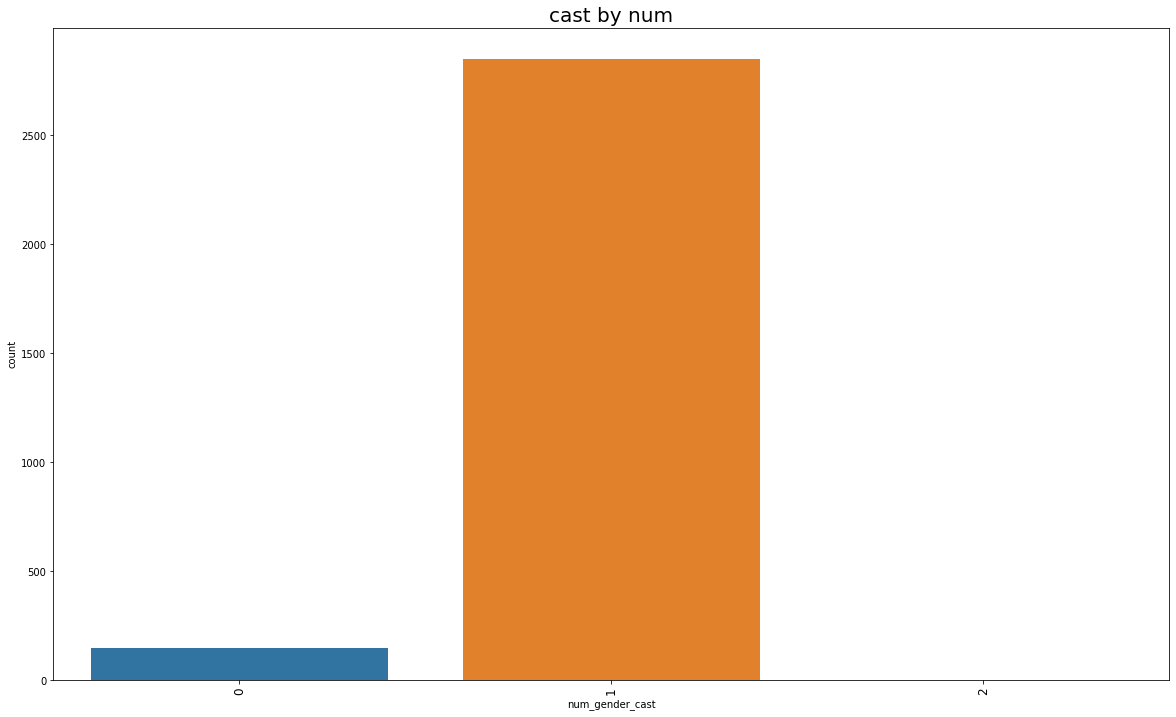

In [134]:
gender_res = plot_multivalue_column(data, 'cast', Y='revenue', select=lambda x: x['gender'], filt=lambda x: x['order'] == 0, scatterplot=False, prefix='gender_')

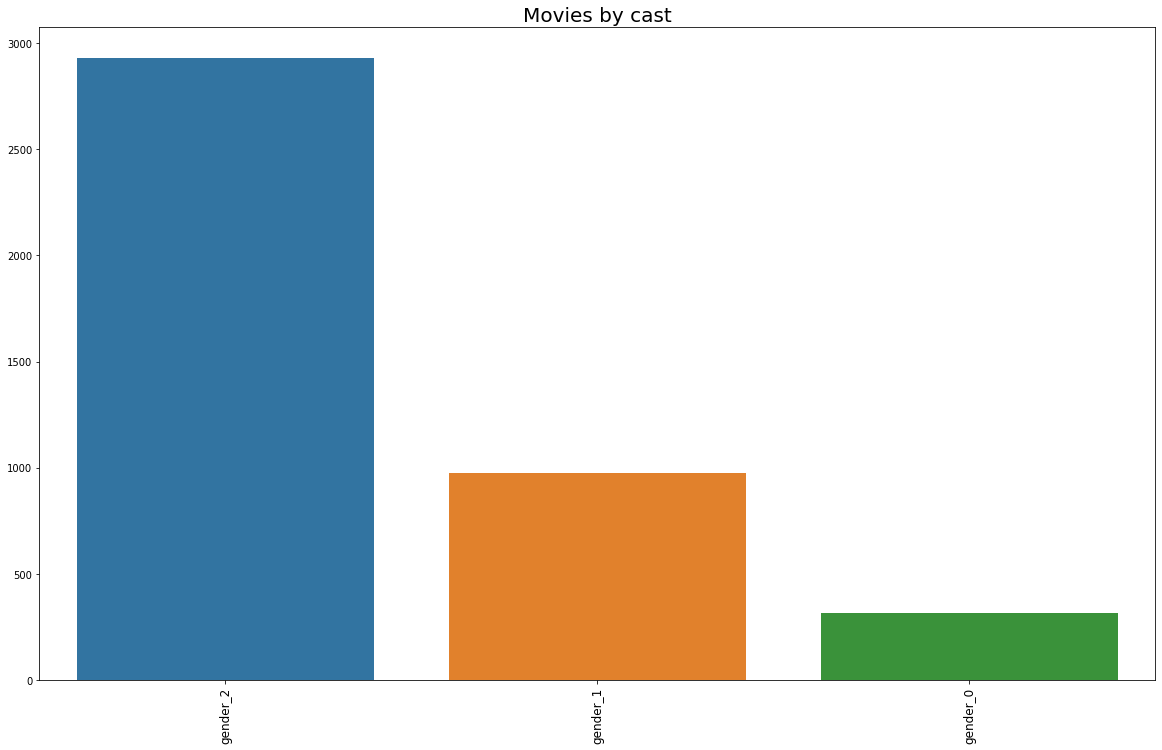

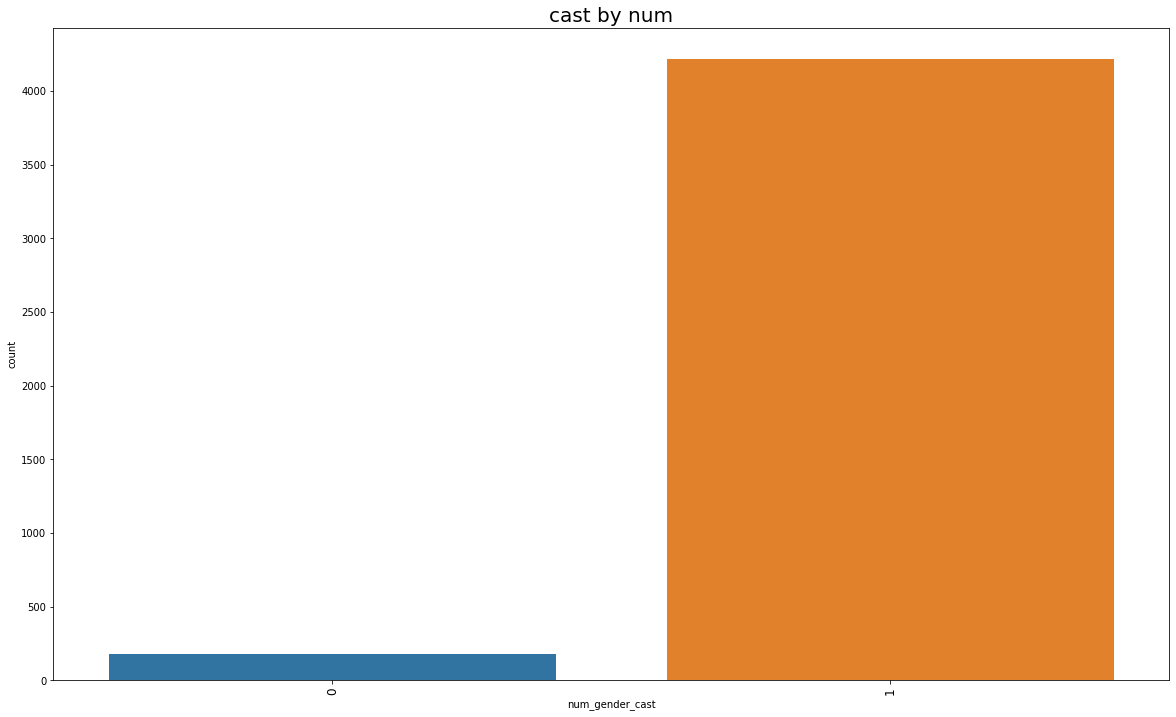

In [135]:
gender_test_res = plot_multivalue_column(test, 'cast', select=lambda x: x['gender'], filt=lambda x: x['order'] == 0, scatterplot=False, prefix='gender_', list_entries=gender_res)

In [136]:
def gender_dist(df):
    cast = df['cast'].apply(lambda x: eval(x) if not pd.isnull(x) else [])
    genders = cast.apply(lambda cas: list(filter(lambda gender: gender != 0, [x['gender'] for x in cas])))
    dist = genders.apply(lambda gen: 0.5 if len(gen) == 0 else len(list(filter(lambda g: g == 1, gen))) / len(gen))
    return dist

In [137]:
data['gender_dist'] = gender_dist(data)

In [138]:
test['gender_dist'] = gender_dist(test)

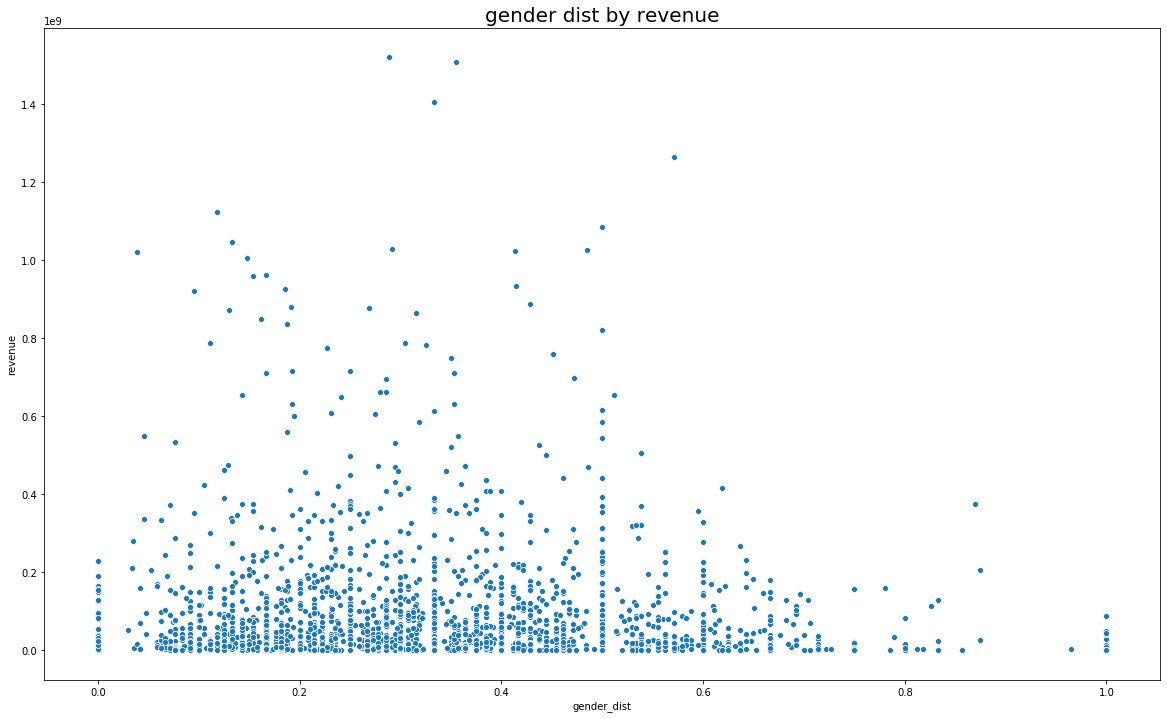

In [139]:
plt.figure(figsize=(20,12))
sns.scatterplot(x='gender_dist', y='revenue', data=data)
plt.title("gender dist by revenue",fontsize=20)
plt.show()

In [140]:
attributes.extend(cast_res)

In [141]:
attributes.append('num_cast')

In [142]:
attributes.extend(gender_res)

In [143]:
attributes.append('gender_dist')

NOTE: 2 male, 1 female, 0 ?

## Original langauges

In [144]:
len(list(dict.fromkeys(list(data['original_language']))))

36

In [145]:
len(list(dict.fromkeys(list(test['original_language']))))

39

In [146]:
len(list(dict.fromkeys(list(test['original_language']) + list(data['original_language']))))

44

In [147]:
original_languages = list(dict.fromkeys(list(test['original_language']) + list(data['original_language'])))

In [148]:
org_lang_count = map(lambda l: (len(data[data['original_language'] == l]) + len(data[data['original_language'] == l]), l), original_languages)

In [149]:
org_langs = list(map(lambda x: x[1], filter(lambda x: x[0] > 50, org_lang_count)))

In [150]:
org_langs

['ja', 'en', 'fr', 'hi', 'ru', 'es']

In [151]:
for lang in org_langs:
    data['org_lang_' + lang] = data['original_language'] == lang
    test['org_lang_' + lang] = test['original_language'] == lang

In [152]:
org_langs_cols = list(map(lambda x: 'org_lang_'+ x, org_langs))

In [153]:
attributes.extend(org_langs_cols)

## Checking correlation

In [154]:
corr = data.corr()["revenue"]

In [155]:
corr.sort_values(ascending=False)

revenue                     1.000000
inflated_revenue            0.994871
budget                      0.752965
popularity                  0.461460
director_mean               0.431485
director_median             0.428027
is_collection               0.339425
Adventure                   0.328439
has_homepage                0.263179
Walt Disney Pictures        0.250426
director_movies             0.245174
runtime                     0.216417
director_in_dic             0.214900
Peter Jackson               0.200111
United States of America    0.197595
num_Keywords                0.187721
Action                      0.184584
duringcreditsstinger        0.184310
aftercreditsstinger         0.175838
Fantasy                     0.171040
num_genres                  0.163654
Family                      0.161677
Michael Bay                 0.158544
num_production_companies    0.155700
sequel                      0.151561
Steven Spielberg            0.147477
org_lang_en                 0.142130
r

## Settings up data for models

In [156]:
def get_cols(df, keep_rows):
    data = df.copy()
    drop_cols = [col for col in df.columns if not col in keep_rows]
    data = data.drop(columns=drop_cols)
    return data
        
    

In [304]:
def test_regressor(reg, X, y):
    scores = np.sqrt(-cross_val_score(reg, X, y, scoring="neg_mean_squared_error", cv=5, n_jobs=-1))
    print("Scores:", scores)
    print("Mean", scores.mean())
    print("Std deviation", scores.std())
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

    return scores

In [278]:
transformed_data = get_cols(data, attributes) * 1 # * 1 makes True/False become 1/0

In [299]:
transformed_data.head()

,budget,popularity,runtime,title_same,has_homepage,is_collection,sequel,duringcreditsstinger,violence,woman director,female nudity,nudity,dystopia,murder,biography,independent film,suspense,friendship,sex,love,based on novel,police,teenager,sport,revenge,drug,aftercreditsstinger,num_Keywords,release_year,release_month,release_day,release_quarter,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Fantasy,War,History,num_genres,English,Pусский,Deutsch,Français,Italiano,Español,num_spoken_languages,Paramount Pictures,Metro-Goldwyn-Mayer (MGM),Walt Disney Pictures,Twentieth Century Fox Film Corporation,New Line Cinema,Universal Pictures,Warner Bros.,Columbia Pictures Corporation,Columbia Pictures,Touchstone Pictures,num_production_companies,United States of America,Canada,United Kingdom,Germany,France,num_production_countries,Garry Marshall,Steven Spielberg,Wes Craven,Wolfgang Petersen,Blake Edwards,Joel Schumacher,Peter Hyams,Ron Howard,Peter Jackson,Todd Phillips,Walter Hill,Ivan Reitman,Renny Harlin,Michael Mann,Sidney Lumet,Martin Scorsese,Clint Eastwood,Paul W.S. Anderson,Oliver Stone,Lasse Hallstr√∂m,Woody Allen,Richard Linklater,Alfred Hitchcock,Robert Rodriguez,Tim Burton,Michael Bay,Luis Mandoki,Billy Wilder,Francis Ford Coppola,Rob Reiner,Brian De Palma,Luc Besson,Steven Soderbergh,Roger Donaldson,Ridley Scott,John Huston,num_crew,director_in_dic,director_movies,Sylvester Stallone,Jason Statham,Samuel L. Jackson,Morgan Freeman,George Clooney,Denzel Washington,Johnny Depp,Bill Murray,Meryl Streep,Robert Duvall,Ed Harris,Mel Gibson,Julianne Moore,Gene Hackman,Bruce Willis,Christopher Walken,Liam Neeson,Robert Downey Jr.,Owen Wilson,Nicolas Cage,Dennis Quaid,Susan Sarandon,Matt Damon,Mark Wahlberg,Ethan Hawke,Robert De Niro,Christian Bale,Michael Caine,num_cast,gender_2,gender_1,gender_0,gender_dist,org_lang_ja,org_lang_en,org_lang_fr,org_lang_hi,org_lang_ru,org_lang_es
0,14000000,6.575393,93.0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2015,2,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0.444444,0,1,0,0,0,0
1,40000000,8.248895,113.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2004,8,4,3,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0.500000,0,1,0,0,0,0
2,3300000,64.299990,105.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,2014,10,4,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1,0,0,0.350000,0,1,0,0,0,0
3,1200000,3.174936,122.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,2012,3,4,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,1,0,0.333333,0,0,0,1,0,0
4,0,1.148070,118.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2009,2,3,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,0,0,0.000000,0,0,0,0,0,0


In [300]:
y=data['revenue'].apply(np.log1p)

Because of the skewed revenue data we apply log to it

In [301]:
transformed_test= get_cols(test, attributes) * 1

In [302]:
rf = RandomForestRegressor(random_state=RANDOM_STATE, n_estimators=100)

In [303]:
test_regressor(rf, transformed_data, y)

Scores: [2.2482011  2.25423323 2.08606627 2.1203014  2.02876813]
Mean 2.147514025460412
Std deviation 0.08960336797784973


array([2.2482011 , 2.25423323, 2.08606627, 2.1203014 , 2.02876813])

In [308]:
rf.fit(transformed_data, y)
perm = PermutationImportance(rf, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

Weight,Feature
0.7371 ± 0.0273,budget
0.4163 ± 0.0248,popularity
0.2169 ± 0.0087,release_year
0.0897 ± 0.0033,runtime
0.0345 ± 0.0022,gender_dist
0.0328 ± 0.0035,num_Keywords
0.0295 ± 0.0022,director_movies
0.0278 ± 0.0037,is_collection
0.0232 ± 0.0025,release_month
0.0180 ± 0.0015,release_day


In [240]:
gb = GradientBoostingRegressor(random_state=RANDOM_STATE, n_estimators=100)

In [305]:
test_regressor(gb, transformed_data, y)

Scores: [2.19502008 2.22833604 2.13386903 2.11700384 1.9716627 ]
Mean 2.12917833839223
Std deviation 0.0884859110581599


array([2.19502008, 2.22833604, 2.13386903, 2.11700384, 1.9716627 ])

In [309]:
gb.fit(transformed_data, y)
perm = PermutationImportance(gb, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

Weight,Feature
0.3891 ± 0.0116,budget
0.1434 ± 0.0160,popularity
0.0667 ± 0.0058,release_year
0.0376 ± 0.0037,runtime
0.0203 ± 0.0036,num_genres
0.0202 ± 0.0045,Family
0.0188 ± 0.0016,num_Keywords
0.0183 ± 0.0019,is_collection
0.0168 ± 0.0091,org_lang_fr
0.0114 ± 0.0024,director_movies


In [242]:
hgb = HistGradientBoostingRegressor(random_state=RANDOM_STATE)

In [310]:
test_regressor(hgb, transformed_data, y)

Scores: [2.21648566 2.21414071 2.07054173 2.08858218 1.97450233]
Mean 2.112850521762039
Std deviation 0.09221621523810018


array([2.21648566, 2.21414071, 2.07054173, 2.08858218, 1.97450233])

In [311]:
hgb.fit(transformed_data, y)
perm = PermutationImportance(hgb, random_state=RANDOM_STATE).fit(transformed_data, y)
eli5.show_weights(perm, feature_names = transformed_data.columns.tolist())

Weight,Feature
0.4576 ± 0.0140,budget
0.2396 ± 0.0149,popularity
0.1351 ± 0.0022,release_year
0.0853 ± 0.0039,runtime
0.0398 ± 0.0021,gender_dist
0.0391 ± 0.0052,num_Keywords
0.0388 ± 0.0026,release_month
0.0364 ± 0.0039,director_movies
0.0224 ± 0.0006,release_day
0.0214 ± 0.0020,is_collection


## Trying other models

Getting test and training data ready

In [244]:
x = transformed_data

In [245]:
pred_x = transformed_test

In [246]:
len(x.loc[0])

152

In [247]:
len(pred_x.loc[0])

152

In [248]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=RANDOM_STATE)

For finding good parameters hyperopt will be used

In [249]:
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK, space_eval

In [250]:
def search(x, y, x_test, y_test, objective, param_space, max_evals):
    trials = Trials()
    best = fmin(fn=partial(objective, x, y, x_test, y_test), space=param_space, algo=tpe.suggest, 
            max_evals=max_evals, trials=trials)
    return space_eval(param_space, best)

## Trying out lightgbm

In [251]:
import lightgbm as lgb

In [252]:
def params_lgb(args):
    return {
         'objective':'regression',
         'num_leaves' : args['num_leaves'],
         'learning_rate' : args['learning_rate'],
         'min_data_in_leaf' : args['min_data_in_leaf'],
         'max_depth' : args['max_depth'],
         'feature_fraction':0.9,
         "bagging_freq": 1,
         "bagging_fraction": 0.9,
         'lambda_l1': 0.2,
         "bagging_seed": RANDOM_STATE,
         "metric": 'rmse',
         "random_state" : RANDOM_STATE
    }

def objective_lgb(x, y, x_test, y_test, args):
    train_data = lgb.Dataset(x, y)
    validation_data = lgb.Dataset(x_test, y_test, reference=train_data)
    params = params_lgb(args)
    
    gbm = lgb.train(params=params,
                    train_set=train_data,
                    num_boost_round=5000,
                    valid_sets=validation_data,
                    verbose_eval=-1,
                    early_stopping_rounds=50)
    gbm_y_pred = gbm.predict(x_test, num_iteration=gbm.best_iteration)
    score = np.sqrt(mean_squared_error(y_test, gbm_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}
    
    

In [253]:
param_space_gbm = {
    'max_depth': hp.choice('max_depth', [8, 9, 10, 11, 12, 13]),
    'num_leaves': hp.choice('num_leaves', [10, 15, 20, 30, 35, 40, 45, 50]),
    'min_data_in_leaf': hp.choice('min_data_in_leaf', [5, 10, 20, 30]),
    'learning_rate': hp.choice('learning_rate', [0.005, 0.01, 0.05, 0.1]),
}

In [254]:
best_params_lgb = search(X_train, y_train, X_test, y_test, objective_lgb, param_space_gbm, 20)

Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[51]	valid_0's rmse: 2.00589
params: {'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 5, 'num_leaves': 20}, score: 2.005888301652978     
Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[125]	valid_0's rmse: 1.96701
params: {'learning_rate': 0.05, 'max_depth': 11, 'min_data_in_leaf': 10, 'num_leaves': 35}, score: 1.9670149374309955  
Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                   

Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[277]	valid_0's rmse: 1.94998
params: {'learning_rate': 0.05, 'max_depth': 10, 'min_data_in_leaf': 5, 'num_leaves': 10}, score: 1.9499801840541853   
Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                                     
[698]	valid_0's rmse: 2.00519
params: {'learning_rate': 0.01, 'max_depth': 10, 'min_data_in_leaf': 30, 'num_leaves': 15}, score: 2.0051920995989594  
Training until validation scores don't improve for 50 rounds.                                                          
Early stopping, best iteration is:                                                                  

## xgboost

In [208]:
import xgboost as xgb

In [209]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

We get an annoying warning which I found no way of fixing, so we just hide it....

In [255]:
def params_xgb(args):
    return {
        'max_depth': args['max_depth'],
        'learning_rate': args['learning_rate'],
        'num_estimators': args['num_estimators'],
        'gamma': args['gamma'],
        'min_child_weight': args['min_child_weight'],
        'subsample': args['subsample'],
        'colsample_bytree': args['colsample_bytree']
        
    }

def objective_xgb(x, y, x_test, y_test, args):
    params = params_xgb(args)
    dtrain = xgb.DMatrix(x, label=y)
    dtest = xgb.DMatrix(x_test, label=y_test)
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    num_round = 100
    bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
    
    xgb_y_pred = bst.predict(dtest)
    
    score = np.sqrt(mean_squared_error(y_test, xgb_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}

In [256]:
param_space_xgb = {
    'max_depth': hp.choice('max_depth', [5,6,7, 8, 9, 10]),
    'min_child_weight': hp.choice('min_child_weight', [1, 5, 10, 20]),
    'gamma': hp.choice('gamma', [0.0, 1.0, 1.25, 1.5, 1.6]),
    'subsample': hp.choice('subsample', [0.5, 0.6, 1.0]),
    'colsample_bytree': hp.choice('colsample_bytree', [0.4,0.45, 0.5, 0.55, 0.6, 0.8, 0.9]),
    'learning_rate': hp.choice('learning_rate', [0.05, 0.1, 0.15, 0.2]),
    'num_estimators': hp.choice('num_estimators', [50, 100, 500, 600])
}

In [257]:
best_params_xgb = search(X_train, y_train, X_test, y_test, objective_xgb, param_space_xgb, 20)

params: {'colsample_bytree': 0.8, 'gamma': 1.5, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 10, 'num_estimators': 100, 'subsample': 0.5}, score: 2.0394716621675775
params: {'colsample_bytree': 0.6, 'gamma': 1.6, 'learning_rate': 0.2, 'max_depth': 8, 'min_child_weight': 5, 'num_estimators': 50, 'subsample': 0.6}, score: 2.120417511054794
params: {'colsample_bytree': 0.4, 'gamma': 1.5, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 5, 'num_estimators': 500, 'subsample': 0.5}, score: 2.2698204782291684
params: {'colsample_bytree': 0.8, 'gamma': 1.5, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'num_estimators': 500, 'subsample': 0.5}, score: 2.0198741630452814
params: {'colsample_bytree': 0.5, 'gamma': 1.25, 'learning_rate': 0.05, 'max_depth': 9, 'min_child_weight': 1, 'num_estimators': 50, 'subsample': 0.6}, score: 1.9801810667692987
params: {'colsample_bytree': 0.4, 'gamma': 1.6, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 5, 'num_

## trying catboost

In [258]:
import catboost

In [259]:
def params_cat(args):
    return {
        'iterations': 10000,
        'max_depth': args['max_depth'],
        'colsample_bylevel': args['colsample_bylevel'],
        'learning_rate': args['learning_rate'],
        'eval_metric' : 'RMSE',
        'early_stopping_rounds': 200,
        'random_seed': RANDOM_STATE
    }
    

def objective_cat(x, y, x_test, y_test, args):
    params = params_cat(args)
    cb = catboost.CatBoostRegressor(**params)
    cb.fit(x, y, verbose=False, use_best_model=True, eval_set=(x_test, y_test))
    
    cb_y_pred = cb.predict(x_test)
    score = np.sqrt(mean_squared_error(y_test, cb_y_pred))
    print("params: {}, score: {}".format(args, score))
    return {'loss': score, 'status': STATUS_OK}
    

In [266]:
param_space_cat = {
    'learning_rate':       hp.choice('learning_rate',       np.arange(0.1, 0.31, 0.05)),
    'max_depth':           hp.choice('max_depth',           np.arange(5, 7, 1, dtype=int)),
    'colsample_bylevel':   hp.choice('colsample_bylevel',   np.arange(0.4, 0.81, 0.05))
}

In [267]:
best_params_cat = search(X_train, y_train, X_test, y_test, objective_cat, param_space_cat, 20)

params: {'colsample_bylevel': 0.6499999999999999, 'learning_rate': 0.1, 'max_depth': 6}, score: 1.9136073349631877     
params: {'colsample_bylevel': 0.6499999999999999, 'learning_rate': 0.1, 'max_depth': 5}, score: 1.9197175786197582     
params: {'colsample_bylevel': 0.7999999999999999, 'learning_rate': 0.20000000000000004, 'max_depth': 6}, score: 1.9355631896223005
params: {'colsample_bylevel': 0.75, 'learning_rate': 0.25000000000000006, 'max_depth': 5}, score: 1.9300559964766855   
params: {'colsample_bylevel': 0.6499999999999999, 'learning_rate': 0.25000000000000006, 'max_depth': 6}, score: 1.940758724102959
params: {'colsample_bylevel': 0.4, 'learning_rate': 0.20000000000000004, 'max_depth': 6}, score: 1.9288123558596424    
params: {'colsample_bylevel': 0.7, 'learning_rate': 0.15000000000000002, 'max_depth': 5}, score: 1.9651489653504561    
params: {'colsample_bylevel': 0.7, 'learning_rate': 0.20000000000000004, 'max_depth': 6}, score: 1.8928588792673788    
params: {'colsample

## Combining

In [268]:
best_params_lgb

{'learning_rate': 0.05,
 'max_depth': 9,
 'min_data_in_leaf': 5,
 'num_leaves': 10}

In [269]:
best_params_cat

{'colsample_bylevel': 0.7,
 'learning_rate': 0.20000000000000004,
 'max_depth': 6}

In [270]:
best_params_xgb

{'colsample_bytree': 0.45,
 'gamma': 1.6,
 'learning_rate': 0.1,
 'max_depth': 7,
 'min_child_weight': 5,
 'num_estimators': 500,
 'subsample': 1.0}

In [271]:
gkf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE).split(X=x, y=y)
avg_split = [0, 0, 0]

total_pred = np.zeros(len(pred_x))

for i, (trn, val) in enumerate(gkf):
    print("fold {}".format(i + 1))
    trn_x = x.loc[trn, :]
    trn_y = y[trn]
    val_x = x.loc[val, :]
    val_y = y[val]
    
    # lightgbm
    params = params_lgb(best_params_lgb)
    train_data = lgb.Dataset(trn_x, trn_y)
    validation_data = lgb.Dataset(val_x, val_y, reference=train_data)
    gbm = lgb.train(params=params,
                    train_set=train_data,
                    num_boost_round=5000,
                    valid_sets=validation_data,
                    verbose_eval=-1,
                    early_stopping_rounds=50)
    gbm_pred = gbm.predict(val_x, num_iteration=gbm.best_iteration)
    gbm_score = np.sqrt(mean_squared_error(val_y, gbm_pred))
    print("Lightgbm score: {}".format(gbm_score))
    
    # XGBoost
    params = params_xgb(best_params_xgb)
    dtrain = xgb.DMatrix(trn_x, label=trn_y)
    dtest = xgb.DMatrix(val_x, label=val_y)
    evallist = [(dtest, 'eval'), (dtrain, 'train')]
    
    num_round = 100
    bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
    xgb_pred = bst.predict(dtest)
    xgb_score = np.sqrt(mean_squared_error(val_y, xgb_pred))
    print("XGBoost score: {}".format(xgb_score))
    
    
    
    # CatBoost
    params = params_cat(best_params_cat)
    cb = catboost.CatBoostRegressor(**params)
    cb.fit(trn_x, trn_y, verbose=False, use_best_model=True, eval_set=(val_x, val_y))
    cb_pred = cb.predict(val_x)
    cb_score = np.sqrt(mean_squared_error(val_y, cb_pred))
    print("Catboost score: {}".format(cb_score))
    
    
    
    # Combining equally
    equal_pred = (cb_pred + xgb_pred + gbm_pred) / 3
    equal_score = np.sqrt(mean_squared_error(val_y, equal_pred))
    print("Combined equally score: {}".format(equal_score))
    
    # Combined optimally
    ys = []
    
    
    for x1 in np.arange(10):
        for x2 in np.arange(10):
            for x3 in np.arange(10):
                x_sum = x1 + x2 + x3
                if x_sum != 0:
                    f1 = float(x1) / x_sum
                    f2 = float(x2) / x_sum
                    f3 = float(x3) / x_sum
                    pred = gbm_pred * f1 + xgb_pred * f2 + cb_pred * f3
                    score = np.sqrt(mean_squared_error(val_y, pred))
                    ys.append(((f1, f2, f3), score))
    
    ys.sort(key=lambda x: x[1])
    print("Optimal combined score: {} with {}".format(ys[0][1], ys[0][0]))
    avg_split[0] += ys[0][0][0]
    avg_split[1] += ys[0][0][1]
    avg_split[2] += ys[0][0][2]
    
    
    total_pred += gbm.predict(pred_x, num_iteration=gbm.best_iteration) * ys[0][0][0]
    
    dpred = xgb.DMatrix(pred_x)
    total_pred += bst.predict(dpred) * ys[0][0][1]
    
    total_pred += cb.predict(pred_x) * ys[0][0][2]
    
total_pred /= 5
avg_split[0] /= 5
avg_split[1] /= 5
avg_split[2] /= 5

fold 1
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[270]	valid_0's rmse: 1.96858
Lightgbm score: 1.9685763508812526
XGBoost score: 1.921635302610708
Catboost score: 1.9395190872892711
Combined equally score: 1.9127428575058134
Optimal combined score: 1.9061735757504332 with (0.0625, 0.5625, 0.375)
fold 2
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[330]	valid_0's rmse: 1.89256
Lightgbm score: 1.8925622128788508
XGBoost score: 1.8906634593517426
Catboost score: 1.928753195549736
Combined equally score: 1.8681825885816572
Optimal combined score: 1.8668022166942762 with (0.3333333333333333, 0.42857142857142855, 0.23809523809523808)
fold 3
Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[466]	valid_0's rmse: 1.95371
Lightgbm score: 1.9537135421453868
XGBoost score: 1.9878098352307902
Catboost score: 1.9436813555947334
Combined equally sc

In [272]:
avg_split

[0.22583333333333333, 0.2698809523809524, 0.5042857142857142]

In [273]:
cv_pred = np.expm1(total_pred)

In [274]:
pd.DataFrame({'id': test.id, 'revenue': cv_pred}).to_csv('cv_submission.csv', index=False)

In [275]:
# lightgbm
params = params_lgb(best_params_lgb)
train_data = lgb.Dataset(X_train, y_train)
validation_data = lgb.Dataset(X_test, y_test, reference=train_data)
gbm = lgb.train(params=params,
                train_set=train_data,
                num_boost_round=5000,
                valid_sets=validation_data,
                verbose_eval=-1,
                early_stopping_rounds=50)
gbm_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
gbm_score = np.sqrt(mean_squared_error(y_test, gbm_pred))
print("Lightgbm score: {}".format(gbm_score))

# XGBoost
params = params_xgb(best_params_xgb)
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
evallist = [(dtest, 'eval'), (dtrain, 'train')]

num_round = 100
bst = xgb.train(params, dtrain, num_round, evallist,verbose_eval=False)
xgb_pred = bst.predict(dtest)
xgb_score = np.sqrt(mean_squared_error(y_test, xgb_pred))
print("XGBoost score: {}".format(xgb_score))



# CatBoost
params = params_cat(best_params_cat)
cb = catboost.CatBoostRegressor(**params)
cb.fit(X_train, y_train, verbose=False, use_best_model=True, eval_set=(X_test, y_test))
cb_pred = cb.predict(X_test)
cb_score = np.sqrt(mean_squared_error(y_test, cb_pred))
print("Catboost score: {}".format(cb_score))


avg_pred = gbm_pred * avg_split[0] + xgb_pred * avg_split[1] + cb_pred * avg_split[2]
avg_score = np.sqrt(mean_squared_error(y_test, avg_pred))
print("Average score: {}".format(avg_score))


gbm_pred = gbm.predict(pred_x, num_iteration=gbm.best_iteration)

dpred = xgb.DMatrix(pred_x)
xgb_pred = bst.predict(dpred)
    
cb_pred = cb.predict(pred_x)

avg_pred = gbm_pred * avg_split[0] + xgb_pred * avg_split[1] + cb_pred * avg_split[2]



pd.DataFrame({'id': test.id, 'revenue': np.expm1(avg_pred)}).to_csv('avg_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(gbm_pred)}).to_csv('gbm_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(xgb_pred)}).to_csv('xgb_submission.csv', index=False)
pd.DataFrame({'id': test.id, 'revenue': np.expm1(cb_pred)}).to_csv('cb_submission.csv', index=False)




Training until validation scores don't improve for 50 rounds.
Early stopping, best iteration is:
[277]	valid_0's rmse: 1.94998
Lightgbm score: 1.9499801840541853
XGBoost score: 1.921635302610708
Catboost score: 1.8928588792673788
Average score: 1.8831434011939345


## Uploading submissions to Kaggle

In [ ]:
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f cv_submission.csv -m "Cv"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f avg_submission.csv -m "Avg"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f gbm_submission.csv -m "lightgbm"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f xgb_submission.csv -m "xgboost"')
#os.system('kaggle competitions submit -c tmdb-box-office-prediction -f cb_submission.csv -m "catboost"')
